Canny Edge Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2657 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1179 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0807 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9813
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Accuracy: 0.7501


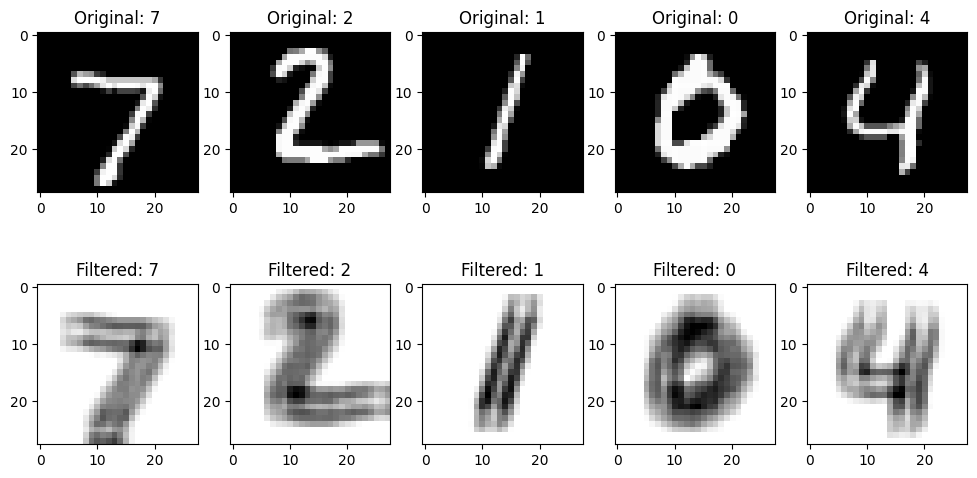

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the Canny edge detection filter
def canny_edge_filter(img):
    # Convert image to unsigned 8-bit integer type
    img = np.uint8(img * 255)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    return edges

# Apply the Canny edge detection filter to the test data
X_test_edges = np.zeros((X_test.shape[0], 28, 28))
for i in range(len(X_test)):
    edges = canny_edge_filter(X_test[i])
    X_test_edges[i] = edges

# Reshape the test data for use with the model
X_test_edges = np.expand_dims(X_test_edges, axis=3)

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_edges)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2627 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1123 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0777 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0573 - accuracy: 0.9827
Epoch 5/5
1/1 [==============================] - 0s 51ms/step


<ipython-input-8-3a9ad2a424fc>:98: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


1/1 [==============================] - 0s 18ms/step
Noise Type: salt_and_pepper
Average PSNR: 8.88
Average NMSE: 1.18

Noise Type: gaussian
Average PSNR: 8.83
Average NMSE: 1.18

Noise Type: poisson
Average PSNR: 8.56
Average NMSE: 1.22

Noise Type: speckle
Average PSNR: 8.53
Average NMSE: 1.23

1/1 [==============================] - 0s 22ms/step


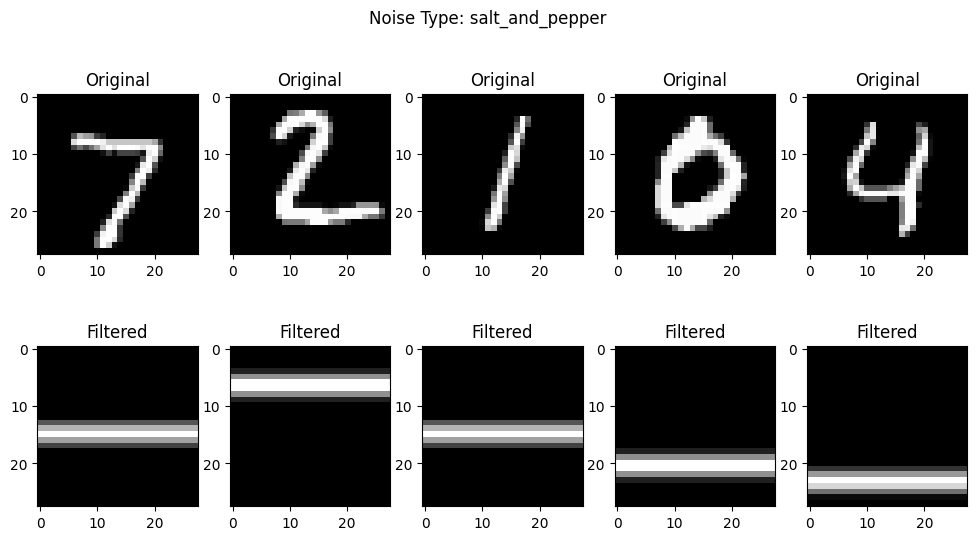

1/1 [==============================] - 0s 21ms/step


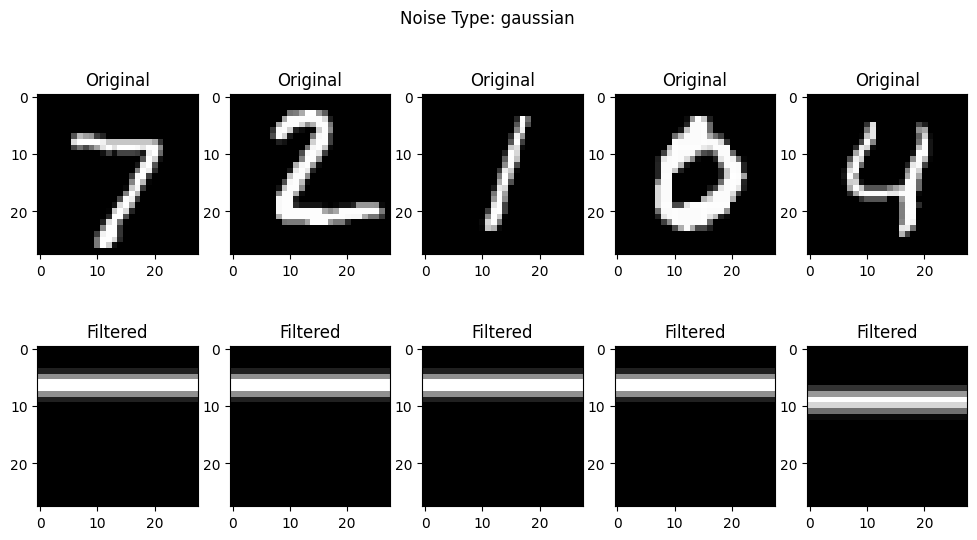

1/1 [==============================] - 0s 25ms/step


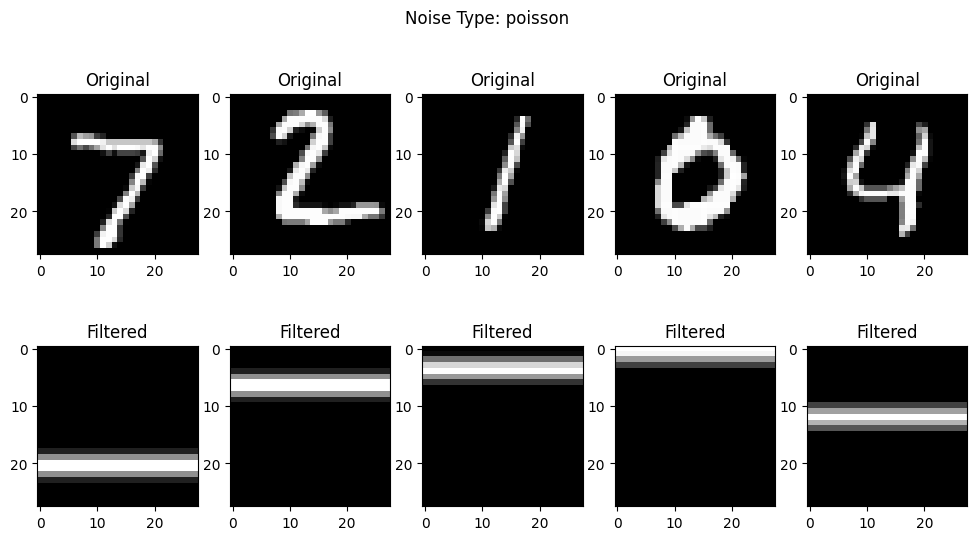

1/1 [==============================] - 0s 24ms/step


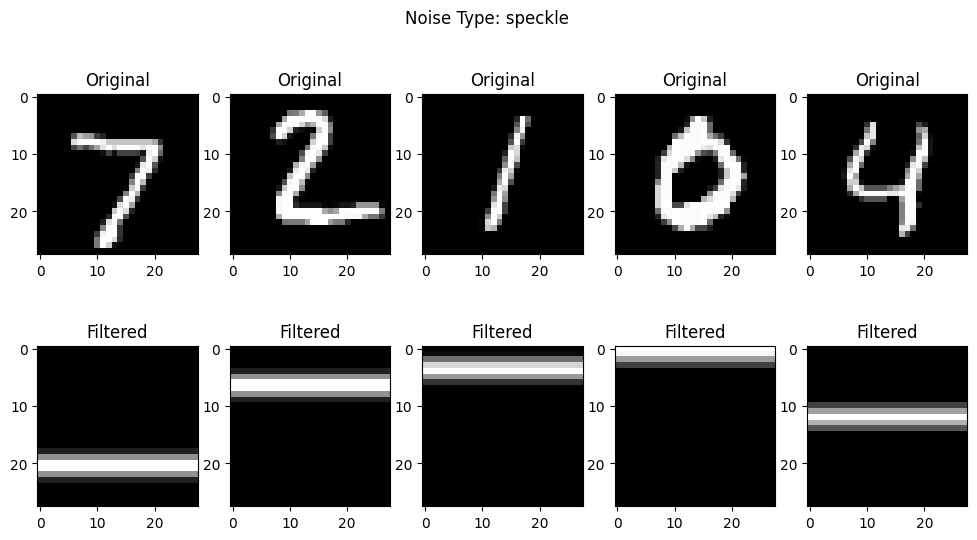

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the Canny edge detection filter
def canny_edge_filter(img):
    # Convert image to unsigned 8-bit integer type
    img = np.uint8(img * 255)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    return edges

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 1
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Ensure the noise has the same data type as the image
    noisy_image = cv2.add(image, noise)

    return noisy_image

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, noisy, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    for i in range(num_images):
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to (28, 28) to match the input size
        noisy_edges = cv2.resize(noisy_edges, (28, 28))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (28, 28))

        psnr, nmse = evaluate_noise_filter_performance(original_image, noisy_image, denoised_edges)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

    return np.mean(psnr_list), np.mean(nmse_list)


results = {}

def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    for i in range(num_images):
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to (28, 28) to match the input size
        noisy_edges = cv2.resize(noisy_edges, (28, 28))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (28, 28))

        psnr, nmse = evaluate_noise_filter_performance(original_image, noisy_image, denoised_edges)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

    return np.mean(psnr_list), np.mean(nmse_list)

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse = future.result()
            results[noise_type] = (psnr, nmse)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0)  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse = results.get(noise_type, (0, 0))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images before and after filtering for each noise type
for noise_type in noise_types:
    fig, axs = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(5):
        original_image = X_test[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to (28, 28) to match the input size
        noisy_edges = cv2.resize(noisy_edges, (28, 28))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (28, 28))

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")
        axs[1, i].imshow(denoised_edges, cmap='gray')
        axs[1, i].set_title("Filtered")

    plt.suptitle(f"Noise Type: {noise_type}")
    plt.show()


1/1 [==============================] - 0s 20ms/step


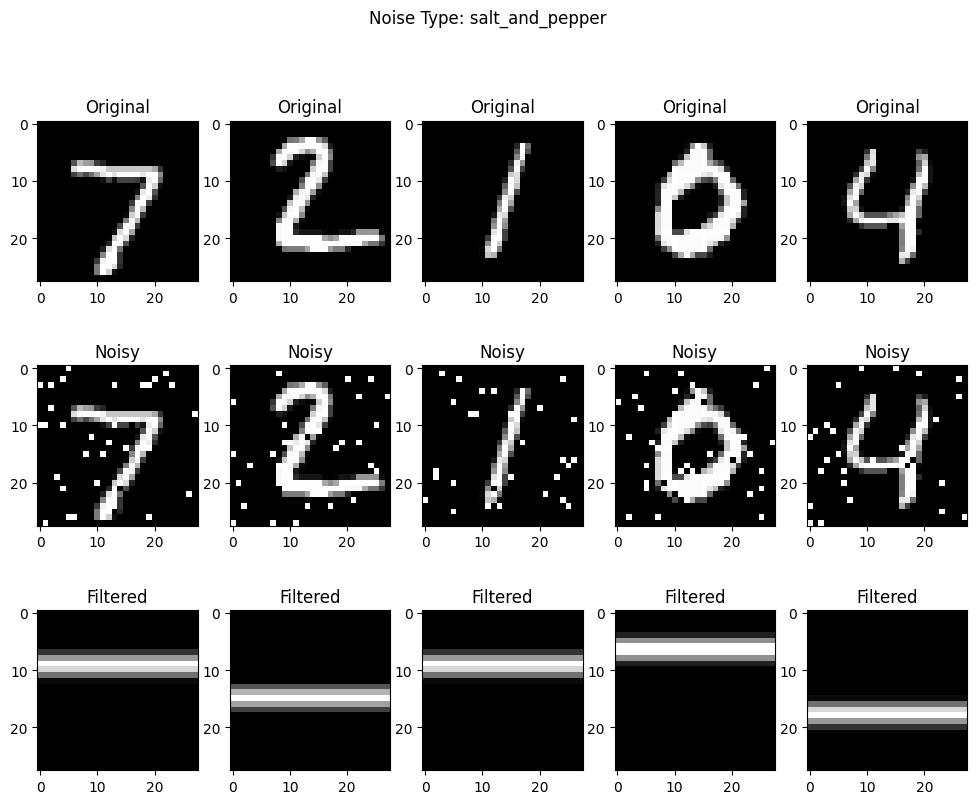

1/1 [==============================] - 0s 21ms/step


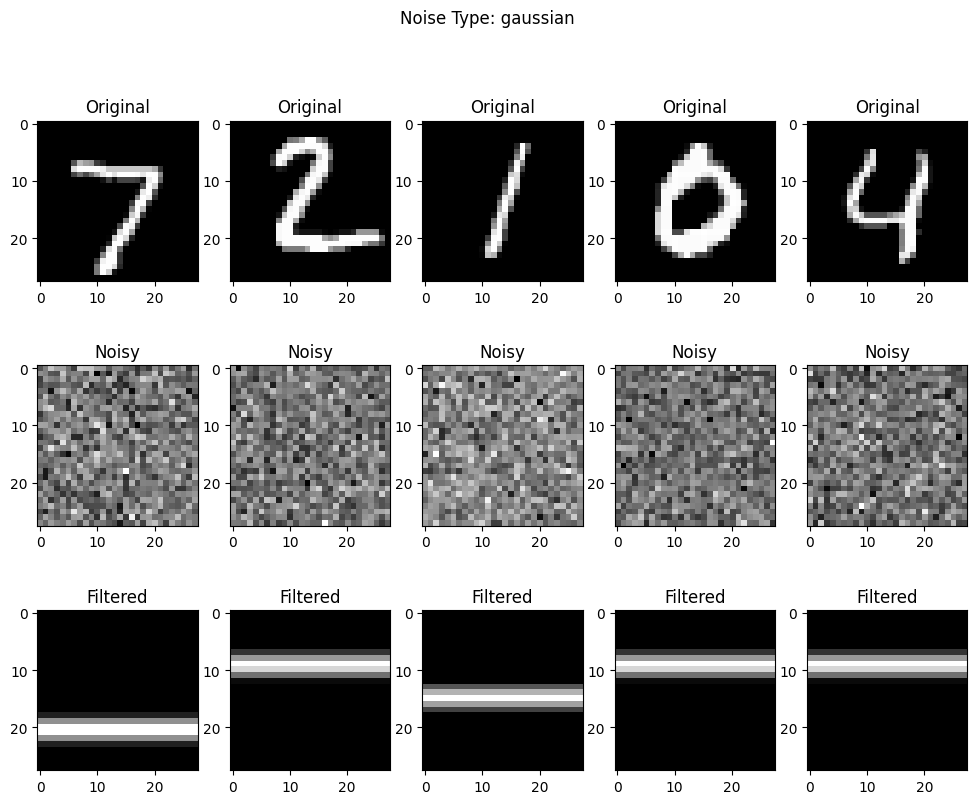

1/1 [==============================] - 0s 20ms/step


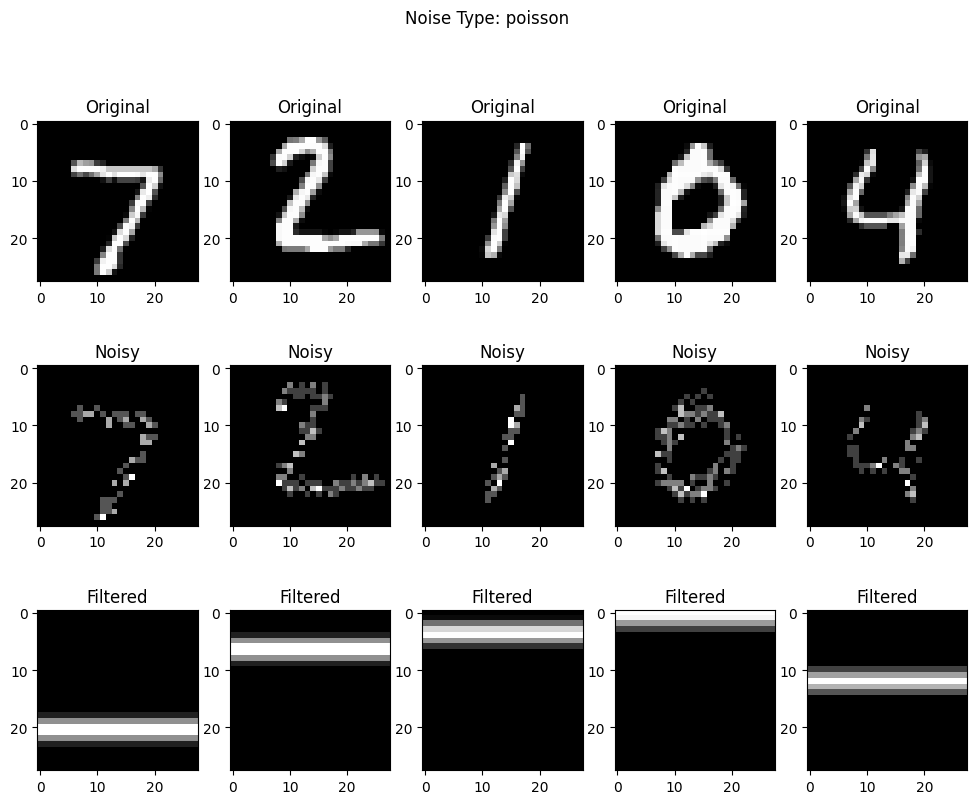

1/1 [==============================] - 0s 19ms/step


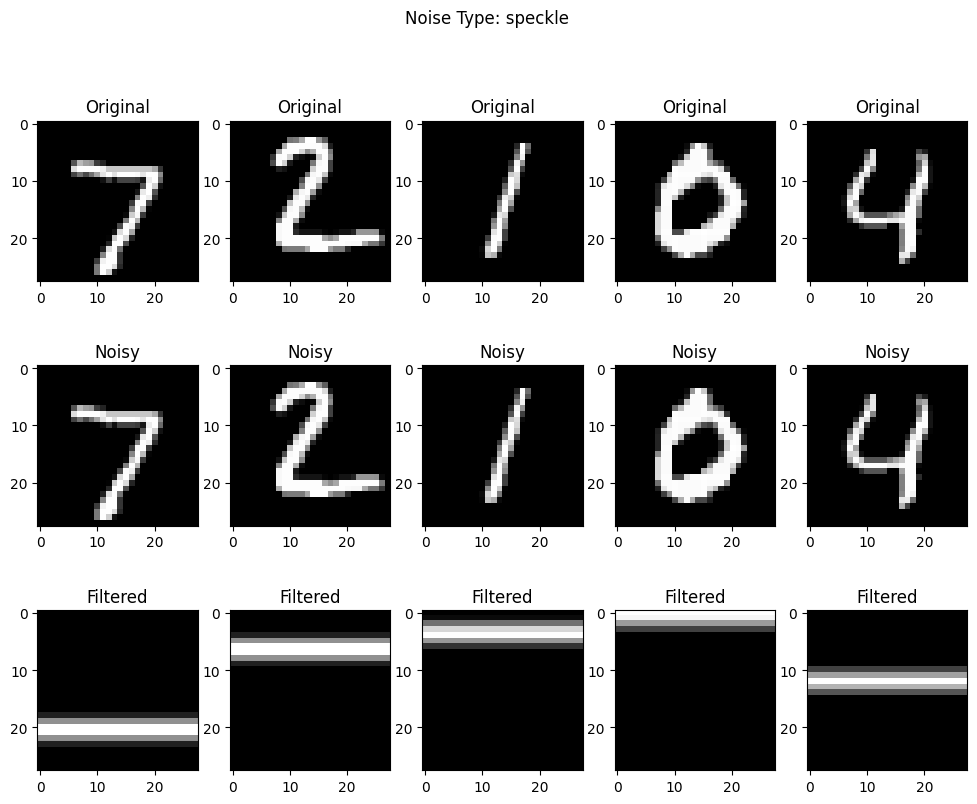

In [ ]:
# Visualize images before and after filtering for each noise type
for noise_type in noise_types:
    fig, axs = plt.subplots(3, 5, figsize=(12, 9))  # Increased the number of rows to accommodate noisy images
    for i in range(5):
        original_image = X_test[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to (28, 28) to match the input size
        noisy_edges = cv2.resize(noisy_edges, (28, 28))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (28, 28))

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")
        axs[1, i].imshow(noisy_image, cmap='gray')  # Show the noisy image
        axs[1, i].set_title("Noisy")
        axs[2, i].imshow(denoised_edges, cmap='gray')
        axs[2, i].set_title("Filtered")

    plt.suptitle(f"Noise Type: {noise_type}")
    plt.show()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2566 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1115 - accuracy: 0.9672
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0761 - accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0555 - accuracy: 0.9831
Epoch 5/5
1/1 [==============================] - 0s 70ms/step


<ipython-input-10-740785049668>:96: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


1/1 [==============================] - 0s 32ms/step
Noise Type: salt_and_pepper
Average PSNR: 8.68
Average NMSE: 1.20

Noise Type: gaussian
Average PSNR: 8.83
Average NMSE: 1.18

Noise Type: poisson
Average PSNR: 8.52
Average NMSE: 1.23

Noise Type: speckle
Average PSNR: 8.54
Average NMSE: 1.22

1/1 [==============================] - 0s 24ms/step


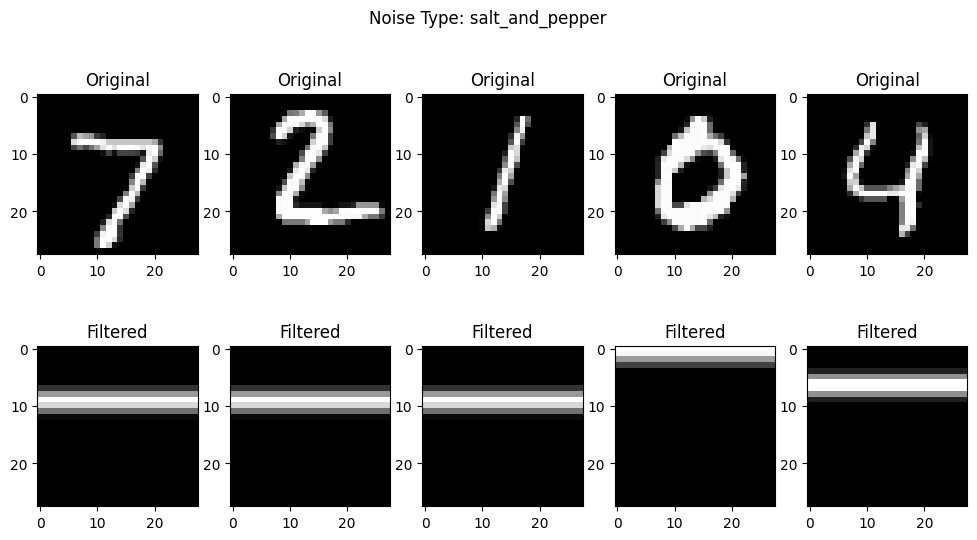

1/1 [==============================] - 0s 37ms/step


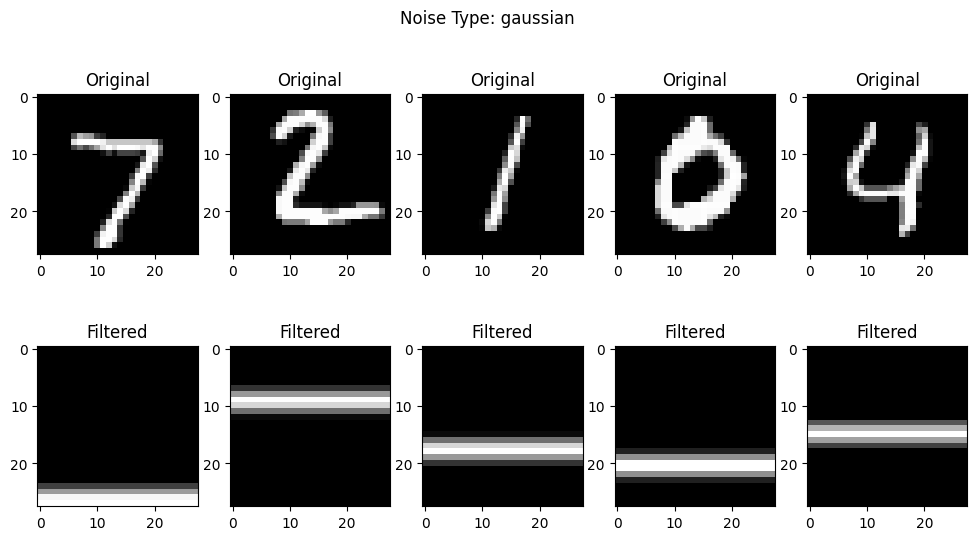

1/1 [==============================] - 0s 20ms/step


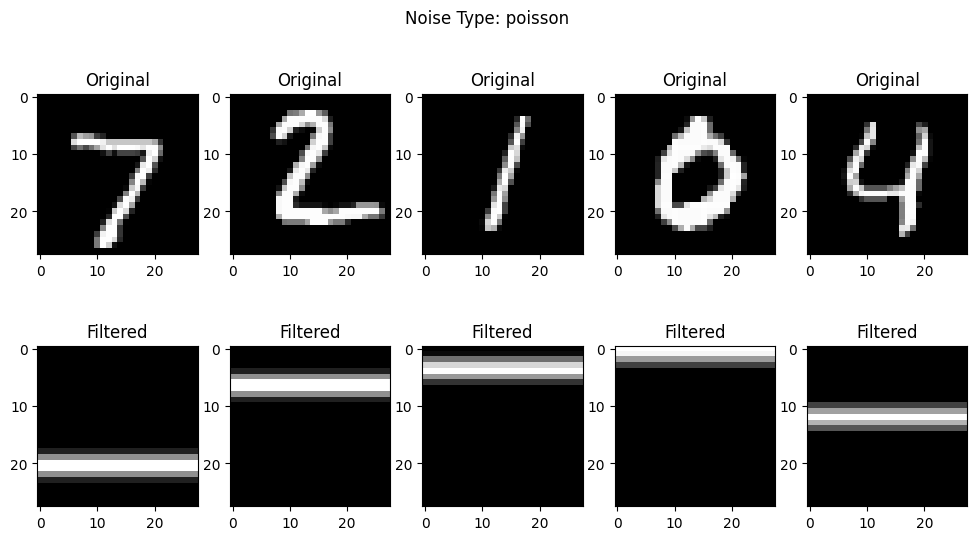

1/1 [==============================] - 0s 23ms/step


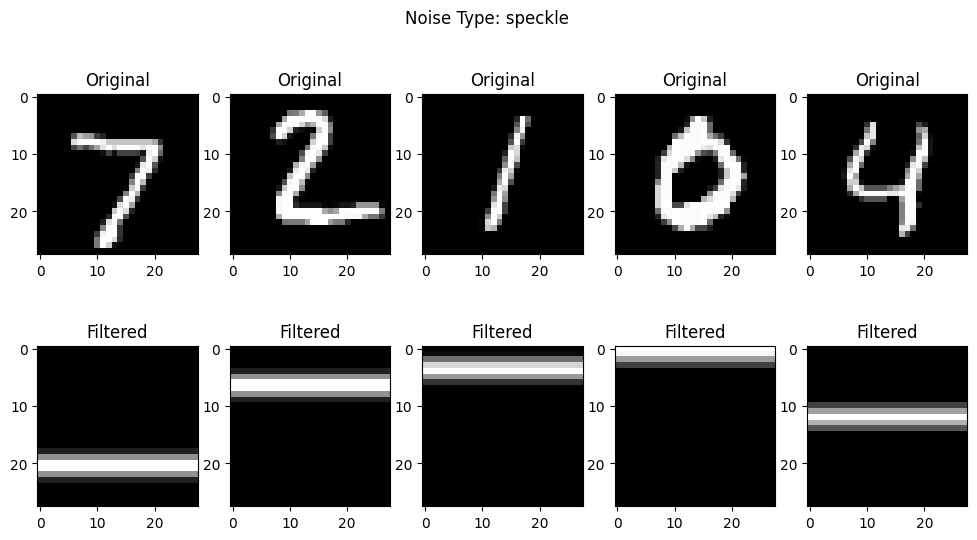

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the Canny edge detection filter
def canny_edge_filter(img):
    # Convert image to unsigned 8-bit integer type
    img = np.uint8(img * 255)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    return edges

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 1
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Ensure the noise has the same data type as the image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, noisy, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    for i in range(num_images):
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to match the input size (28, 28)
        noisy_edges = cv2.resize(noisy_edges, (original_image.shape[1], original_image.shape[0]))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to match the input size (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (original_image.shape[1], original_image.shape[0]))

        psnr, nmse = evaluate_noise_filter_performance(original_image, noisy_image, denoised_edges)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

    return np.mean(psnr_list), np.mean(nmse_list)

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse = future.result()
            results[noise_type] = (psnr, nmse)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0)  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse = results.get(noise_type, (0, 0))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images before and after filtering for each noise type
for noise_type in noise_types:
    fig, axs = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(5):
        original_image = X_test[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to match the input size (28, 28)
        noisy_edges = cv2.resize(noisy_edges, (original_image.shape[1], original_image.shape[0]))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to match the input size (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (original_image.shape[1], original_image.shape[0]))

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")
        axs[1, i].imshow(denoised_edges, cmap='gray')
        axs[1, i].set_title("Filtered")

    plt.suptitle(f"Noise Type: {noise_type}")
    plt.show()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2565 - accuracy: 0.9286
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1123 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0772 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0560 - accuracy: 0.9829
Epoch 5/5
1/1 [==============================] - 0s 172ms/step


<ipython-input-11-fdf8e866da8b>:96: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


1/1 [==============================] - 0s 24ms/step
Noise Type: salt_and_pepper
Average PSNR: 8.79
Average NMSE: 1.19

Noise Type: gaussian
Average PSNR: 8.97
Average NMSE: 1.16

Noise Type: poisson
Average PSNR: 8.52
Average NMSE: 1.23

Noise Type: speckle
Average PSNR: 8.51
Average NMSE: 1.23



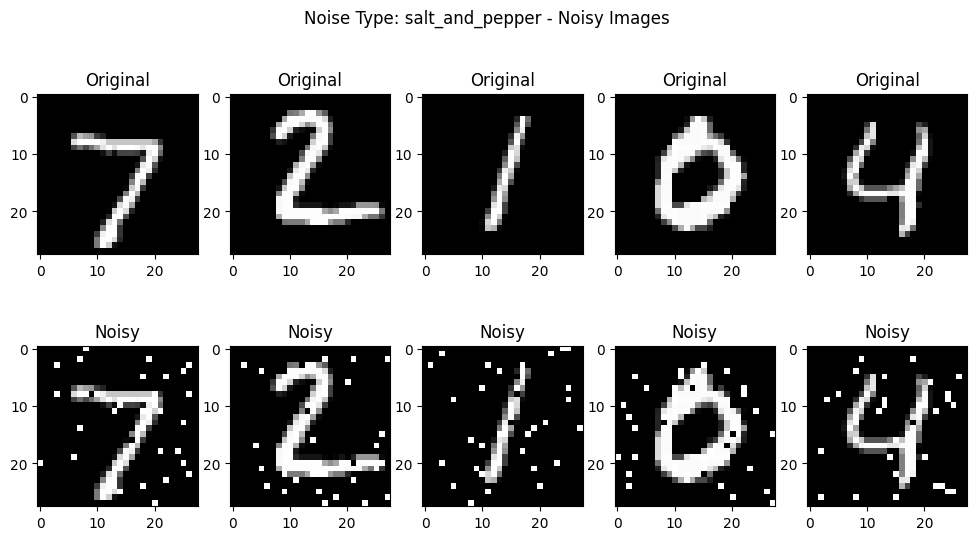

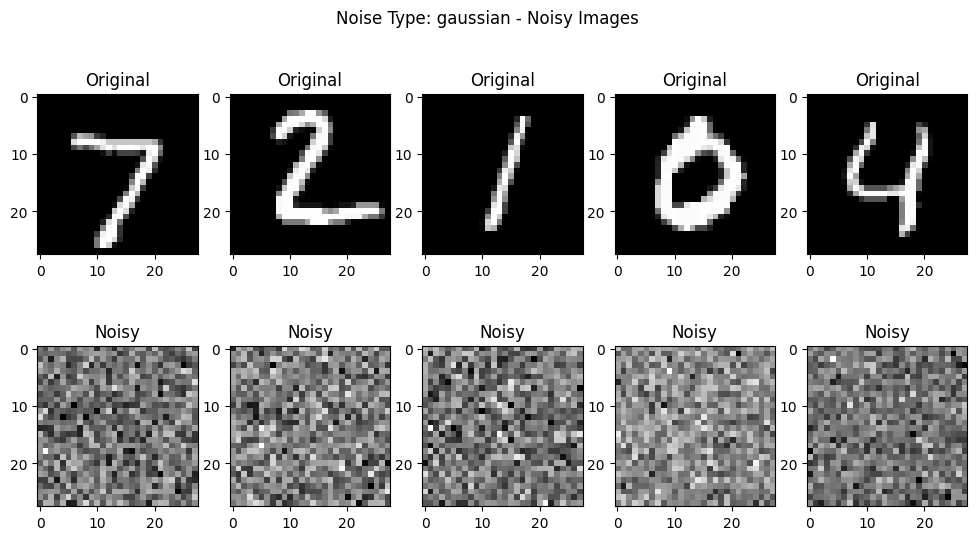

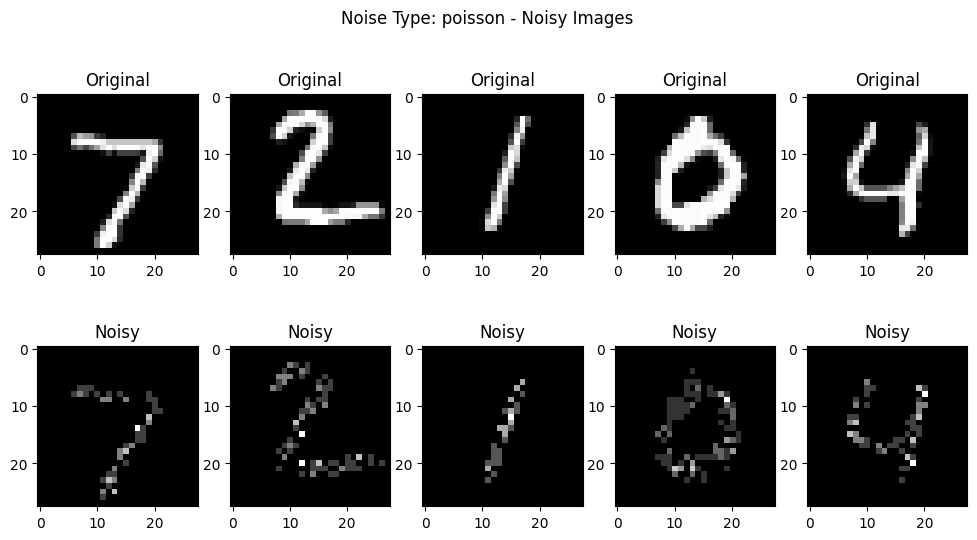

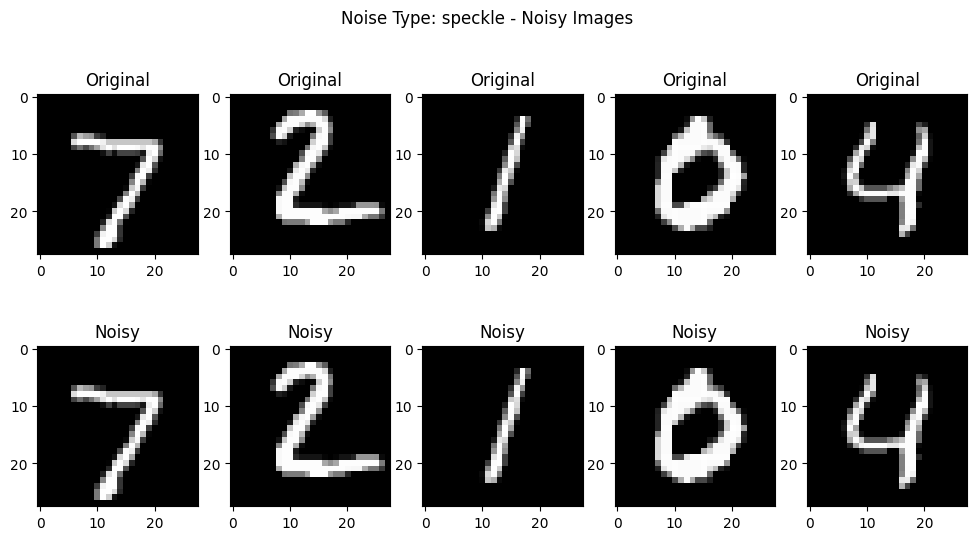

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the Canny edge detection filter
def canny_edge_filter(img):
    # Convert image to unsigned 8-bit integer type
    img = np.uint8(img * 255)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    return edges

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 1
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Ensure the noise has the same data type as the image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization

    for i in range(num_images):
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to match the input size (28, 28)
        noisy_edges = cv2.resize(noisy_edges, (original_image.shape[1], original_image.shape[0]))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to match the input size (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (original_image.shape[1], original_image.shape[0]))

        psnr, nmse = evaluate_noise_filter_performance(original_image, denoised_edges)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images for visualization

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images


results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _ = results.get(noise_type, (0, 0, []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images before and after filtering for each noise type
for noise_type in noise_types:
    fig, axs = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(5):
        original_image = X_test[i]
        _, _, noisy_images = results[noise_type]

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")
        axs[1, i].imshow(noisy_images[i], cmap='gray')
        axs[1, i].set_title("Noisy")

    plt.suptitle(f"Noise Type: {noise_type} - Noisy Images")
    plt.show()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2516 - accuracy: 0.9293
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1119 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0775 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 5/5
1/1 [==============================] - 0s 141ms/step


<ipython-input-12-68a80f6b1047>:96: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


1/1 [==============================] - 0s 20ms/step
Noise Type: salt_and_pepper
Average PSNR: 8.80
Average NMSE: 1.19

Noise Type: gaussian
Average PSNR: 8.84
Average NMSE: 1.18

Noise Type: poisson
Average PSNR: 8.50
Average NMSE: 1.23

Noise Type: speckle
Average PSNR: 8.55
Average NMSE: 1.22



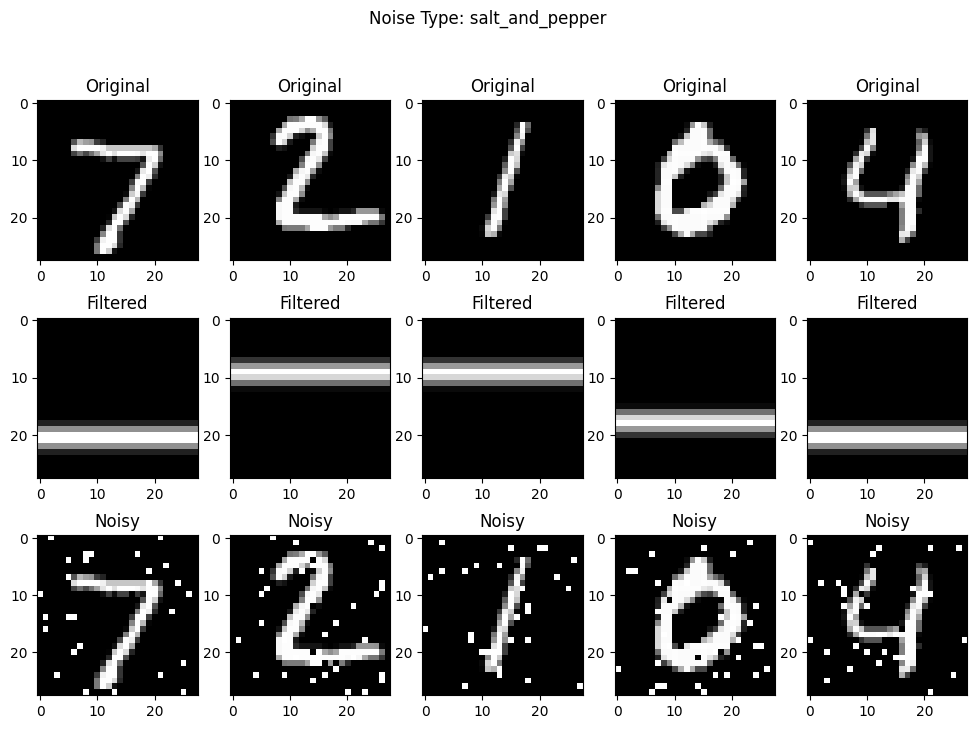

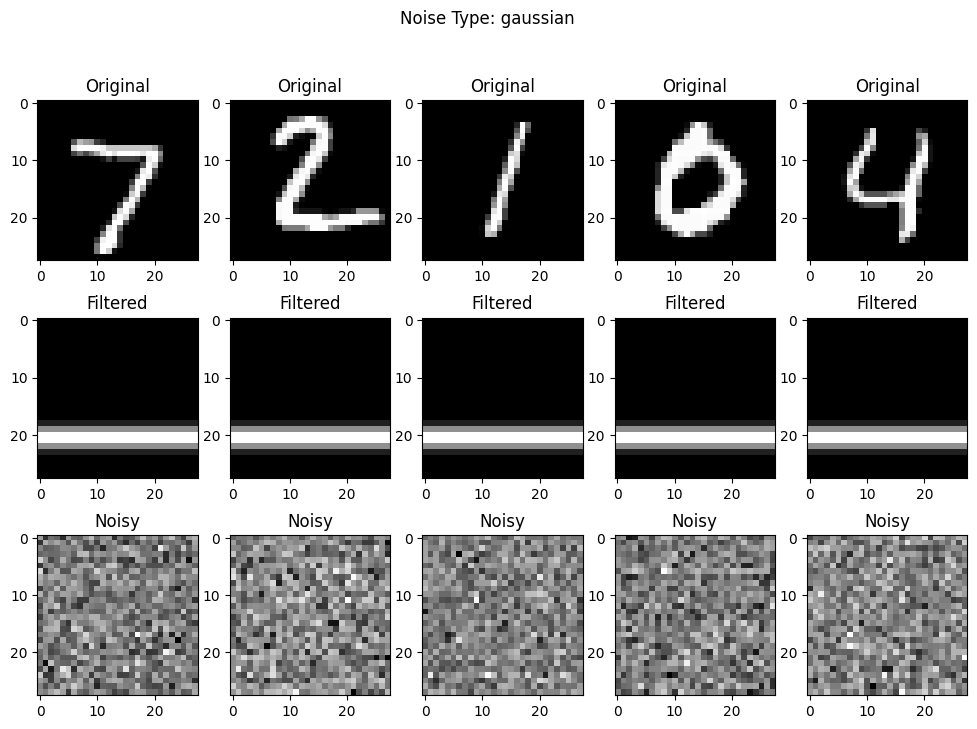

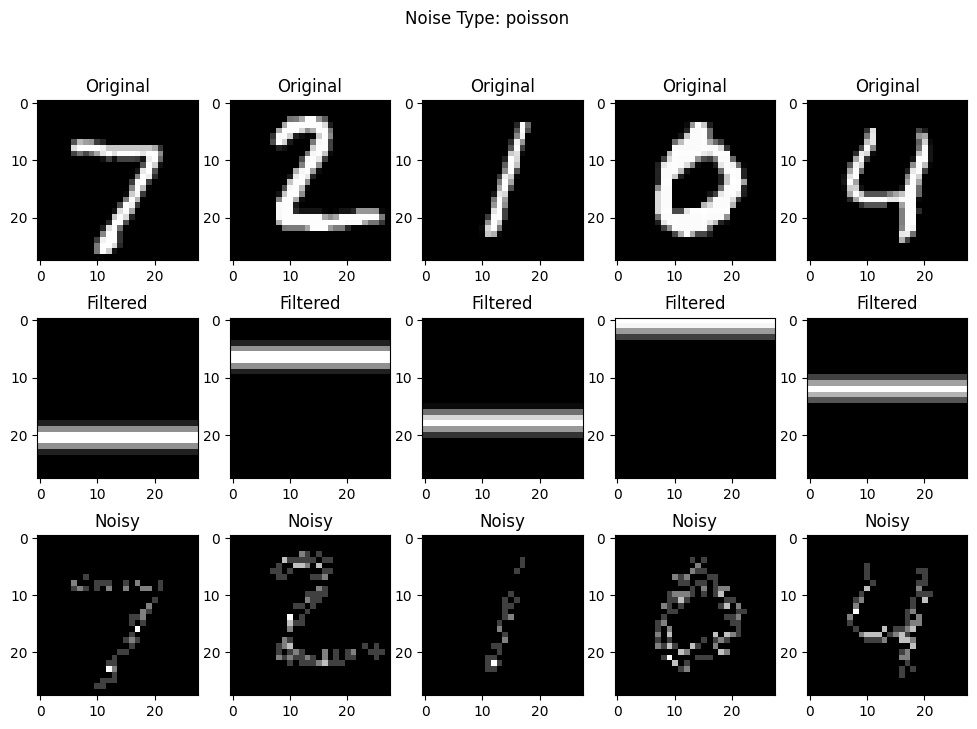

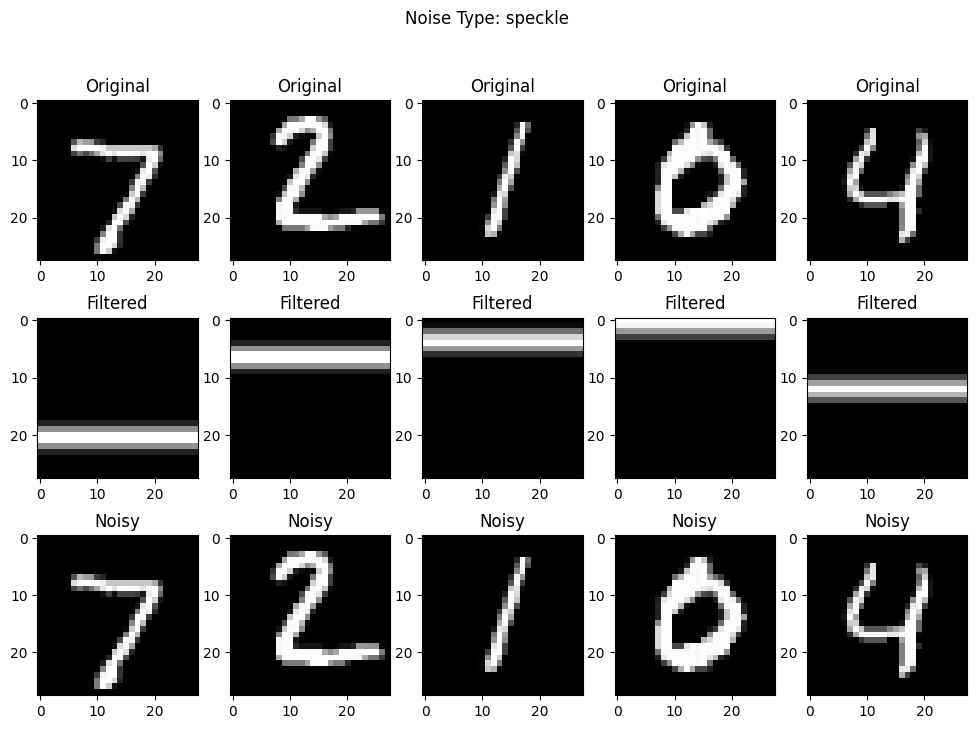

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the Canny edge detection filter
def canny_edge_filter(img):
    # Convert image to unsigned 8-bit integer type
    img = np.uint8(img * 255)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    return edges

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 1
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Ensure the noise has the same data type as the image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(num_images):
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to match the input size (28, 28)
        noisy_edges = cv2.resize(noisy_edges, (original_image.shape[1], original_image.shape[0]))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to match the input size (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (original_image.shape[1], original_image.shape[0]))

        psnr, nmse = evaluate_noise_filter_performance(original_image, denoised_edges)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(denoised_edges)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    fig, axs = plt.subplots(3, 5, figsize=(12, 8))
    for i in range(5):
        original_image = X_test[i]

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")

        axs[1, i].imshow(filtered_images[i], cmap='gray')
        axs[1, i].set_title("Filtered")

        axs[2, i].imshow(noisy_images[i], cmap='gray')
        axs[2, i].set_title("Noisy")

    plt.suptitle(f"Noise Type: {noise_type}")
    plt.show()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2662 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1163 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9825
Epoch 5/5
1/1 [==============================] - ETA: 0s

<ipython-input-13-68a80f6b1047>:96: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


1/1 [==============================] - 0s 34ms/step
Noise Type: salt_and_pepper
Average PSNR: 8.94
Average NMSE: 1.17

Noise Type: gaussian
Average PSNR: 8.89
Average NMSE: 1.17

Noise Type: poisson
Average PSNR: 8.53
Average NMSE: 1.22

Noise Type: speckle
Average PSNR: 8.57
Average NMSE: 1.22



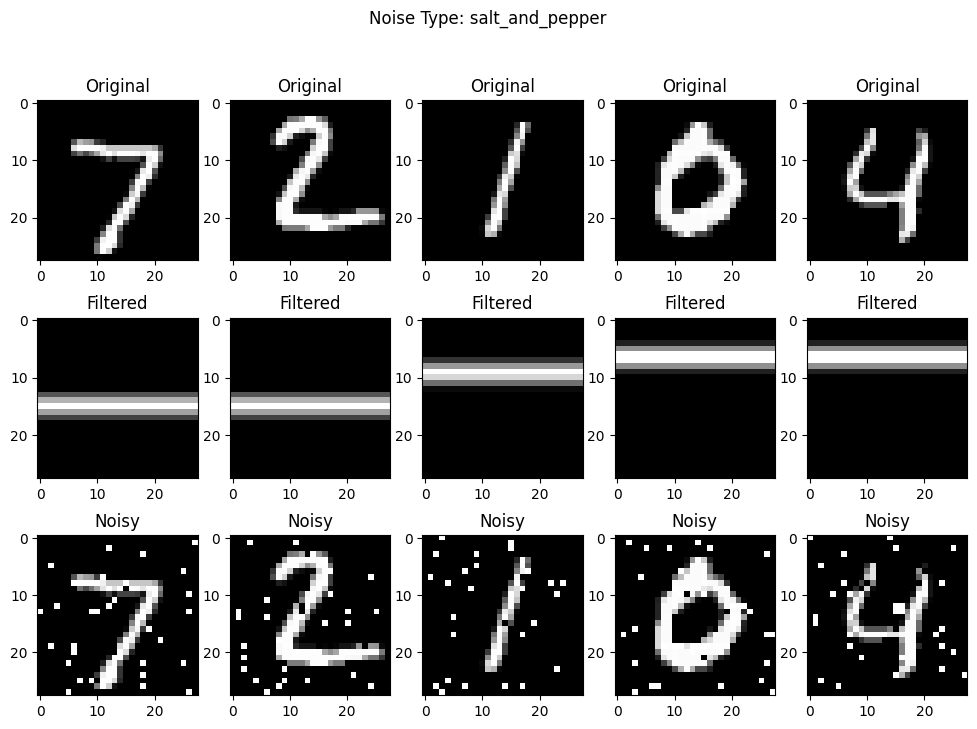

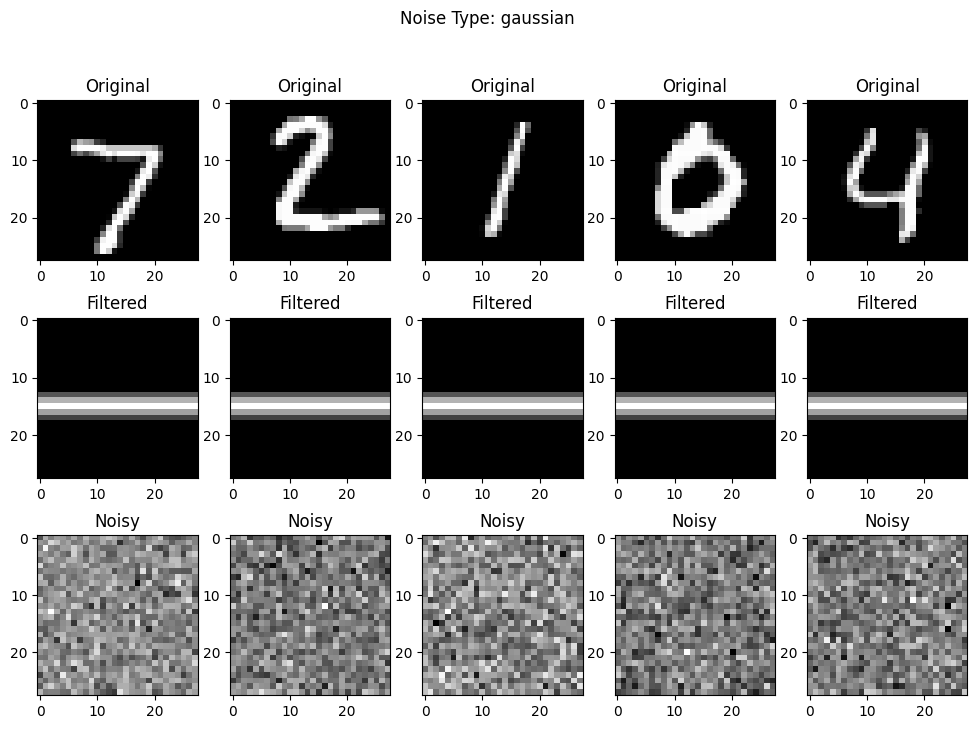

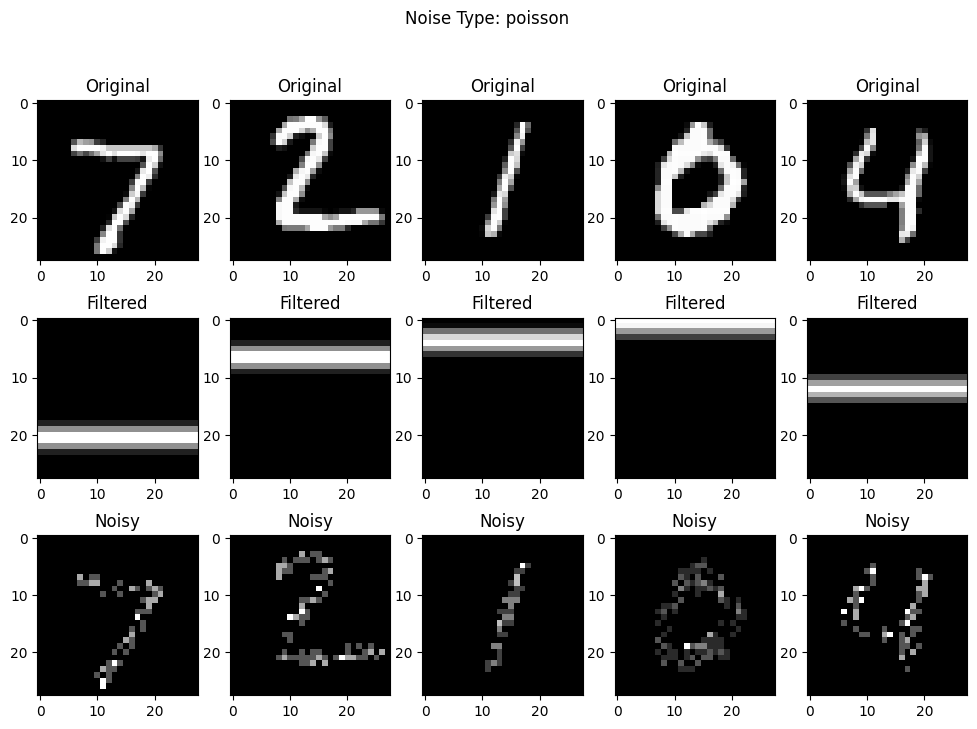

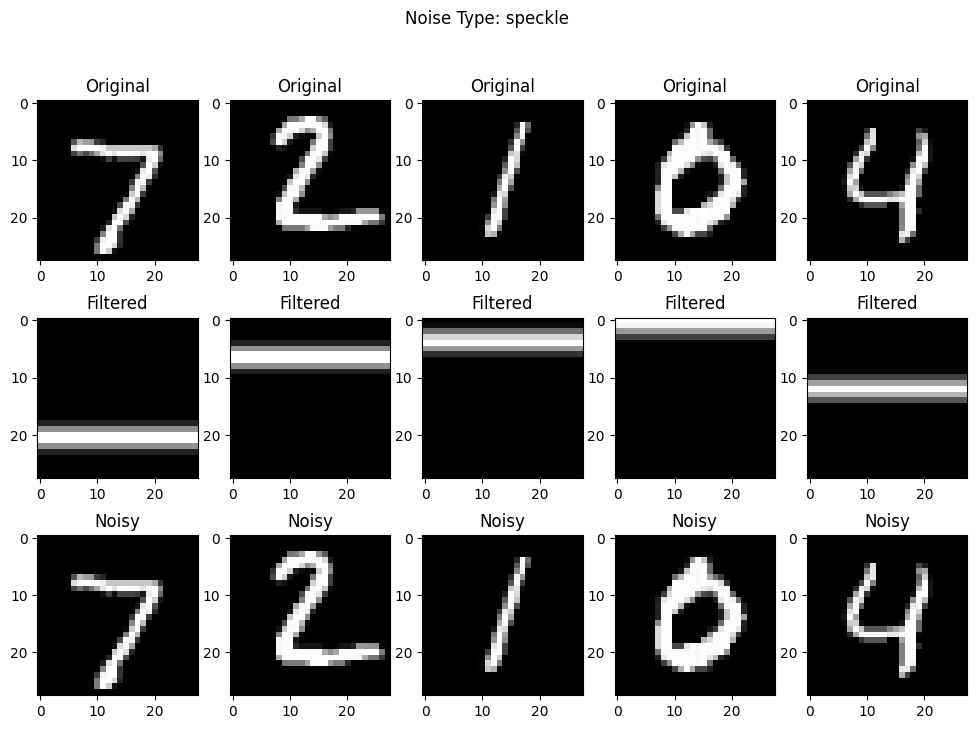

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the Canny edge detection filter
def canny_edge_filter(img):
    # Convert image to unsigned 8-bit integer type
    img = np.uint8(img * 255)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    return edges

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 1
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Ensure the noise has the same data type as the image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(num_images):
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to match the input size (28, 28)
        noisy_edges = cv2.resize(noisy_edges, (original_image.shape[1], original_image.shape[0]))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to match the input size (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (original_image.shape[1], original_image.shape[0]))

        psnr, nmse = evaluate_noise_filter_performance(original_image, denoised_edges)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(denoised_edges)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    fig, axs = plt.subplots(3, 5, figsize=(12, 8))
    for i in range(5):
        original_image = X_test[i]

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")

        axs[1, i].imshow(filtered_images[i], cmap='gray')
        axs[1, i].set_title("Filtered")

        axs[2, i].imshow(noisy_images[i], cmap='gray')
        axs[2, i].set_title("Noisy")

    plt.suptitle(f"Noise Type: {noise_type}")
    plt.show()


Median Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from scipy.ndimage import median_filter

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Apply the median filter to the test data
X_test_filtered = np.array([median_filter(X_test[i], size=3) for i in range(len(X_test))])

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2597 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1121 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0769 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0567 - accuracy: 0.9825
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Accuracy: 0.9695


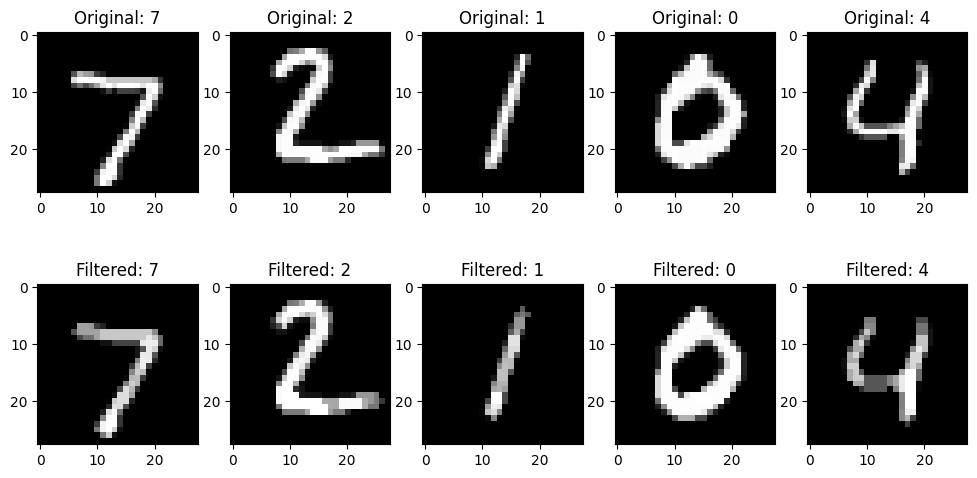

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2598 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1151 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0796 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0613 - accuracy: 0.9812
Epoch 5/5
1/1 [==============================] - 0s 139ms/step


<ipython-input-17-c03003f1a2dc>:96: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


1/1 [==============================] - 0s 40ms/step
Noise Type: salt_and_pepper
Average PSNR (Canny): 8.69
Average NMSE (Canny): 1.20
Average PSNR (Median): 21.53
Average NMSE (Median): 0.29

Noise Type: gaussian
Average PSNR (Canny): 8.85
Average NMSE (Canny): 1.18
Average PSNR (Median): -20.60
Average NMSE (Median): 35.58

Noise Type: poisson
Average PSNR (Canny): 8.47
Average NMSE (Canny): 1.23
Average PSNR (Median): 12.42
Average NMSE (Median): 0.78

Noise Type: speckle
Average PSNR (Canny): 8.48
Average NMSE (Canny): 1.23
Average PSNR (Median): 23.48
Average NMSE (Median): 0.24



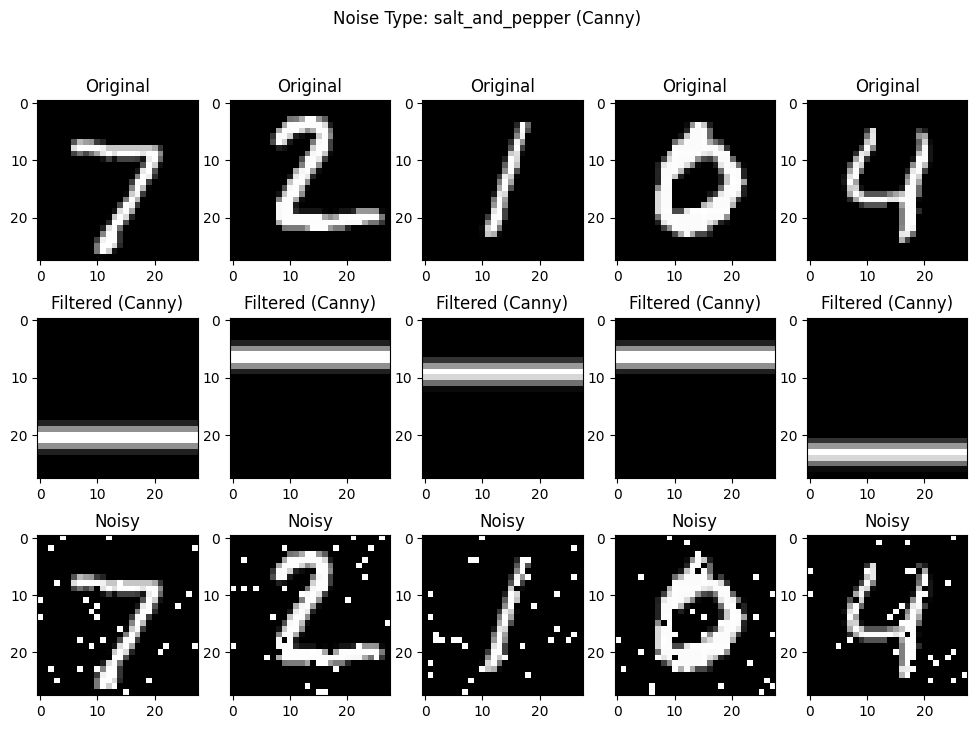

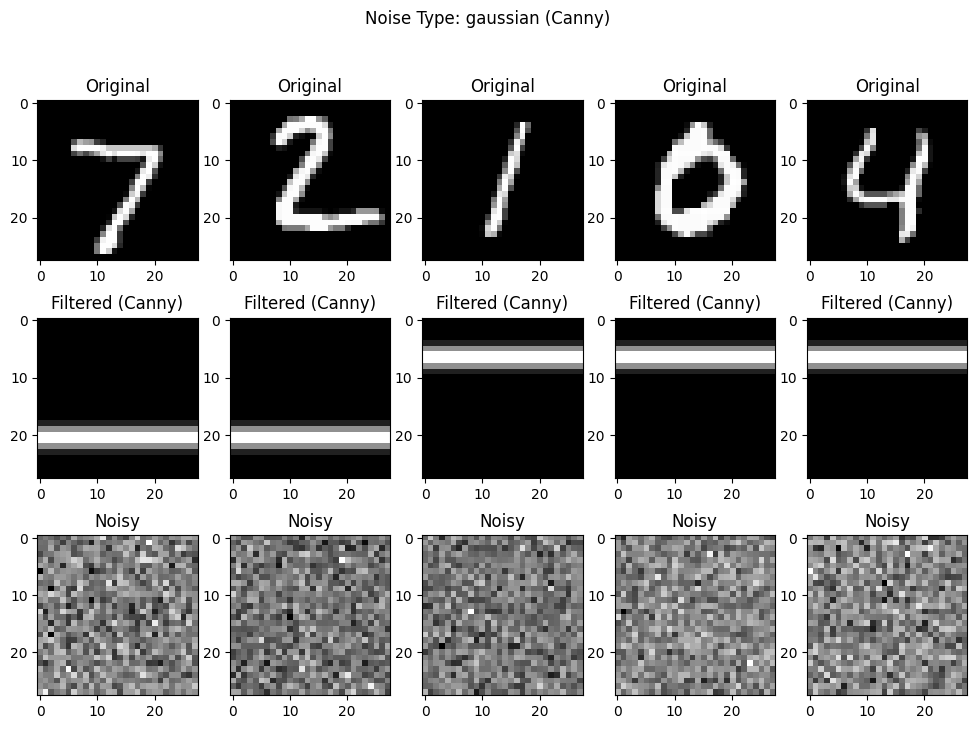

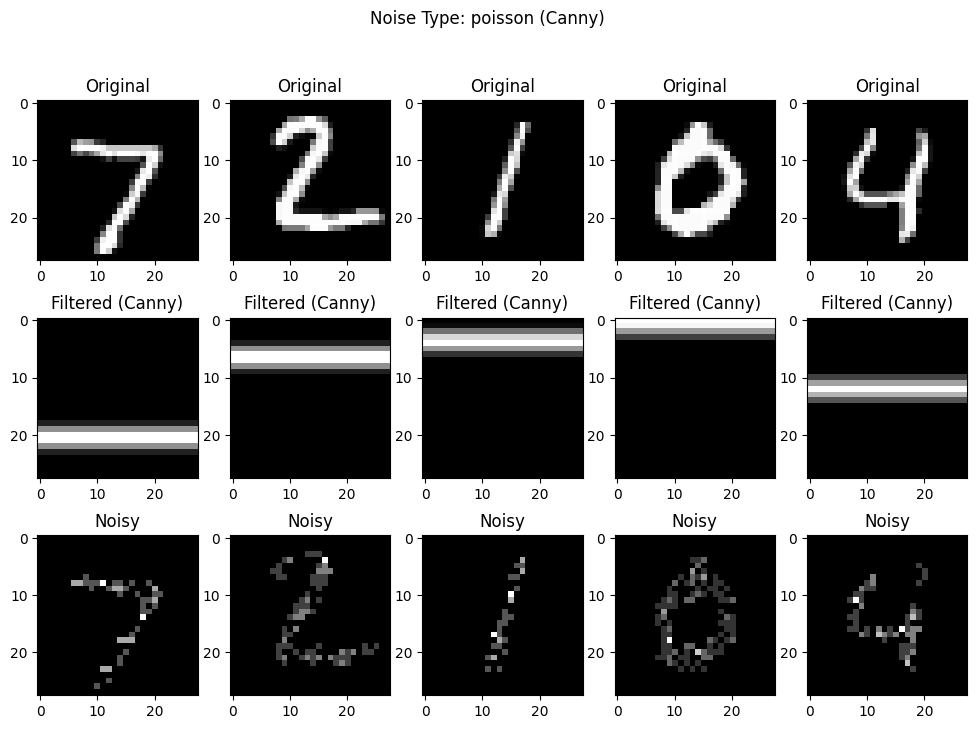

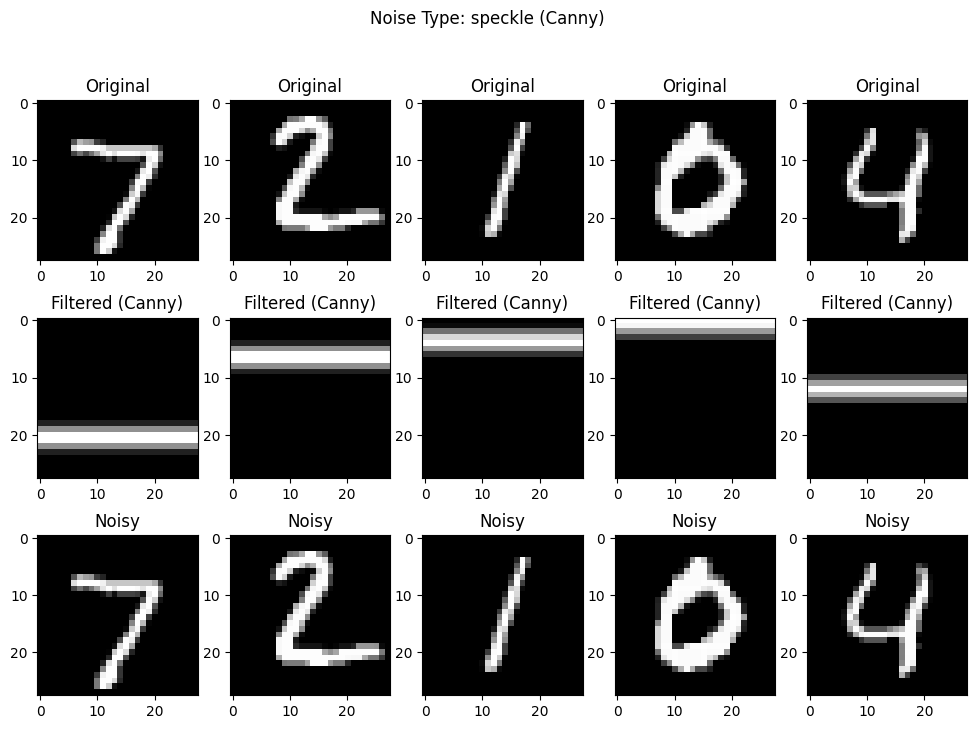

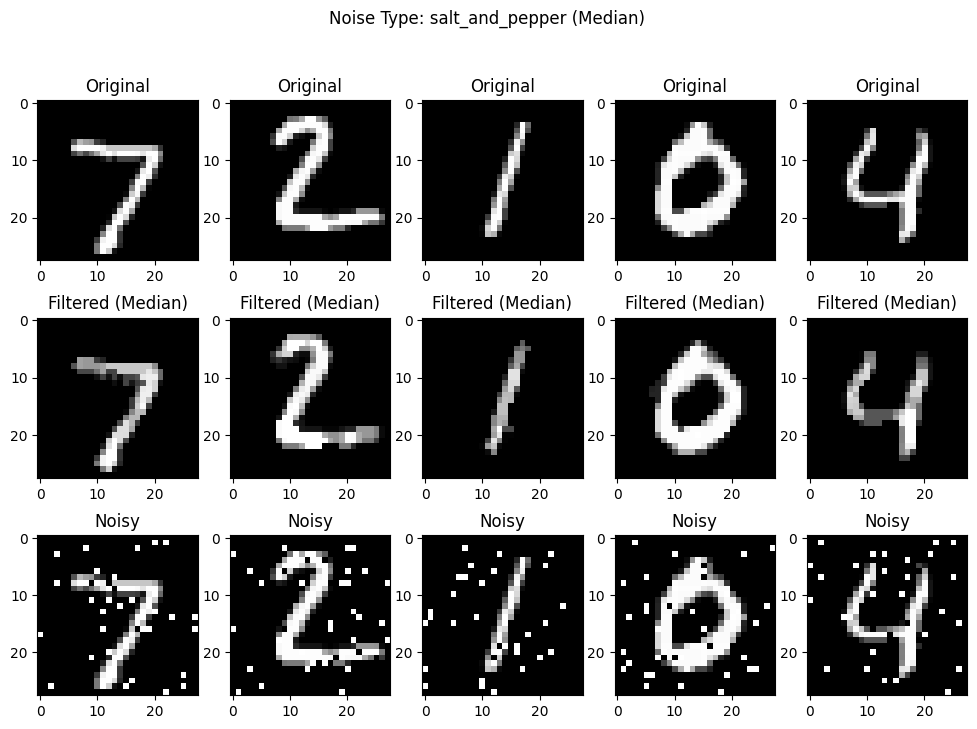

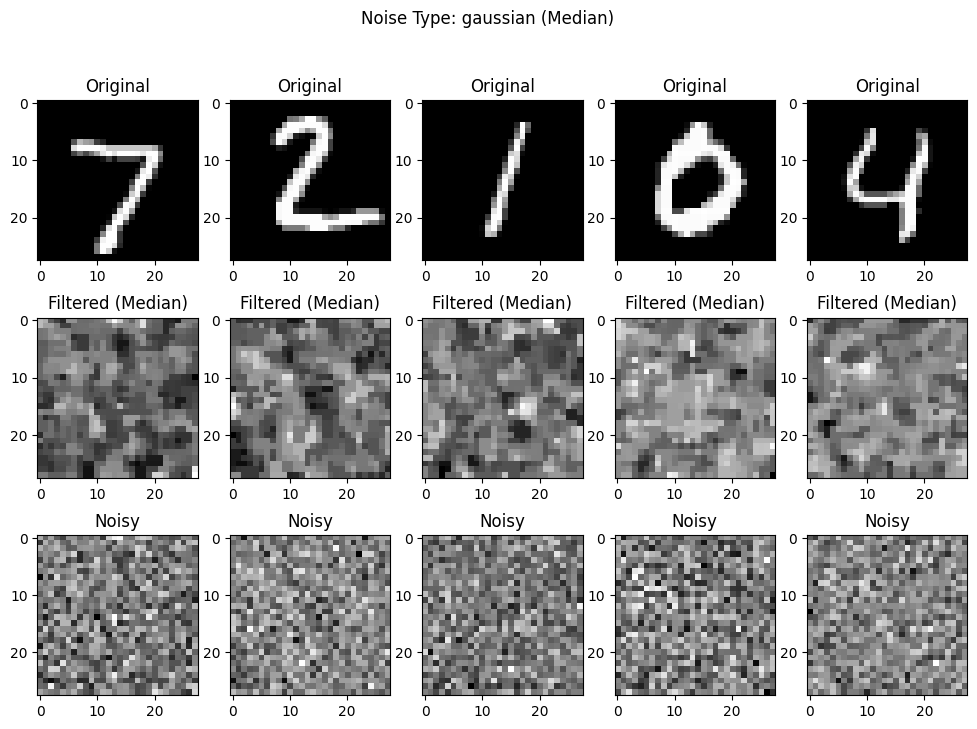

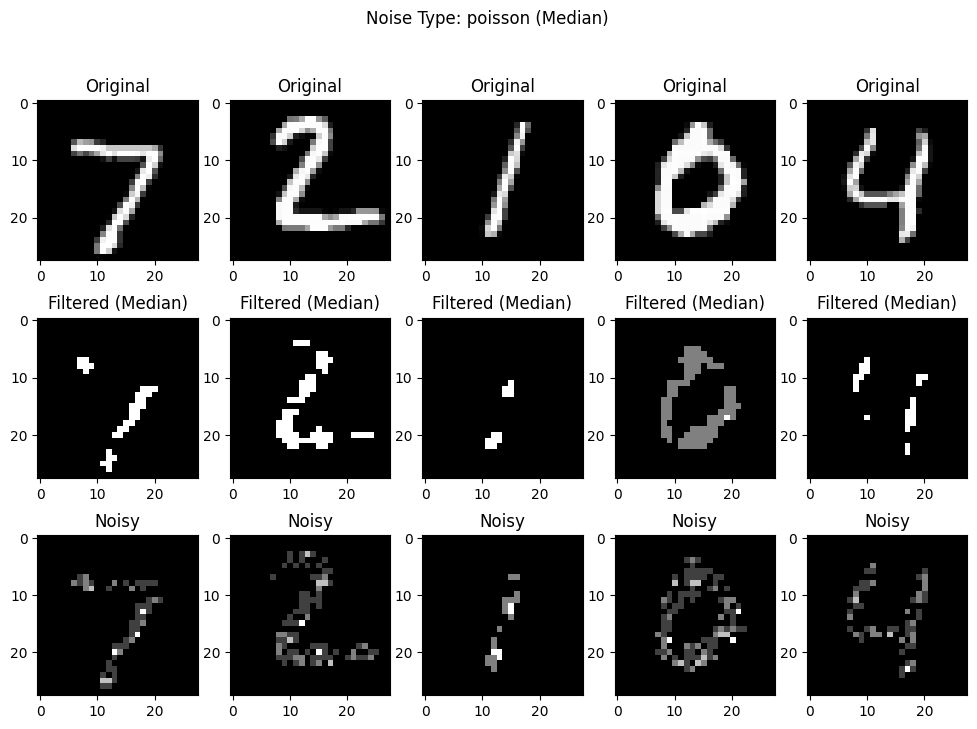

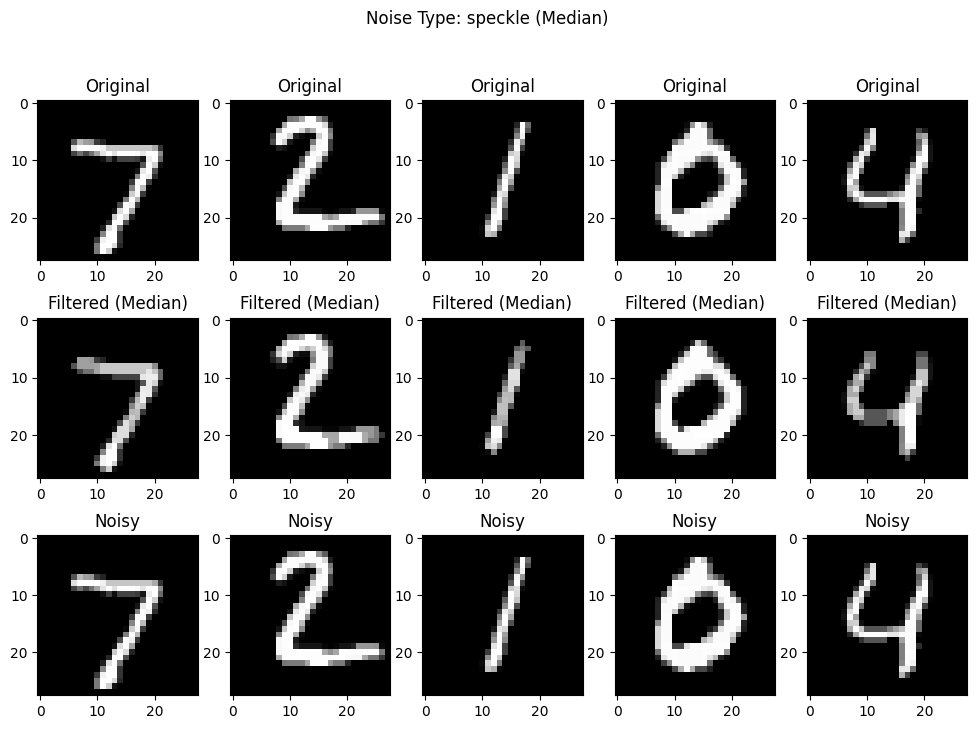

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the Canny edge detection filter
def canny_edge_filter(img):
    # Convert image to unsigned 8-bit integer type
    img = np.uint8(img * 255)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    return edges

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 1
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Ensure the noise has the same data type as the image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results_canny = {}
nmse_results_canny = {}
psnr_results_median = {}
nmse_results_median = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list_canny = []
    nmse_list_canny = []
    psnr_list_median = []
    nmse_list_median = []

    noisy_images_canny = []  # Store noisy images for Canny edge filter
    filtered_images_canny = []  # Store filtered images for Canny edge filter
    noisy_images_median = []  # Store noisy images for Median filter
    filtered_images_median = []  # Store filtered images for Median filter

    for i in range(num_images):
        original_image = images[i]

        # Apply noise and Canny edge filter
        noisy_image = add_noise(original_image, noise_type)
        noisy_edges = canny_edge_filter(noisy_image)

        # Resize the noisy_edges to match the input size (28, 28)
        noisy_edges = cv2.resize(noisy_edges, (original_image.shape[1], original_image.shape[0]))

        noisy_edges = np.expand_dims(noisy_edges, axis=-1)  # Add channel dimension
        denoised_edges = model.predict(np.expand_dims(noisy_edges, axis=0))[0]

        # Resize the denoised_edges to match the input size (28, 28)
        denoised_edges = cv2.resize(denoised_edges, (original_image.shape[1], original_image.shape[0]))

        psnr_canny, nmse_canny = evaluate_noise_filter_performance(original_image, denoised_edges)
        psnr_list_canny.append(psnr_canny)
        nmse_list_canny.append(nmse_canny)

        noisy_images_canny.append(noisy_image)  # Store noisy images for Canny edge filter
        filtered_images_canny.append(denoised_edges)  # Store filtered images for Canny edge filter

        # Apply noise and Median filter
        noisy_image_median = add_noise(original_image, noise_type)
        filtered_image_median = median_filter(noisy_image_median, size=3)

        psnr_median, nmse_median = evaluate_noise_filter_performance(original_image, filtered_image_median)
        psnr_list_median.append(psnr_median)
        nmse_list_median.append(nmse_median)

        noisy_images_median.append(noisy_image_median)  # Store noisy images for Median filter
        filtered_images_median.append(filtered_image_median)  # Store filtered images for Median filter

    return (
        np.mean(psnr_list_canny), np.mean(nmse_list_canny),
        noisy_images_canny, filtered_images_canny,
        np.mean(psnr_list_median), np.mean(nmse_list_median),
        noisy_images_median, filtered_images_median
    )

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            (
                psnr_canny, nmse_canny, noisy_images_canny, filtered_images_canny,
                psnr_median, nmse_median, noisy_images_median, filtered_images_median
            ) = future.result()
            results[noise_type] = (
                (psnr_canny, nmse_canny, noisy_images_canny, filtered_images_canny),
                (psnr_median, nmse_median, noisy_images_median, filtered_images_median)
            )
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = ((0, 0, [], []), (0, 0, [], []))  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    (
        (psnr_canny, nmse_canny, _, _),
        (psnr_median, nmse_median, _, _)
    ) = results.get(noise_type, ((0, 0, [], []), (0, 0, [], [])))  # Use get() with default values
    psnr_results_canny[noise_type] = psnr_canny
    nmse_results_canny[noise_type] = nmse_canny
    psnr_results_median[noise_type] = psnr_median
    nmse_results_median[noise_type] = nmse_median

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR (Canny): {psnr_results_canny[noise_type]:.2f}")
    print(f"Average NMSE (Canny): {nmse_results_canny[noise_type]:.2f}")
    print(f"Average PSNR (Median): {psnr_results_median[noise_type]:.2f}")
    print(f"Average NMSE (Median): {nmse_results_median[noise_type]:.2f}")
    print()

# Visualize images for each noise type (Canny edge filter)
for noise_type in noise_types:
    _, _, noisy_images_canny, filtered_images_canny = results[noise_type][0]
    fig, axs = plt.subplots(3, 5, figsize=(12, 8))
    for i in range(5):
        original_image = X_test[i]

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")

        axs[1, i].imshow(filtered_images_canny[i], cmap='gray')
        axs[1, i].set_title("Filtered (Canny)")

        axs[2, i].imshow(noisy_images_canny[i], cmap='gray')
        axs[2, i].set_title("Noisy")

    plt.suptitle(f"Noise Type: {noise_type} (Canny)")
    plt.show()

# Visualize images for each noise type (Median filter)
for noise_type in noise_types:
    _, _, noisy_images_median, filtered_images_median = results[noise_type][1]
    fig, axs = plt.subplots(3, 5, figsize=(12, 8))
    for i in range(5):
        original_image = X_test[i]

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")

        axs[1, i].imshow(filtered_images_median[i], cmap='gray')
        axs[1, i].set_title("Filtered (Median)")

        axs[2, i].imshow(noisy_images_median[i], cmap='gray')
        axs[2, i].set_title("Noisy")

    plt.suptitle(f"Noise Type: {noise_type} (Median)")
    plt.show()


Bilateral Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Apply the bilateral filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    img_8u = (X_test[i] * 255).astype(np.uint8)
    filtered_img_8u = cv2.bilateralFilter(img_8u, d=15, sigmaColor=0.05, sigmaSpace=15)
    filtered_img = filtered_img_8u.astype(np.float32) / 255
    X_test_filtered[i] = filtered_img
# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2567 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1152 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0785 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0584 - accuracy: 0.9822
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Accuracy: 0.9762


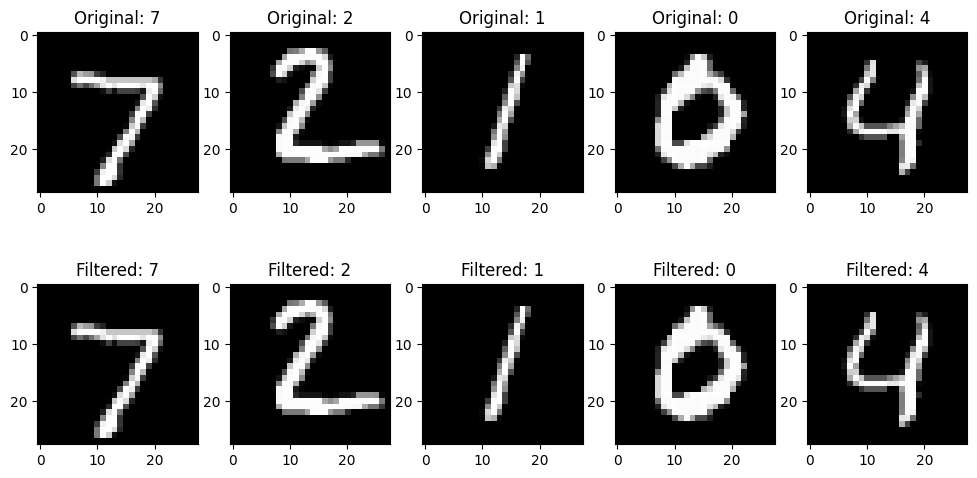

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2560 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1132 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0766 - accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0578 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9860


<ipython-input-21-da21f5f21beb>:86: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


Noise Type: salt_and_pepper
Average PSNR: -38.58
Average NMSE: 276.30

Noise Type: gaussian
Average PSNR: -42.58
Average NMSE: 445.57

Noise Type: poisson
Average PSNR: -36.85
Average NMSE: 226.26

Noise Type: speckle
Average PSNR: -37.15
Average NMSE: 234.18



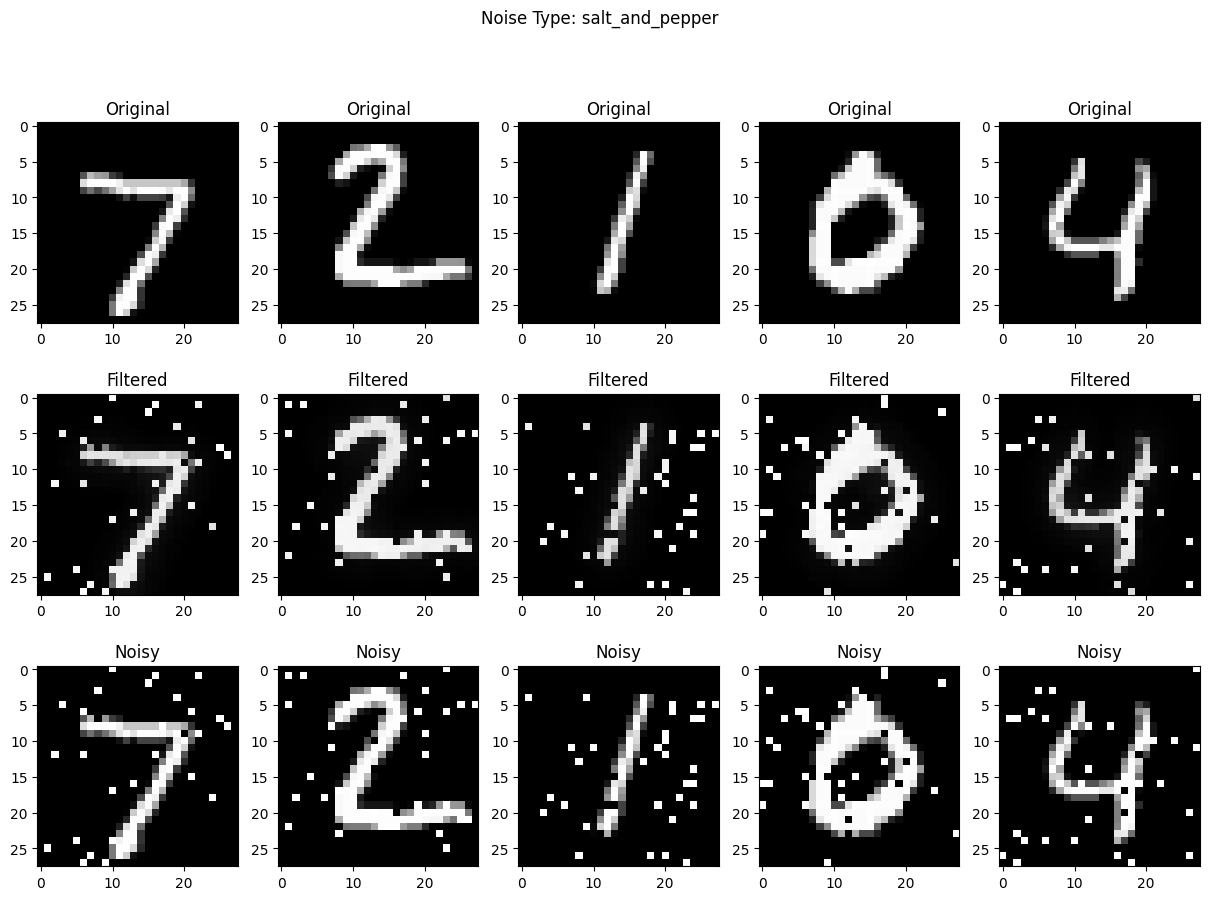

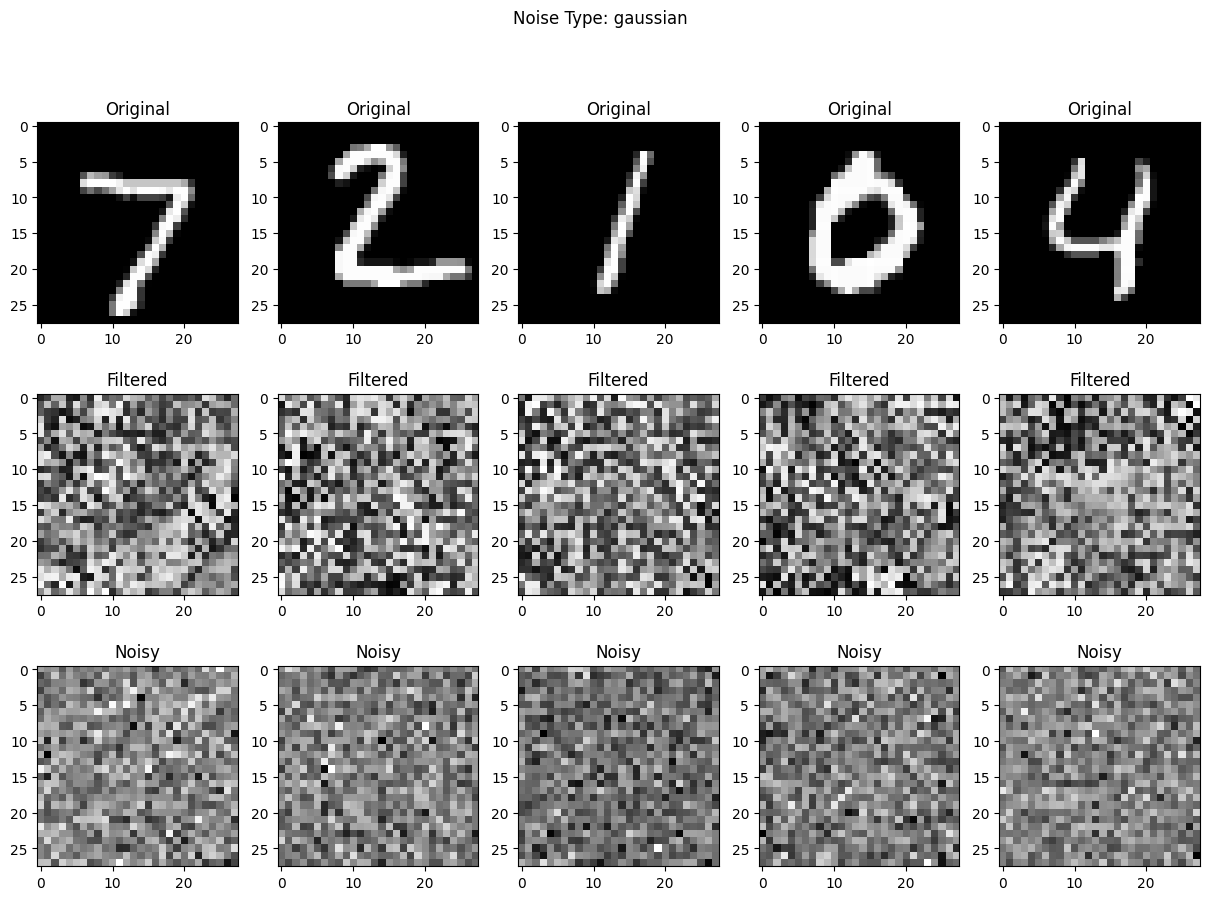

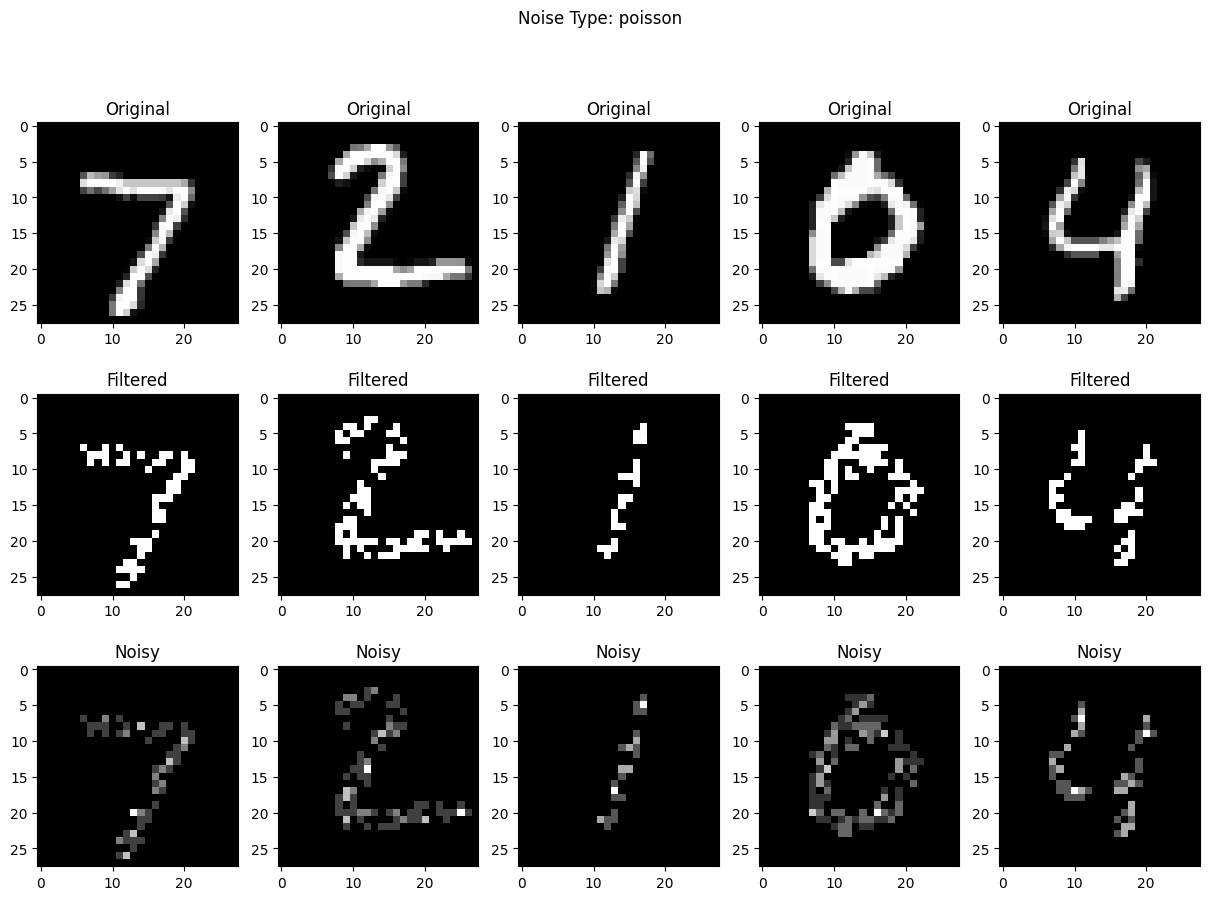

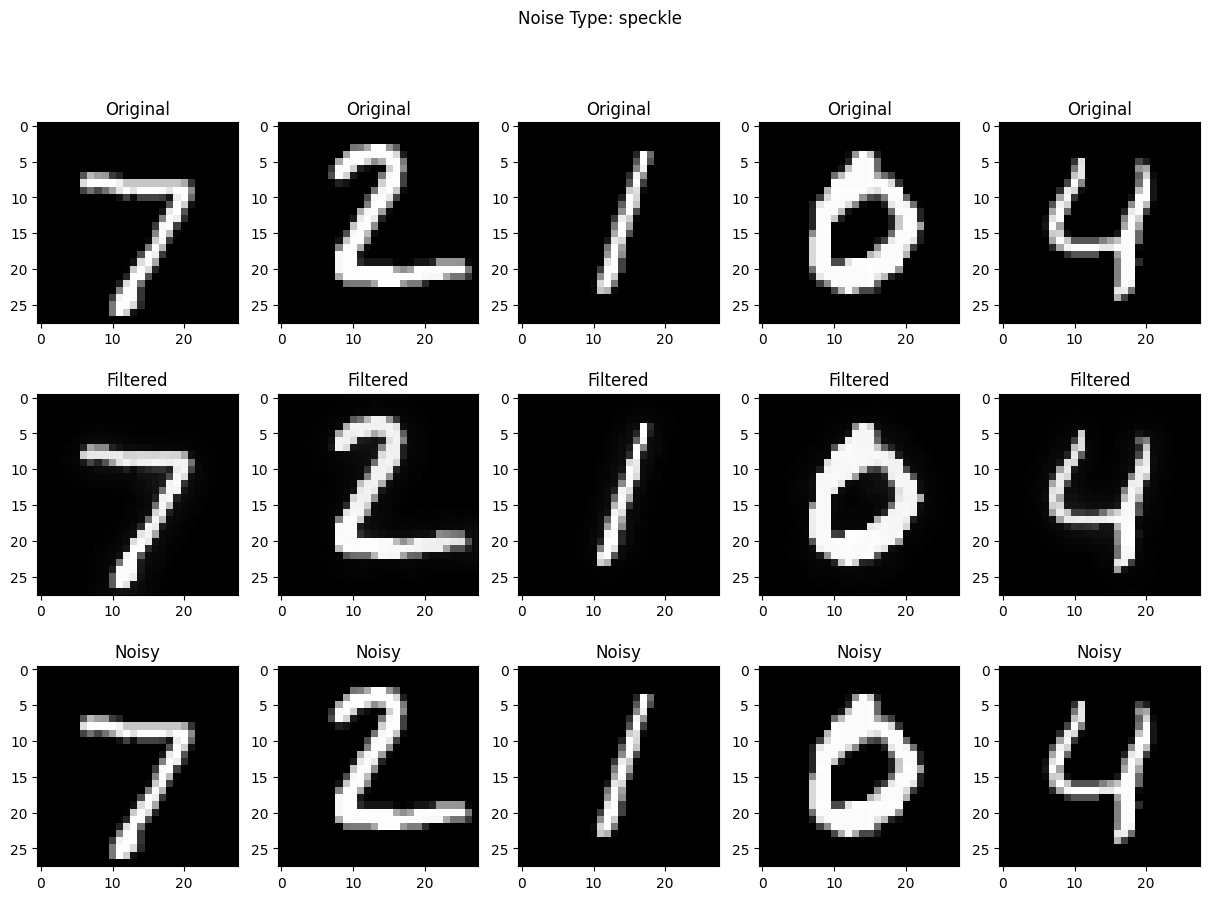

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 1
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Ensure the noise has the same data type as the image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert the noisy image to 8-bit format
        noisy_image_8u = (noisy_image * 255).astype(np.uint8)

        # Apply Bilateral filter
        filtered_image = cv2.bilateralFilter(noisy_image_8u, d=9, sigmaColor=75, sigmaSpace=75)

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    num_images_to_display = min(5, len(noisy_images))  # Limit to a maximum of 5 images
    fig, axs = plt.subplots(3, num_images_to_display, figsize=(15, 10))
    for i in range(num_images_to_display):
        original_image = X_test[i]

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")

        axs[1, i].imshow(filtered_images[i], cmap='gray')
        axs[1, i].set_title("Filtered")

        axs[2, i].imshow(noisy_images[i], cmap='gray')
        axs[2, i].set_title("Noisy")

    plt.suptitle(f"Noise Type: {noise_type}")
    plt.show()


Mean Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

(x_train,y_train),(x_test,y_test)=mnist.load_data()

# normalizing and reshaping the dataset to 4D tensors
x_train = x_train.reshape((60000, 28, 28, 1))
x_train =x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test =x_test.astype('float32') / 255

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train) # Convert the training labels to one-hot encoding
y_test = to_categorical(y_test) # Convert the testing labels to one-hot encoding

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Apply mean filtering to the training, validation, and testing sets
kernel_size = 3
train_images_filtered = np.zeros((x_train.shape[0], 28, 28, 1))
val_images_filtered = np.zeros((val_images.shape[0], 28, 28, 1))
test_images_filtered = np.zeros((x_test.shape[0], 28, 28, 1))


for i in range(x_train.shape[0]):
    train_images_filtered[i] = np.expand_dims(cv2.blur(x_train[i], (kernel_size, kernel_size)), axis=-1)


for i in range(val_images.shape[0]):
    val_images_filtered[i] = np.expand_dims(cv2.blur(val_images[i], (kernel_size, kernel_size)), axis=-1)


for i in range(x_test.shape[0]):
    test_images_filtered[i] = np.expand_dims(cv2.blur(x_test[i], (kernel_size, kernel_size)), axis=-1)

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on the filtered training set
model.fit(train_images_filtered, y_train, epochs=5, validation_data=(val_images_filtered, val_labels))

# Evaluate the model on the filtered testing set
test_loss, test_acc = model.evaluate(test_images_filtered, y_test)
print("Test accuracy:", test_acc)



Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1714 - accuracy: 0.9475 - val_loss: 0.0855 - val_accuracy: 0.9732
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0546 - accuracy: 0.9827 - val_loss: 0.0419 - val_accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0260 - val_accuracy: 0.9919
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0311 - accuracy: 0.9907 - val_loss: 0.0205 - val_accuracy: 0.9932
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0287 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


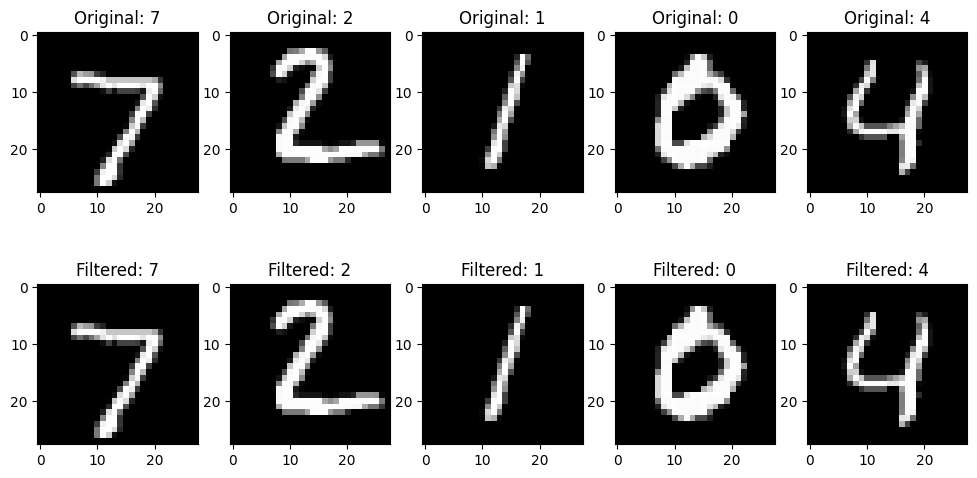

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2647 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1150 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9864
Noise Type: salt_and_pepper
Average PSNR: 17.38
Average NMSE: 0.45

Noise Type: gaussian
Average PSNR: -18.75
Average NMSE: 28.74

Noise Type: poisson
Average PSNR: 13.91
Average NMSE: 0.66

Noise Type: speckle
Average PSNR: 19.50
Average NMSE: 0.35



<ipython-input-24-0f30103e26fb>:86: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


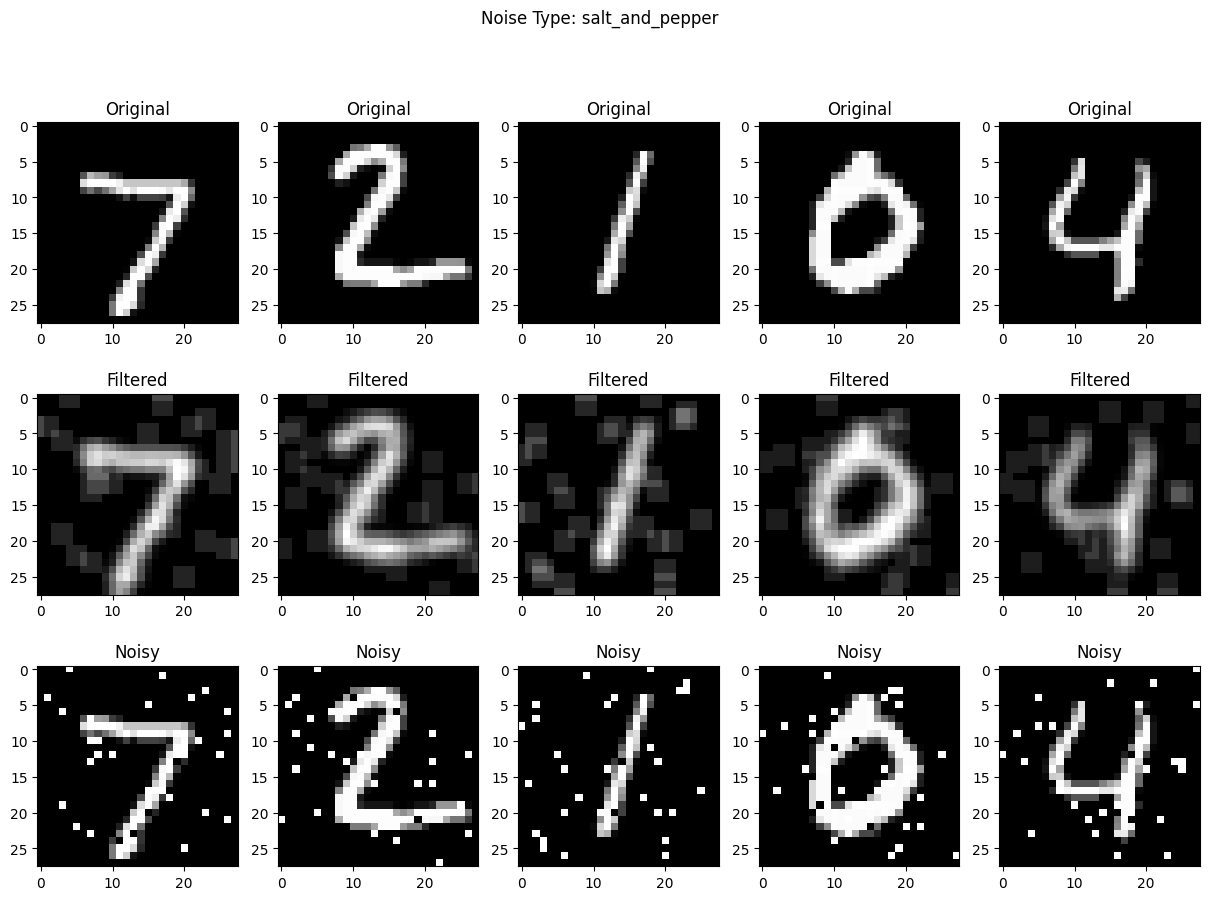

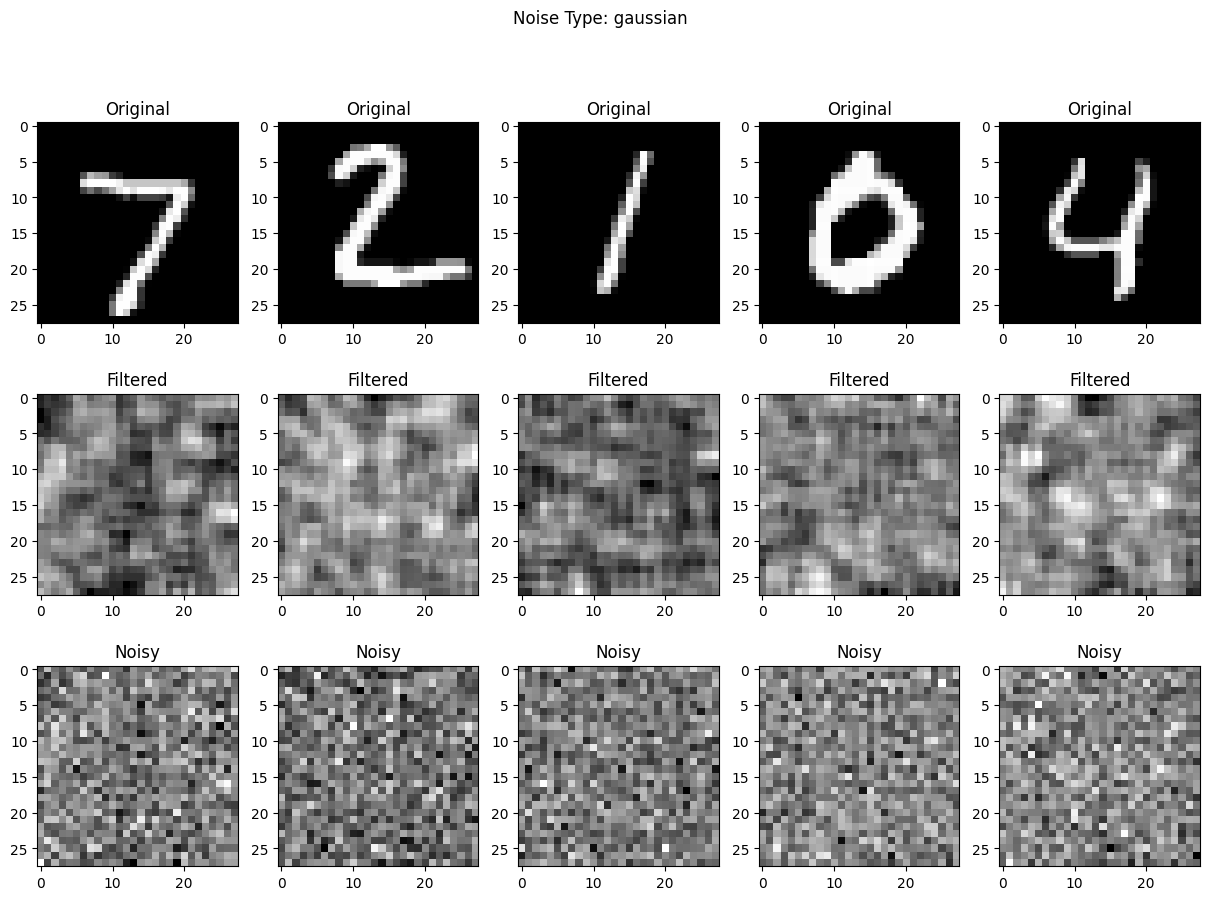

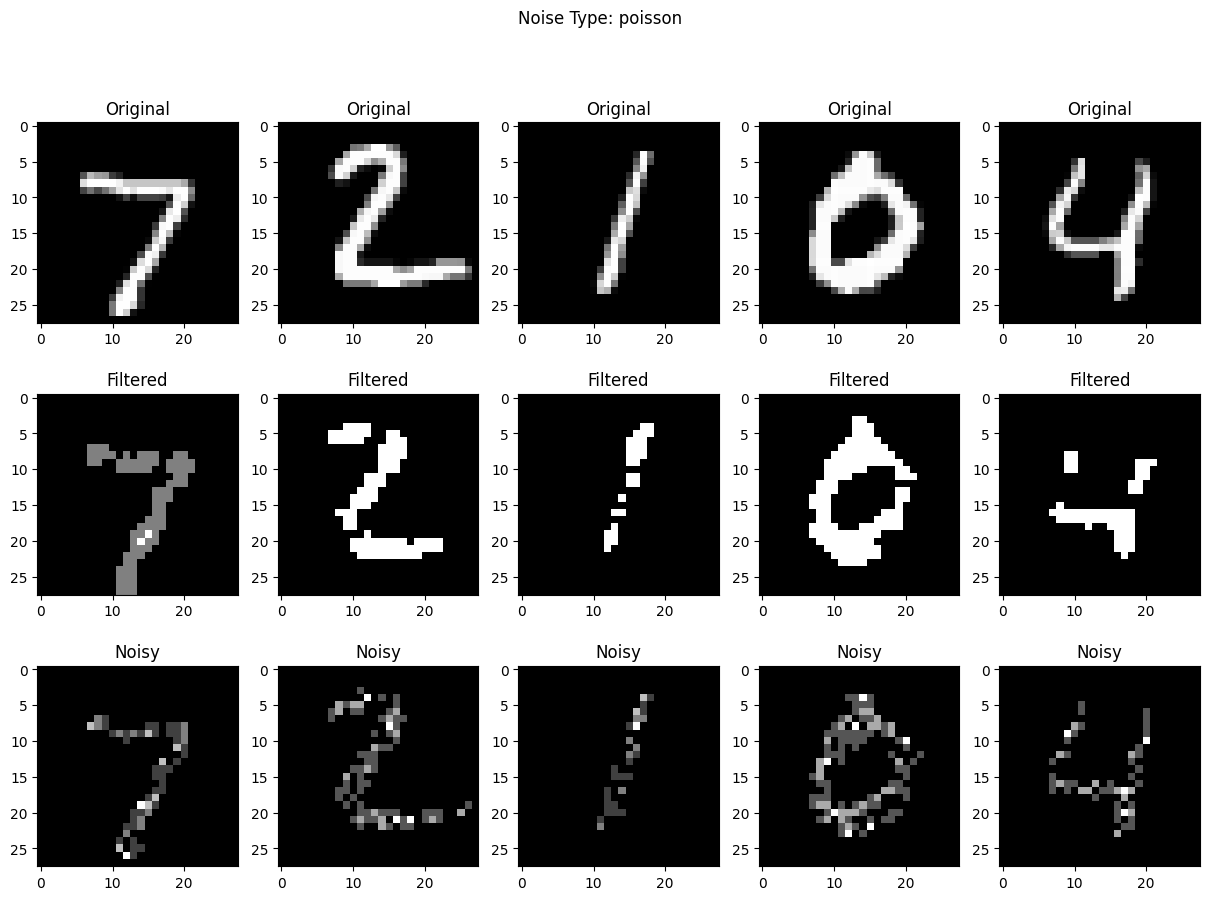

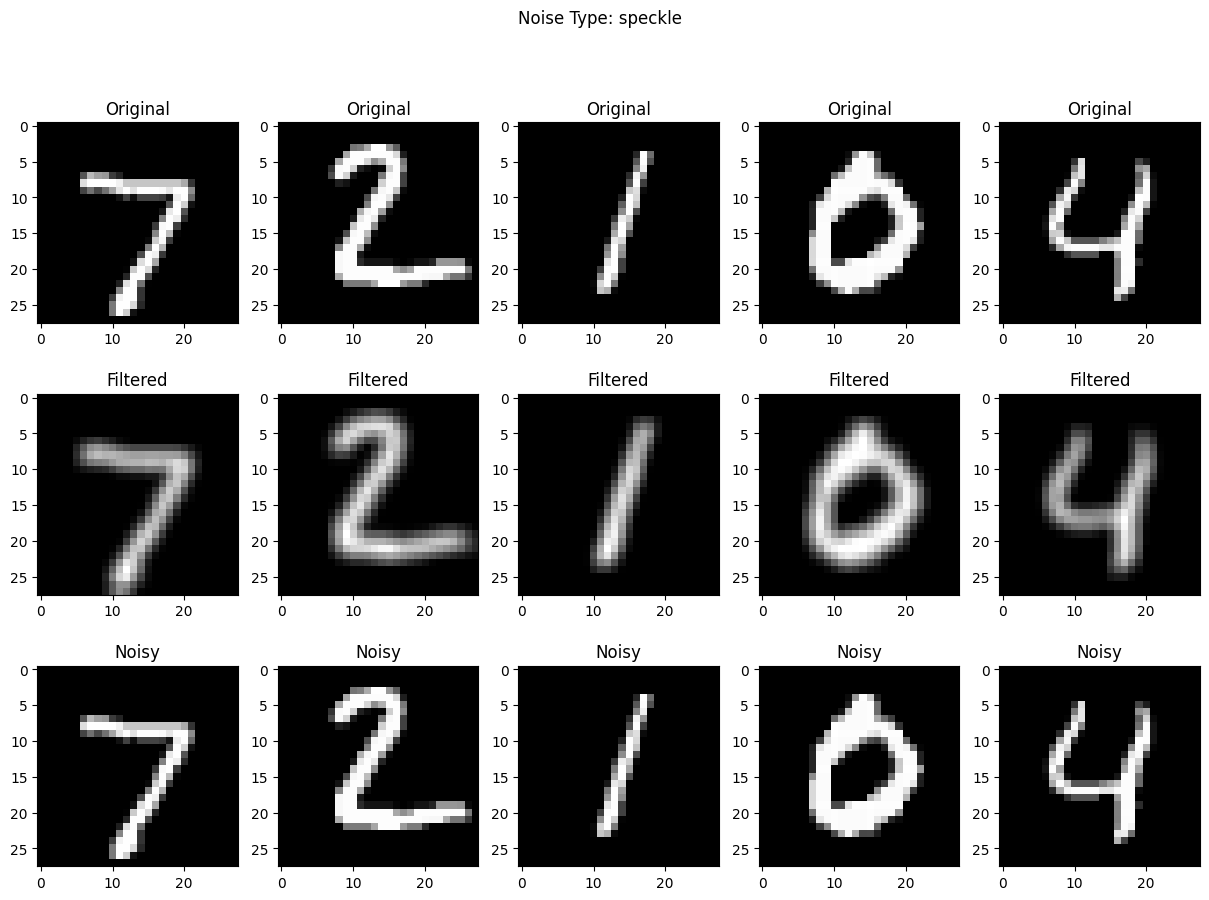

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 1
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Ensure the noise has the same data type as the image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Apply Mean filter
        filtered_image = cv2.blur(noisy_image, (3, 3))  # Adjust kernel size as needed

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    num_images_to_display = min(5, len(noisy_images))  # Limit to a maximum of 5 images
    fig, axs = plt.subplots(3, num_images_to_display, figsize=(15, 10))
    for i in range(num_images_to_display):
        original_image = X_test[i]

        axs[0, i].imshow(original_image, cmap='gray')
        axs[0, i].set_title("Original")

        axs[1, i].imshow(filtered_images[i], cmap='gray')
        axs[1, i].set_title("Filtered")

        axs[2, i].imshow(noisy_images[i], cmap='gray')
        axs[2, i].set_title("Noisy")

    plt.suptitle(f"Noise Type: {noise_type}")
    plt.show()


Gaussian Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2531 - accuracy: 0.9277
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1088 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0744 - accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0564 - accuracy: 0.9821
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.968


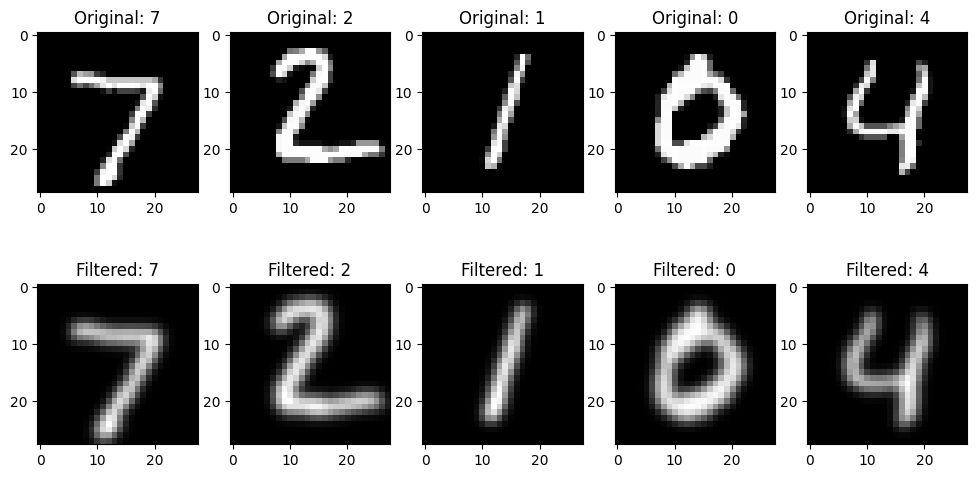

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Apply the Gaussian filter to the test data
from scipy.ndimage import gaussian_filter
X_test_filtered = np.array([gaussian_filter(X_test[i], sigma=1) for i in range(len(X_test))])

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2588 - accuracy: 0.9255
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1151 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0788 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9859


<ipython-input-27-4e0e0ddea8f0>:86: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


Noise Type: salt_and_pepper
Average PSNR: -33.40
Average NMSE: 155.08

Noise Type: gaussian
Average PSNR: -44.15
Average NMSE: 533.76

Noise Type: poisson
Average PSNR: 11.12
Average NMSE: 0.91

Noise Type: speckle
Average PSNR: 10.25
Average NMSE: 1.00



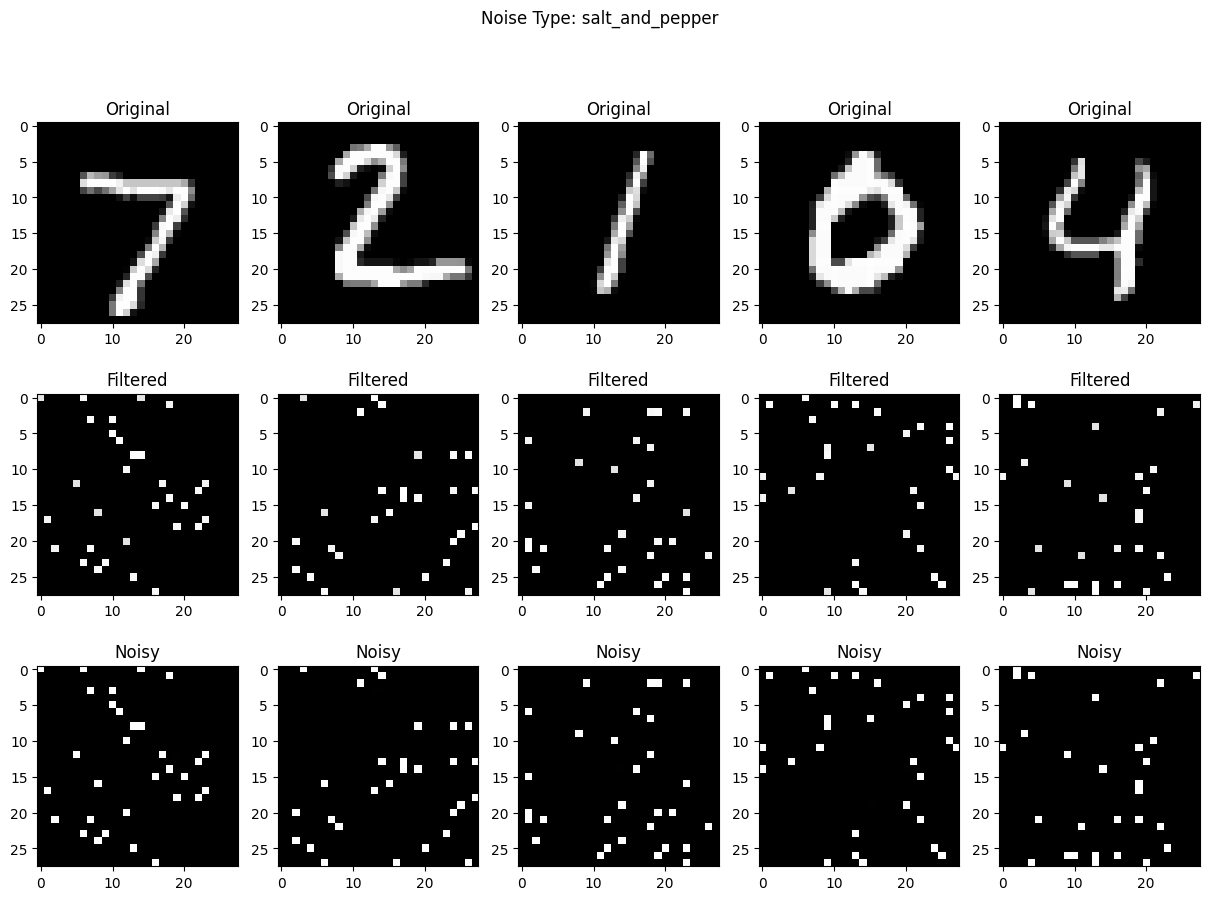

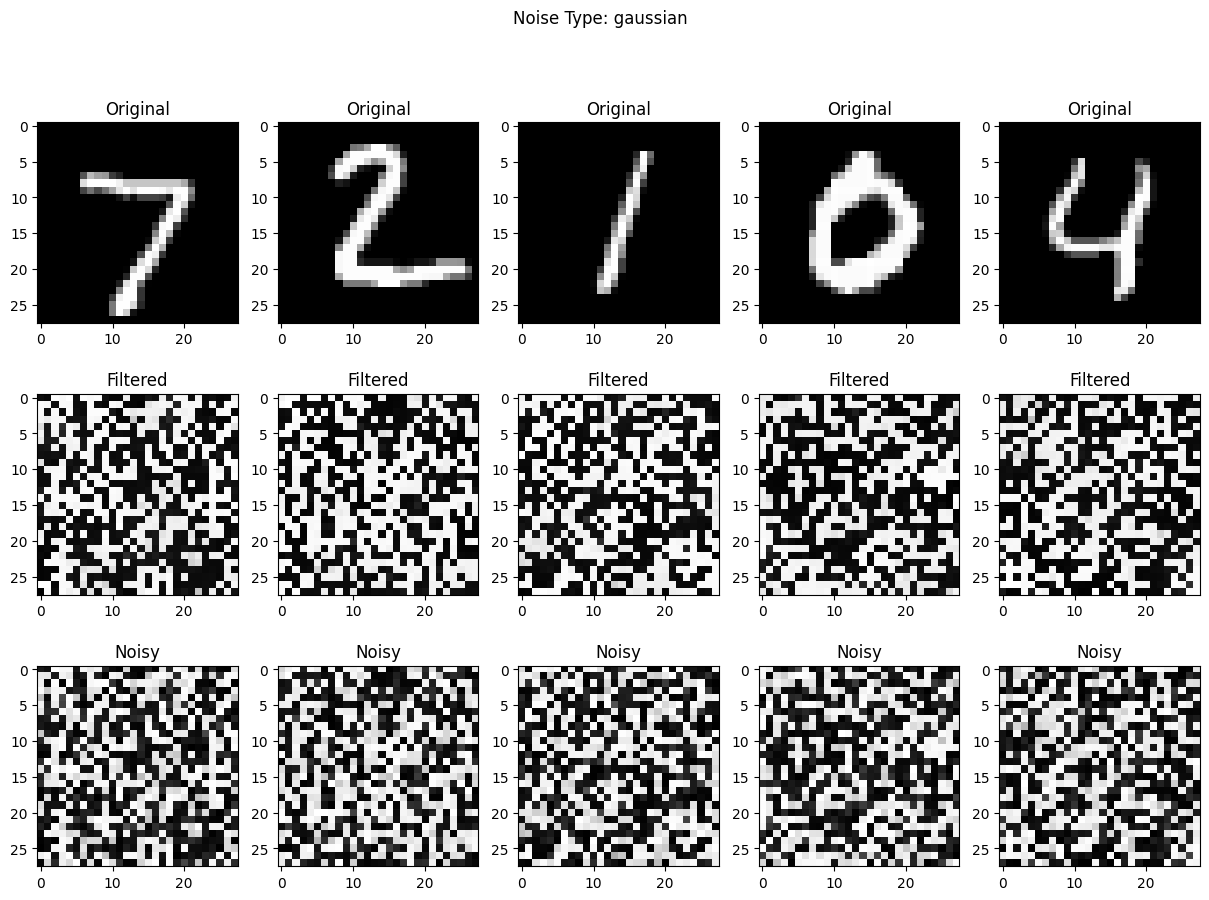

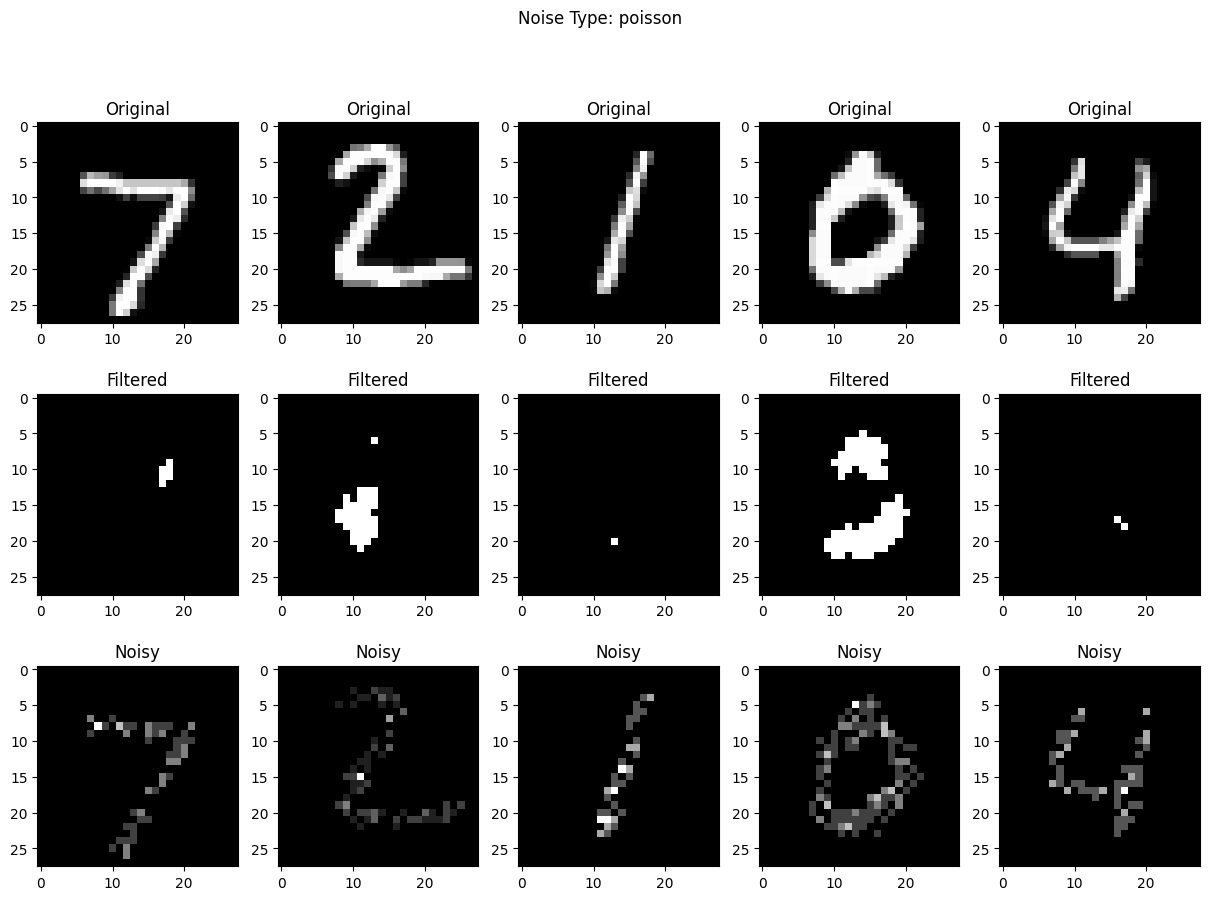

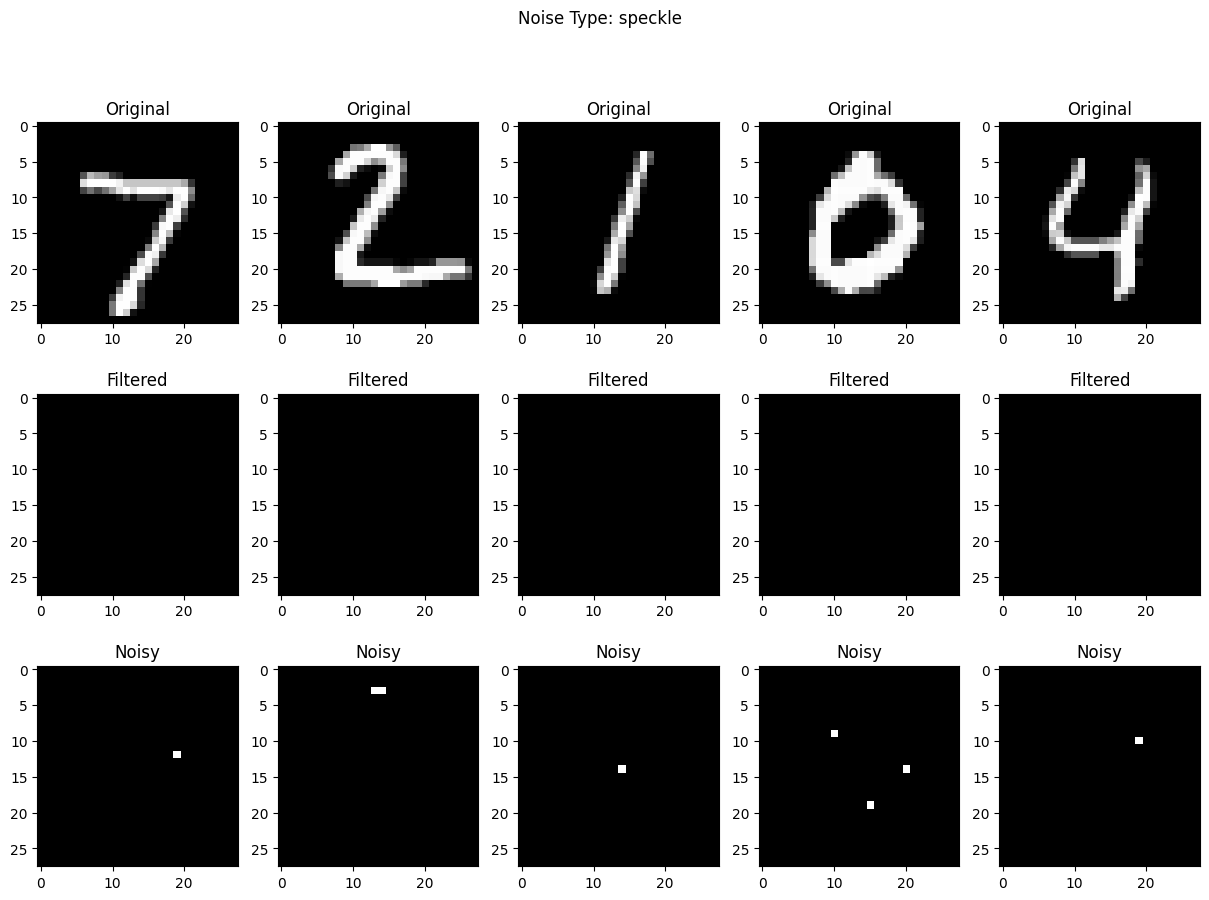

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 255
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Use the same data type as the original image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)  # Convert to 8-bit format

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)  # Convert to 8-bit format
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert noisy image to 8-bit format
        noisy_image = noisy_image.astype(np.uint8)

        # Apply Bilateral filter
        filtered_image = cv2.bilateralFilter(noisy_image, d=9, sigmaColor=75, sigmaSpace=75)  # Adjust parameters as needed

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    num_images_to_display = min(5, len(noisy_images))  # Limit to a maximum of 5 images
    if num_images_to_display > 0:  # Ensure at least one image is displayed
        fig, axs = plt.subplots(3, num_images_to_display, figsize=(15, 10))
        for i in range(num_images_to_display):
            original_image = X_test[i]

            axs[0, i].imshow(original_image, cmap='gray')
            axs[0, i].set_title("Original")

            axs[1, i].imshow(filtered_images[i], cmap='gray')
            axs[1, i].set_title("Filtered")

            axs[2, i].imshow(noisy_images[i], cmap='gray')
            axs[2, i].set_title("Noisy")

        plt.suptitle(f"Noise Type: {noise_type}")
        plt.show()


Spatial Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2617 - accuracy: 0.9255
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1136 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0777 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Accuracy: 0.4232


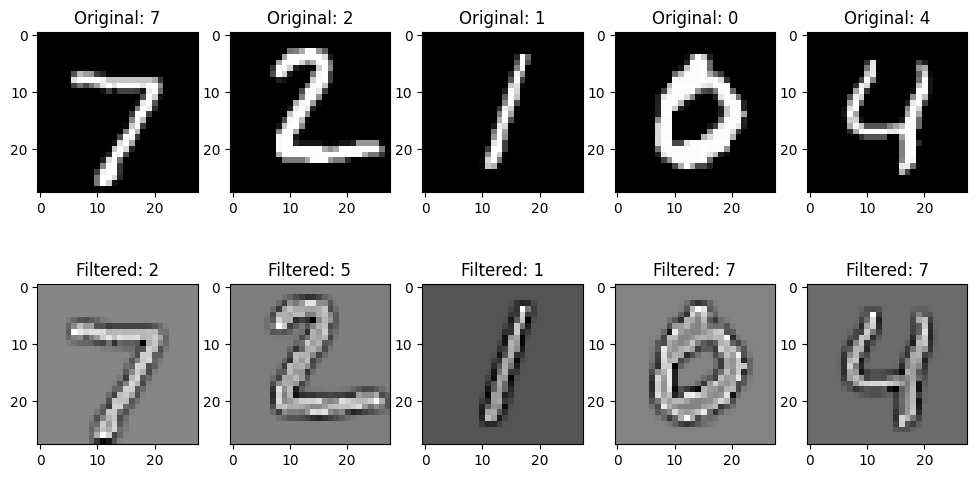

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the spatial filtering algorithm
def spatial_filter(img):
    # Define kernel for filtering
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], np.float32)

    # Apply filter to image
    filtered_img = cv2.filter2D(img, -1, kernel)

    return filtered_img

# Apply the spatial filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    filtered_img = spatial_filter(X_test[i])
    X_test_filtered[i] = filtered_img

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2551 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1131 - accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0775 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0573 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9865


<ipython-input-30-481535363355>:86: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


Noise Type: salt_and_pepper
Average PSNR: -25.77
Average NMSE: 64.39

Noise Type: gaussian
Average PSNR: -42.16
Average NMSE: 425.27

Noise Type: poisson
Average PSNR: 13.75
Average NMSE: 0.67

Noise Type: speckle
Average PSNR: 10.47
Average NMSE: 0.98



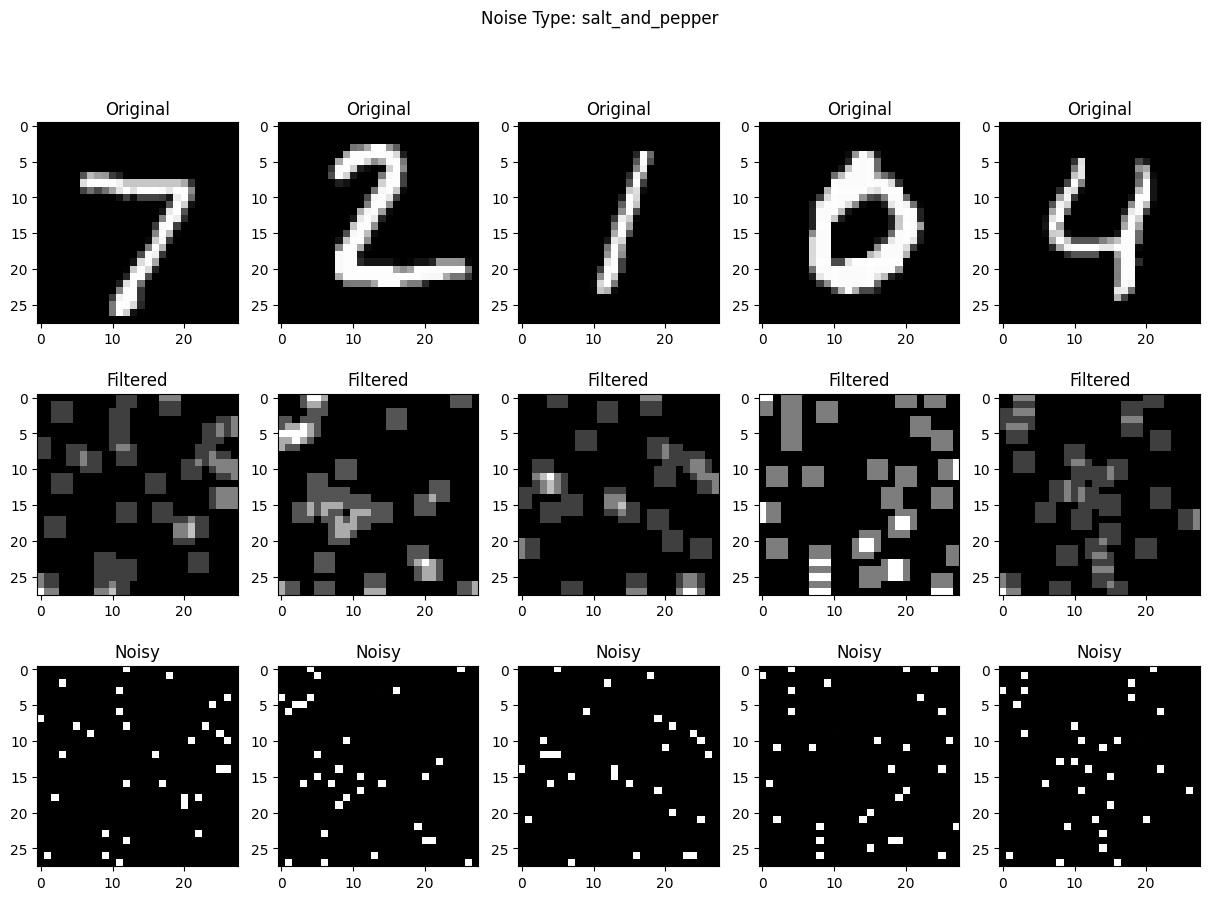

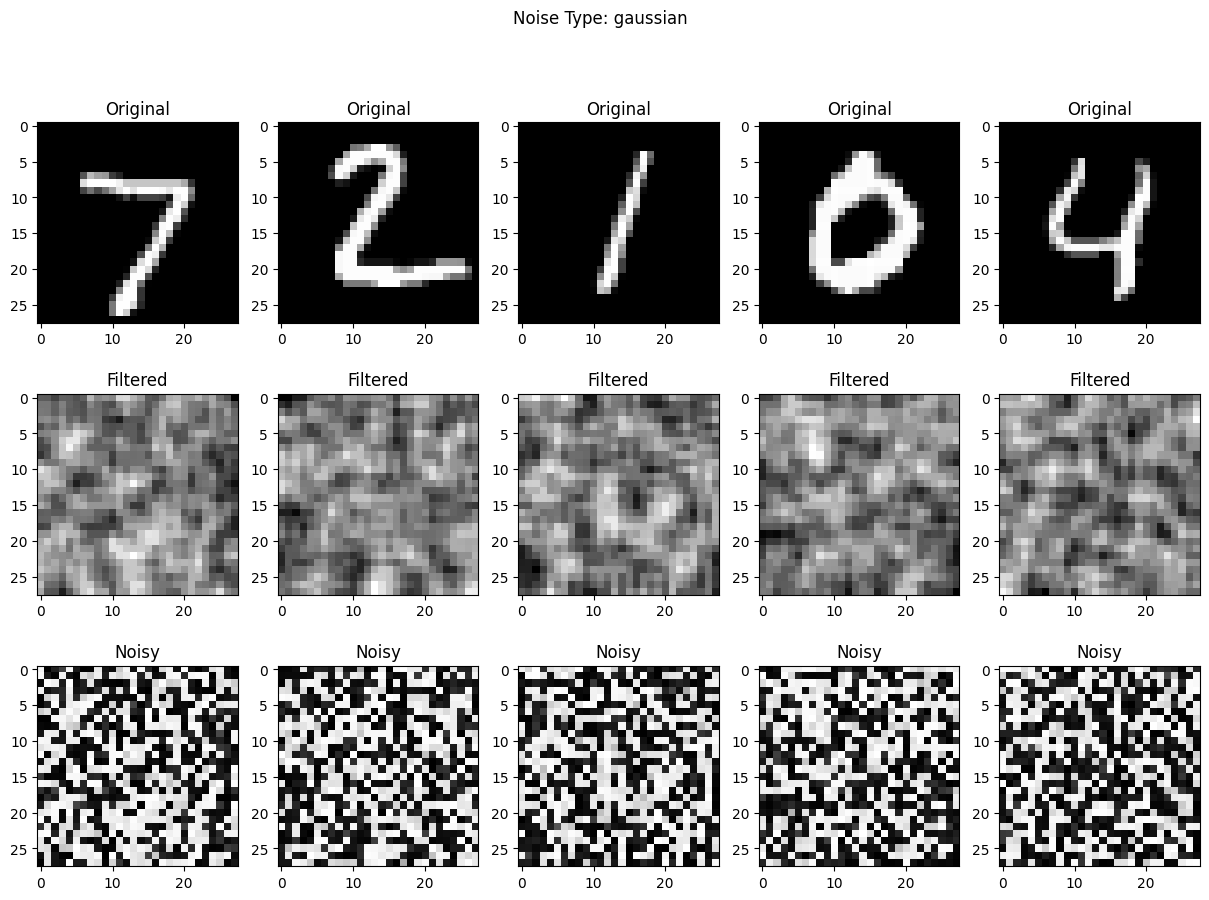

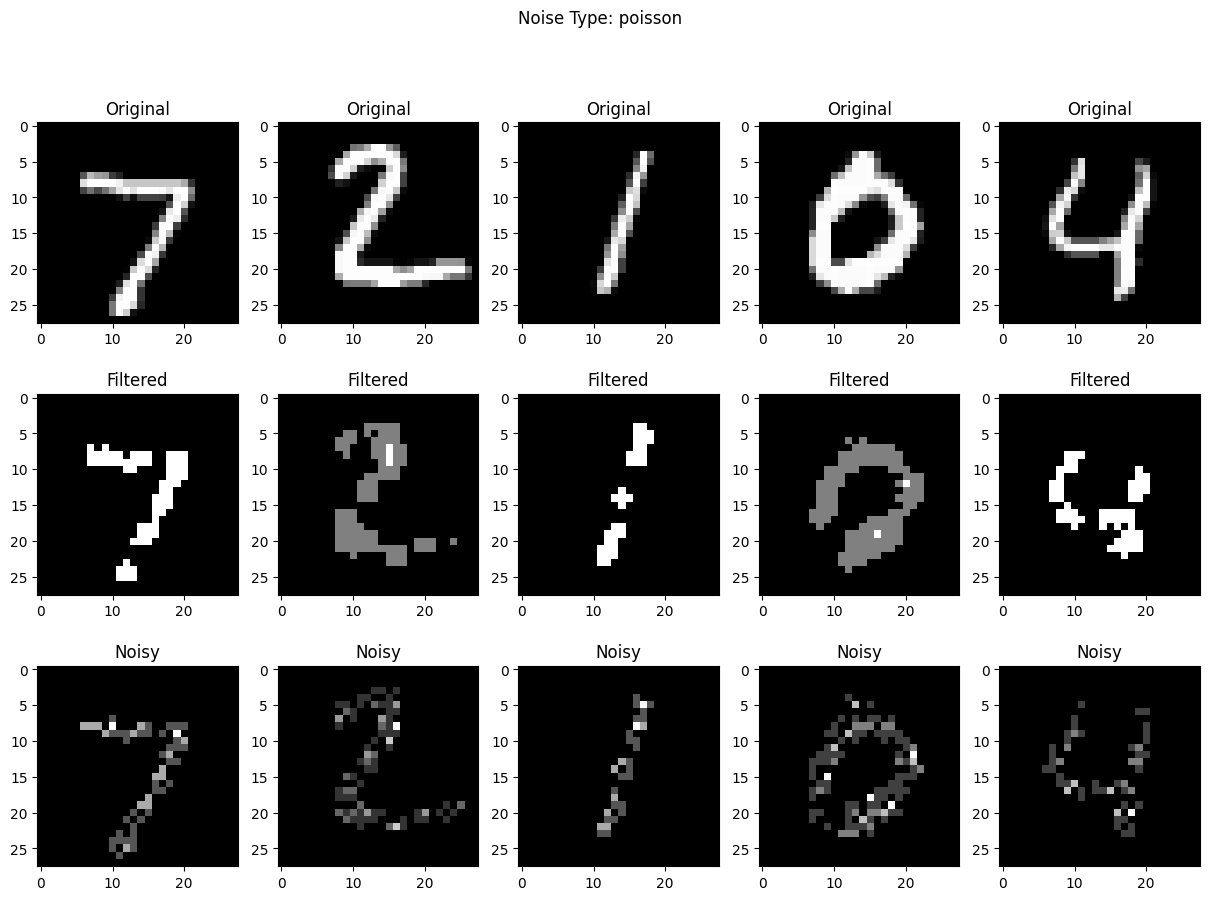

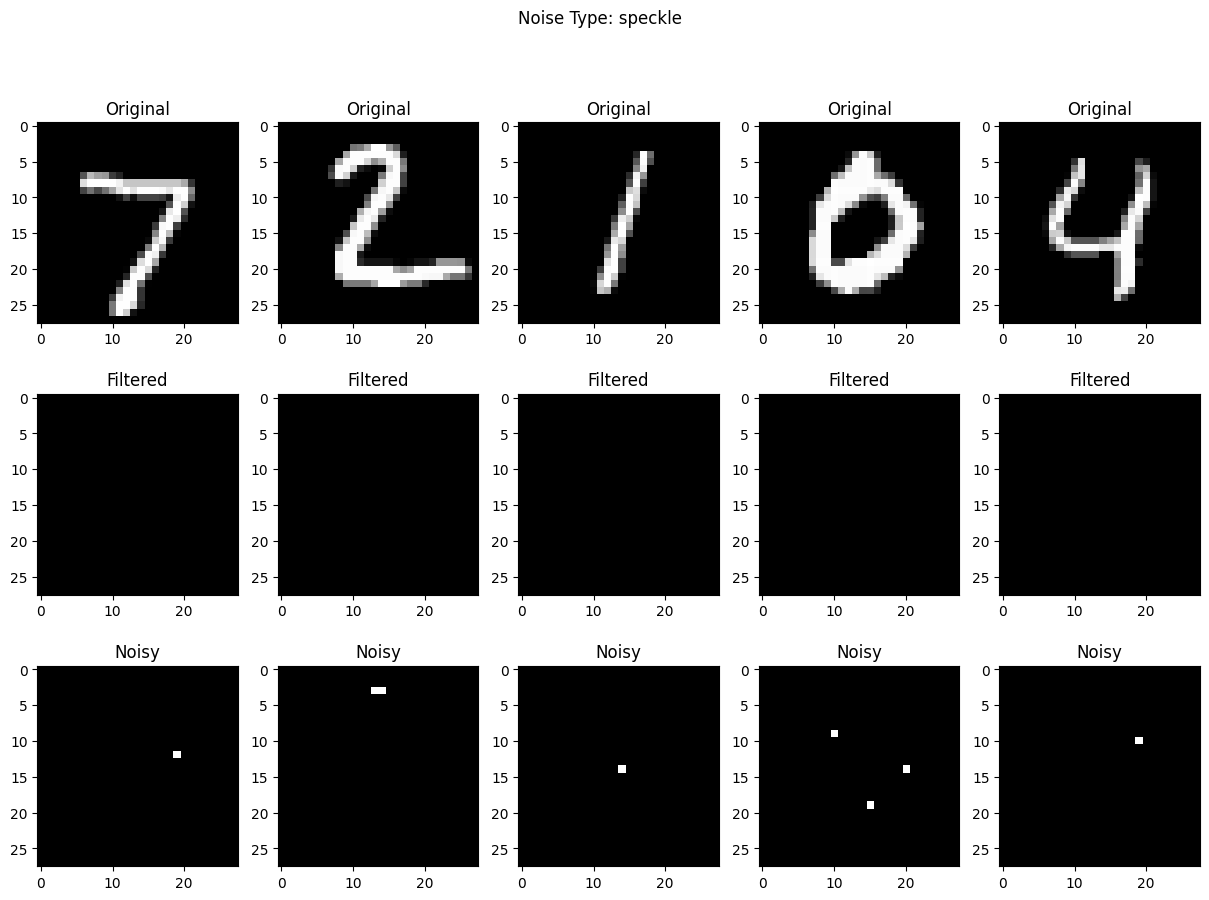

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 255
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Use the same data type as the original image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)  # Convert to 8-bit format

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)  # Convert to 8-bit format
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert noisy image to 8-bit format
        noisy_image = noisy_image.astype(np.uint8)

        # Apply spatial filter (Mean filter in this case)
        filtered_image = cv2.blur(noisy_image, (3, 3))  # Adjust filter size as needed

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    num_images_to_display = min(5, len(noisy_images))  # Limit to a maximum of 5 images
    if num_images_to_display > 0:  # Ensure at least one image is displayed
        fig, axs = plt.subplots(3, num_images_to_display, figsize=(15, 10))
        for i in range(num_images_to_display):
            original_image = X_test[i]

            axs[0, i].imshow(original_image, cmap='gray')
            axs[0, i].set_title("Original")

            axs[1, i].imshow(filtered_images[i], cmap='gray')
            axs[1, i].set_title("Filtered")

            axs[2, i].imshow(noisy_images[i], cmap='gray')
            axs[2, i].set_title("Noisy")

        plt.suptitle(f"Noise Type: {noise_type}")
        plt.show()


Temporal Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the quadratic filter kernel
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)

# Define the spatial filtering algorithm
def spatial_filter(img):
    # Apply filter to image
    filtered_img = cv2.filter2D(img, -1, kernel)

    return filtered_img

# Apply the spatial filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    filtered_img = spatial_filter(X_test[i])
    X_test_filtered[i] = filtered_img


# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2646 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1170 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0803 - accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9825
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Accuracy: 0.1012


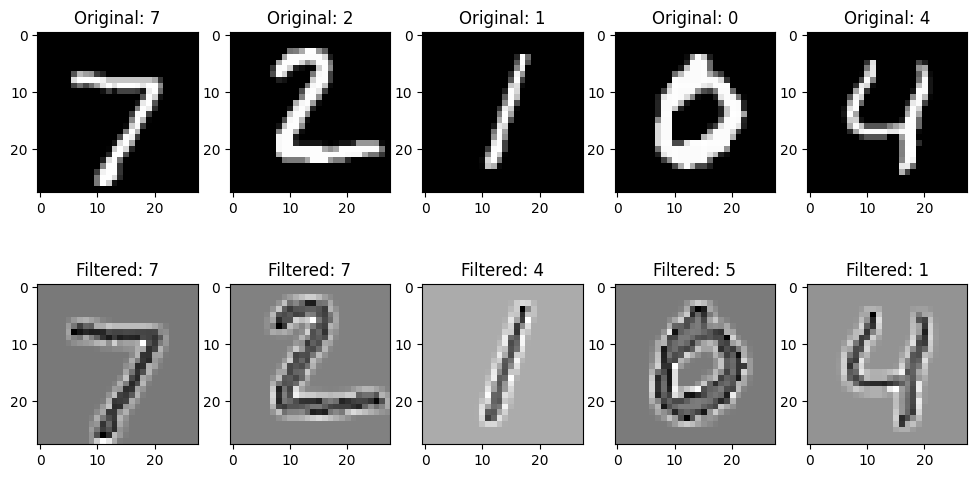

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2631 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1166 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0800 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0597 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9859


<ipython-input-34-11d8753dbab4>:86: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


Noise Type: salt_and_pepper
Average PSNR: 7.14
Average NMSE: 4.62

Noise Type: gaussian
Average PSNR: -43.67
Average NMSE: 505.91

Noise Type: poisson
Average PSNR: 12.34
Average NMSE: 0.79

Noise Type: speckle
Average PSNR: 10.47
Average NMSE: 0.98



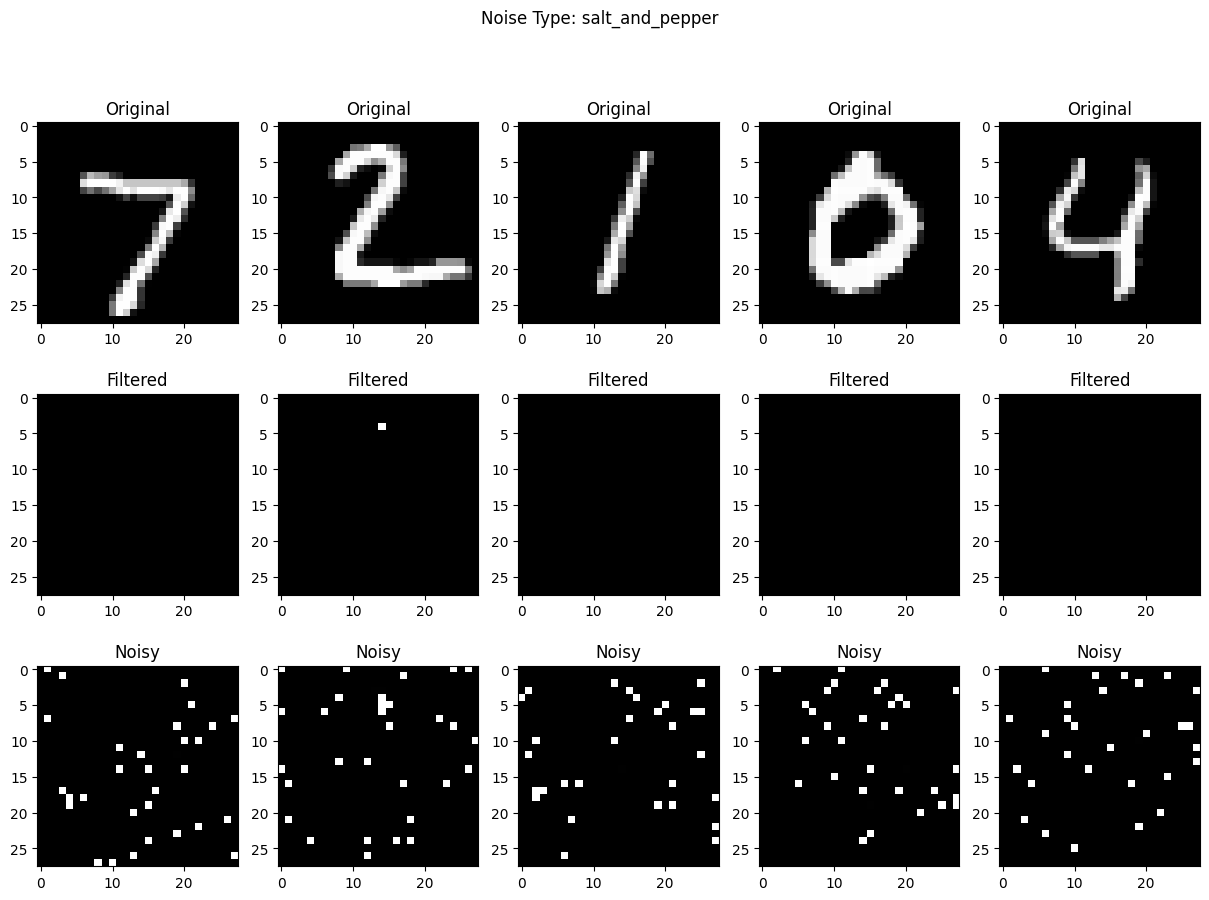

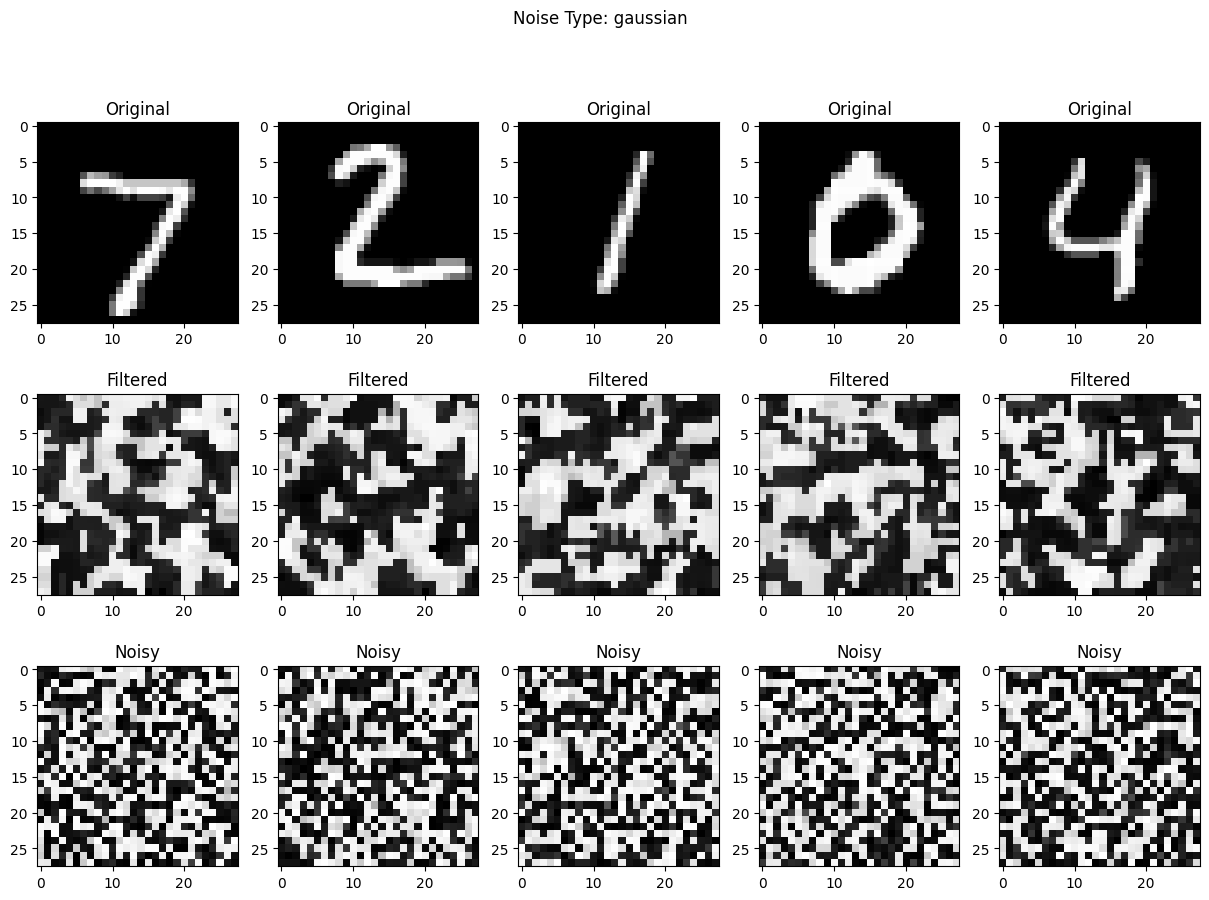

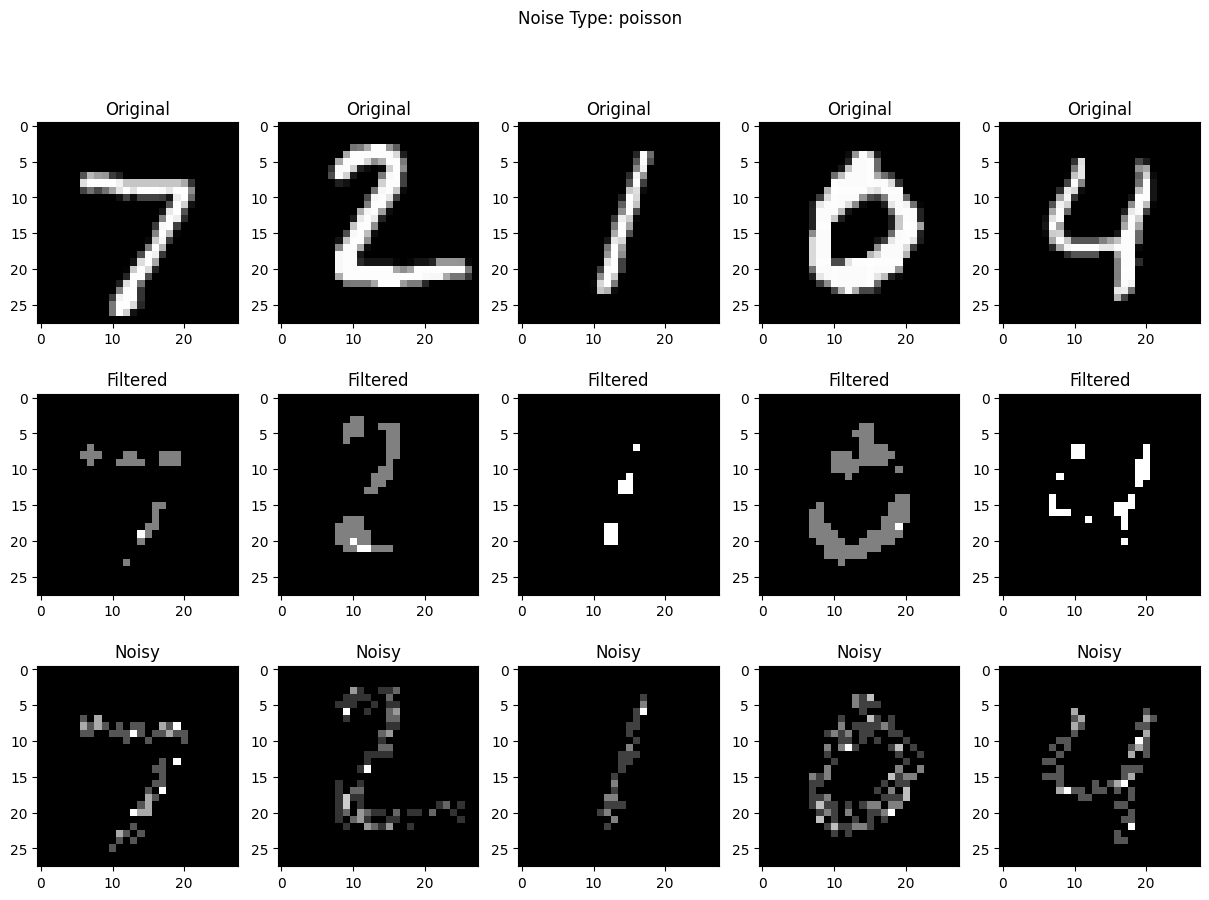

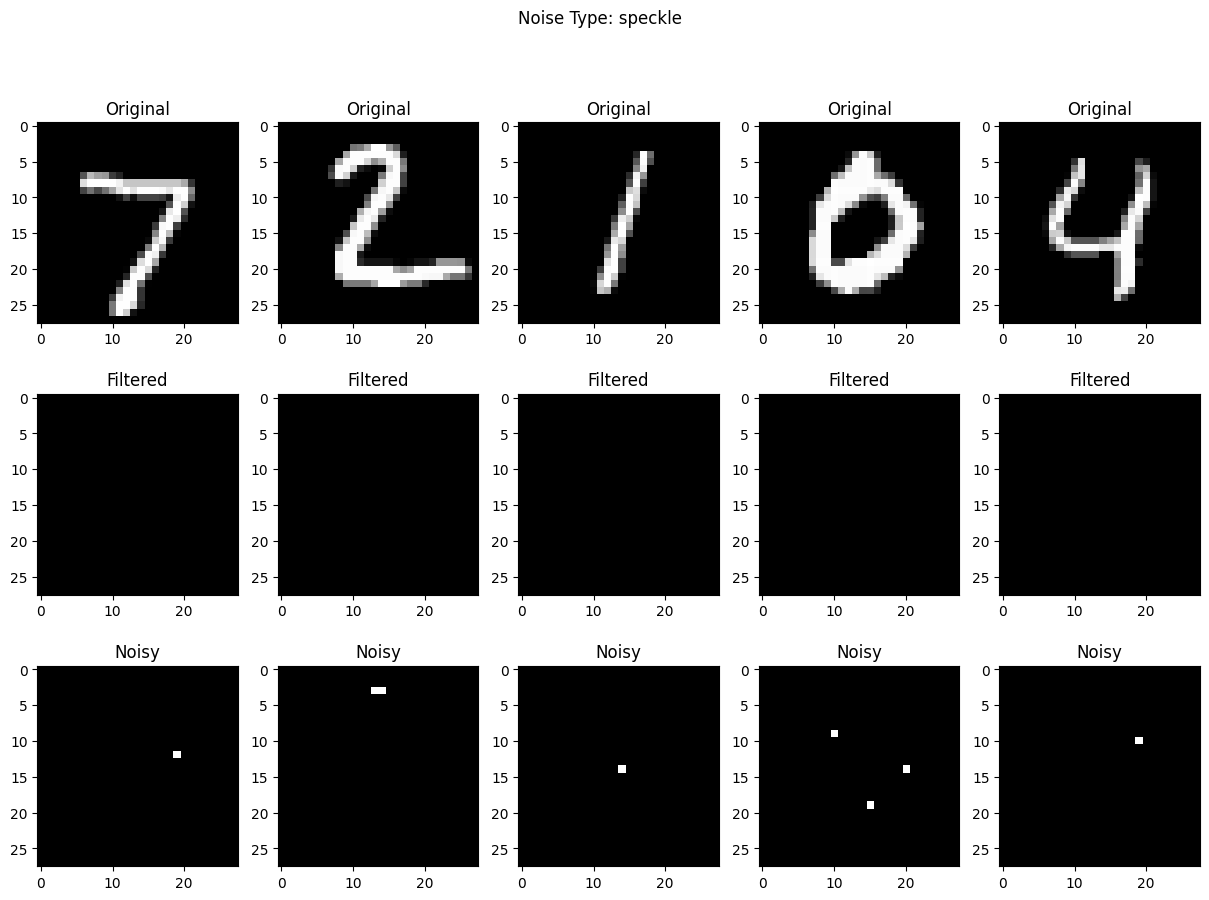

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 255
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Use the same data type as the original image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)  # Convert to 8-bit format

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)  # Convert to 8-bit format
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert noisy image to 8-bit format
        noisy_image = noisy_image.astype(np.uint8)

        # Apply Median filter
        filtered_image = cv2.medianBlur(noisy_image, 3)  # Adjust kernel size as needed

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    num_images_to_display = min(5, len(noisy_images))  # Limit to a maximum of 5 images
    if num_images_to_display > 0:  # Ensure at least one image is displayed
        fig, axs = plt.subplots(3, num_images_to_display, figsize=(15, 10))
        for i in range(num_images_to_display):
            original_image = X_test[i]

            axs[0, i].imshow(original_image, cmap='gray')
            axs[0, i].set_title("Original")

            axs[1, i].imshow(filtered_images[i], cmap='gray')
            axs[1, i].set_title("Filtered")

            axs[2, i].imshow(noisy_images[i], cmap='gray')
            axs[2, i].set_title("Noisy")

        plt.suptitle(f"Noise Type: {noise_type}")
        plt.show()


Box Blur Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0


# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)


# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)


# Define the box blur filter
def box_blur_filter(img, kernel_size):
    # Define kernel for filtering
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)


    # Apply filter to image
    filtered_img = cv2.filter2D(img, -1, kernel)


    return filtered_img


# Apply the box blur filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    filtered_img = box_blur_filter(X_test[i], kernel_size=3)
    X_test_filtered[i] = filtered_img


# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1151 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0779 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9822
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Accuracy: 0.9718


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1169 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0813 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0611 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9855
Noise Type: salt_and_pepper
Average PSNR: -25.74
Average NMSE: 64.06

Noise Type: gaussian
Average PSNR: -42.26
Average NMSE: 429.93

Noise Type: poisson
Average PSNR: 13.81
Average NMSE: 0.67

Noise Type: speckle
Average PSNR: 10.47
Average NMSE: 0.98



<ipython-input-37-f887f54c2161>:86: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


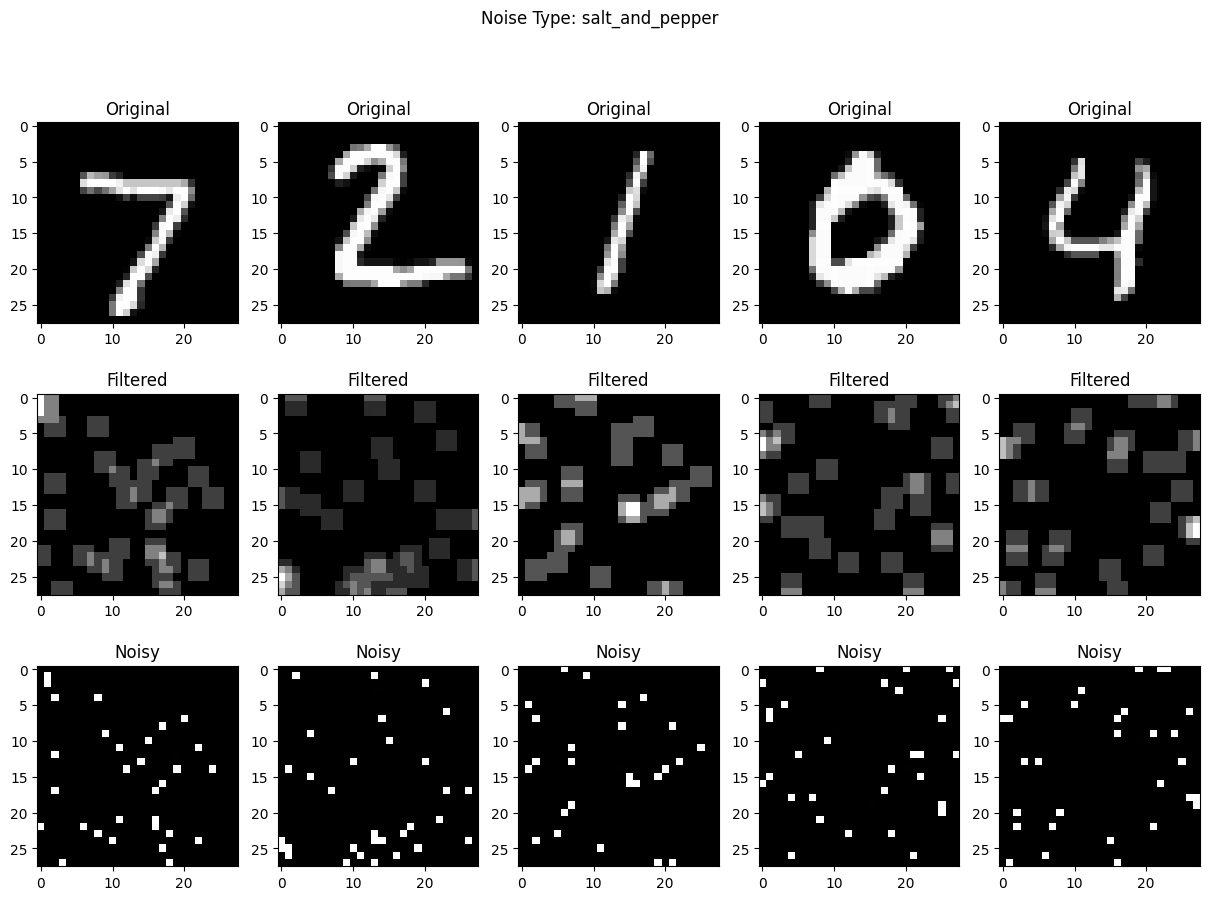

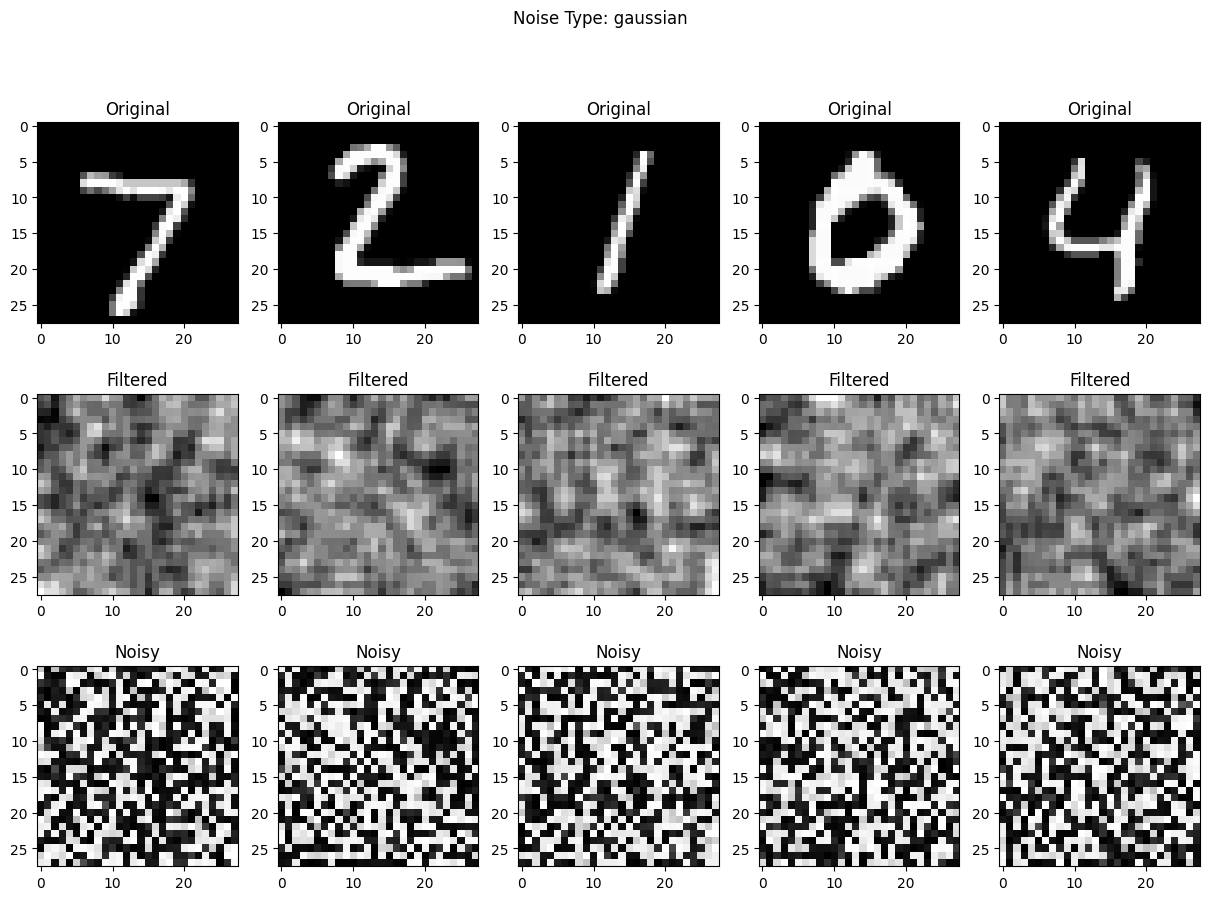

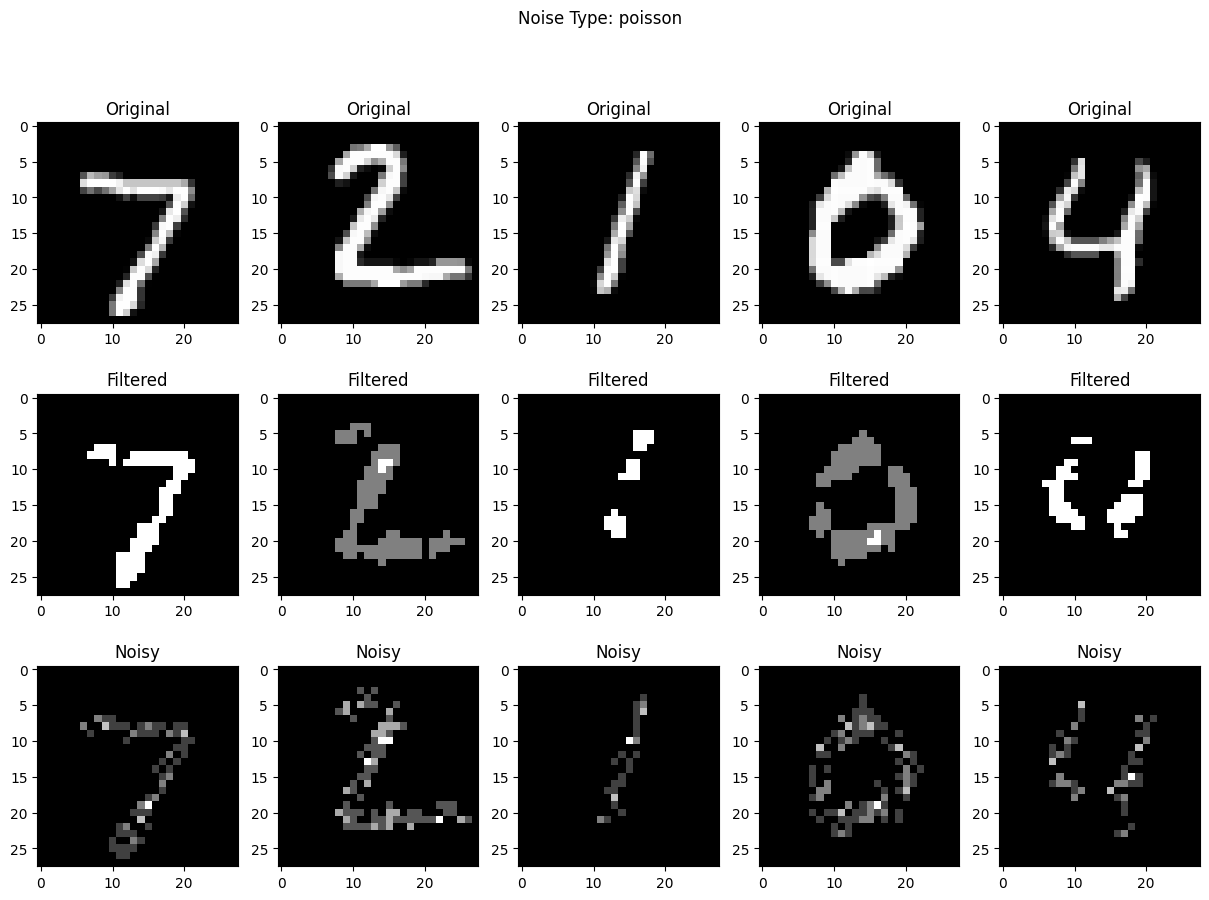

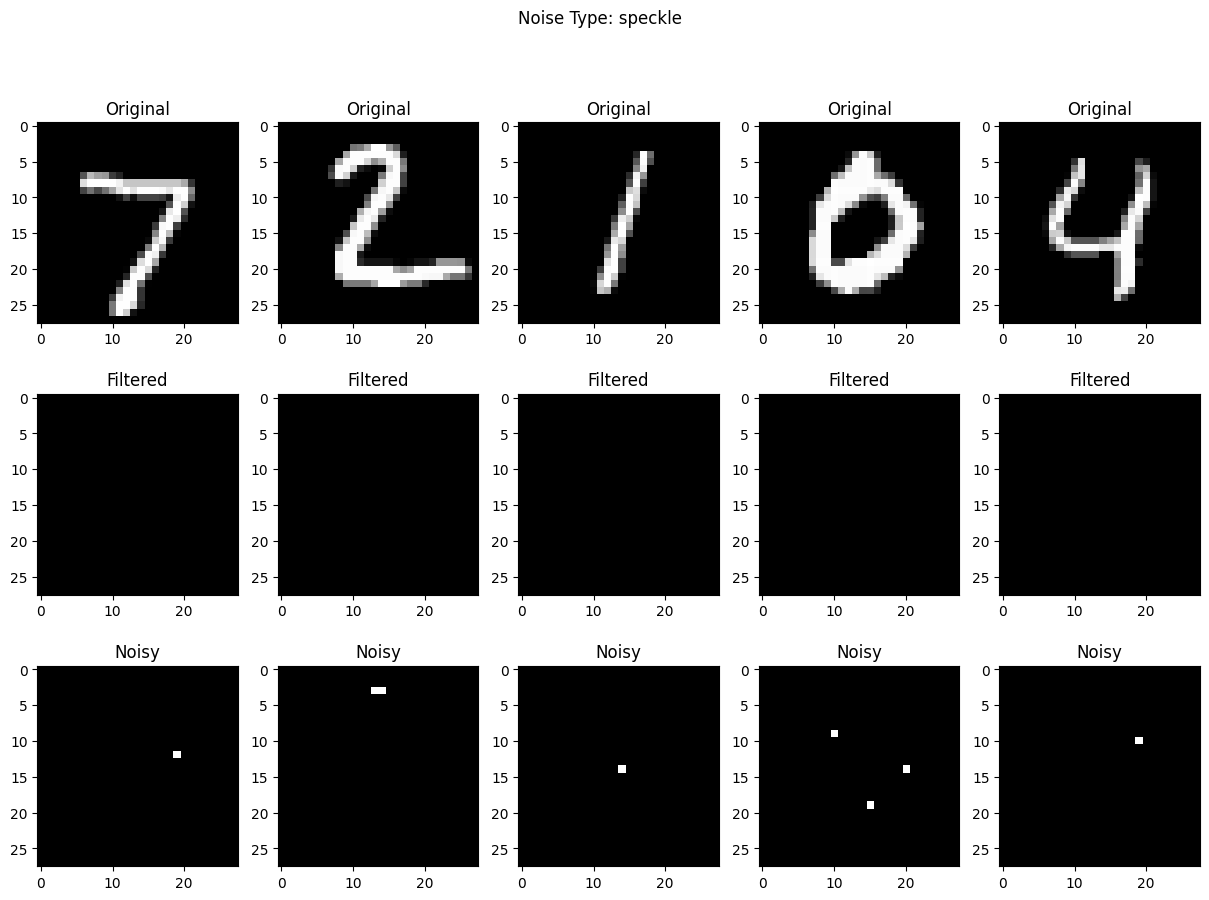

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 255
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Use the same data type as the original image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)  # Convert to 8-bit format

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)  # Convert to 8-bit format
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert noisy image to 8-bit format
        noisy_image = noisy_image.astype(np.uint8)

        # Apply Box blur filter
        filtered_image = cv2.boxFilter(noisy_image, ddepth=-1, ksize=(3, 3))  # Adjust kernel size as needed

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    num_images_to_display = min(5, len(noisy_images))  # Limit to a maximum of 5 images
    if num_images_to_display > 0:  # Ensure at least one image is displayed
        fig, axs = plt.subplots(3, num_images_to_display, figsize=(15, 10))
        for i in range(num_images_to_display):
            original_image = X_test[i]

            axs[0, i].imshow(original_image, cmap='gray')
            axs[0, i].set_title("Original")

            axs[1, i].imshow(filtered_images[i], cmap='gray')
            axs[1, i].set_title("Filtered")

            axs[2, i].imshow(noisy_images[i], cmap='gray')
            axs[2, i].set_title("Noisy")

        plt.suptitle(f"Noise Type: {noise_type}")
        plt.show()


Mexican Hat/ Laplacian Filter

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2578 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1167 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0807 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Accuracy: 0.0034


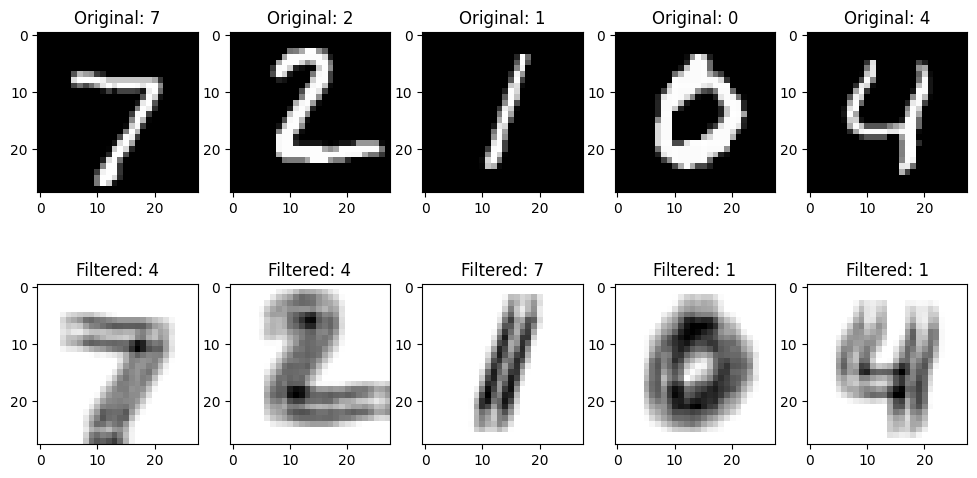

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the Mexican hat filter
def mexican_hat_filter(img):
    # Define kernel for filtering
    kernel_size = 5
    sigma = 1
    x, y = np.meshgrid(np.linspace(-1,1,kernel_size), np.linspace(-1,1,kernel_size))
    d = np.sqrt(x*x+y*y)
    kernel = (2 - (3*d**2) - np.exp(-(d**2)/(2*sigma**2))) / (2 * np.pi * sigma**3)

    # Apply filter to image
    filtered_img = cv2.filter2D(img, -1, kernel)

    return filtered_img

# Apply the Mexican hat filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    filtered_img = mexican_hat_filter(X_test[i])
    X_test_filtered[i] = filtered_img

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1174 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0815 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0624 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0479 - accuracy: 0.9854
Noise Type: salt_and_pepper
Average PSNR: -46.86
Average NMSE: 729.16

Noise Type: gaussian
Average PSNR: -53.85
Average NMSE: 1632.70

Noise Type: poisson
Average PSNR: -4.11
Average NMSE: 5.24

Noise Type: speckle
Average PSNR: 8.65
Average NMSE: 1.22



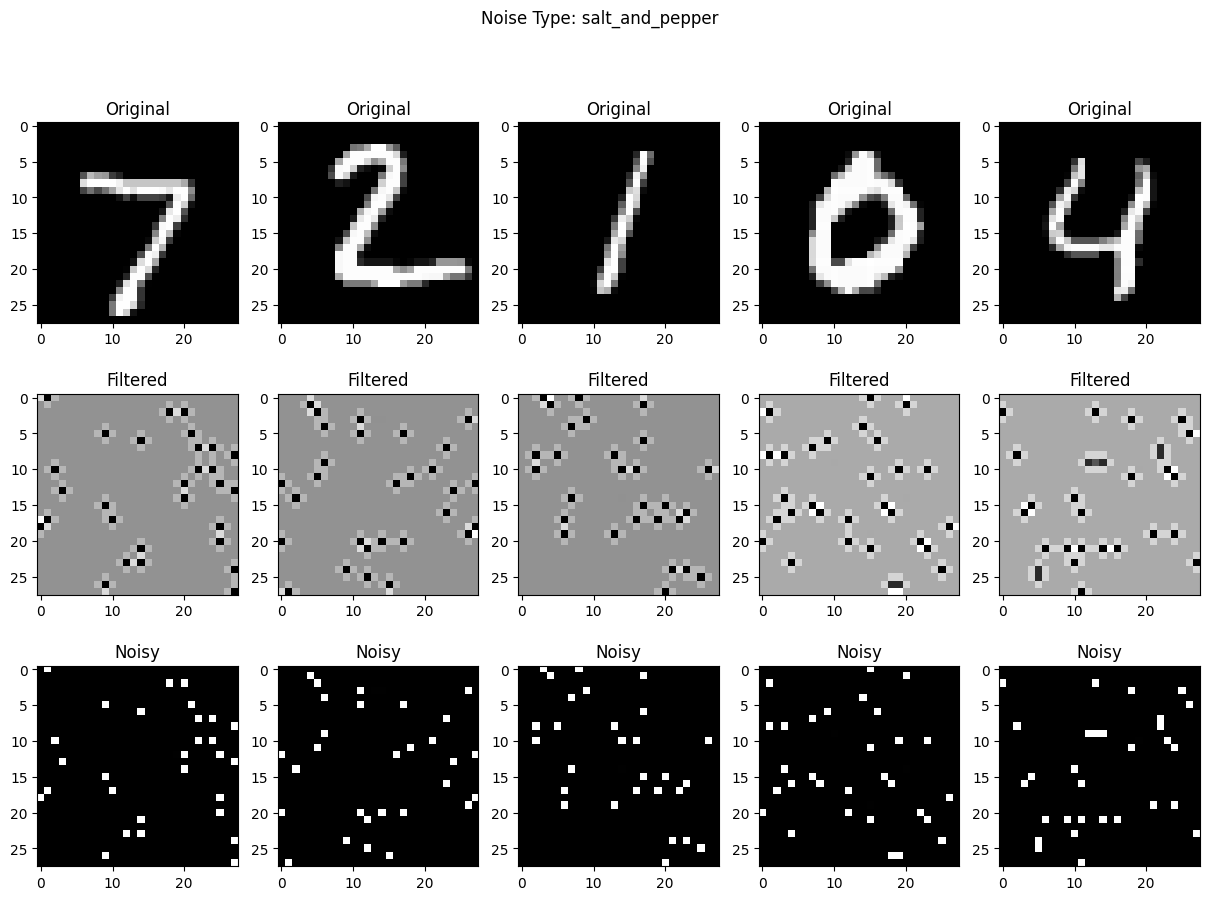

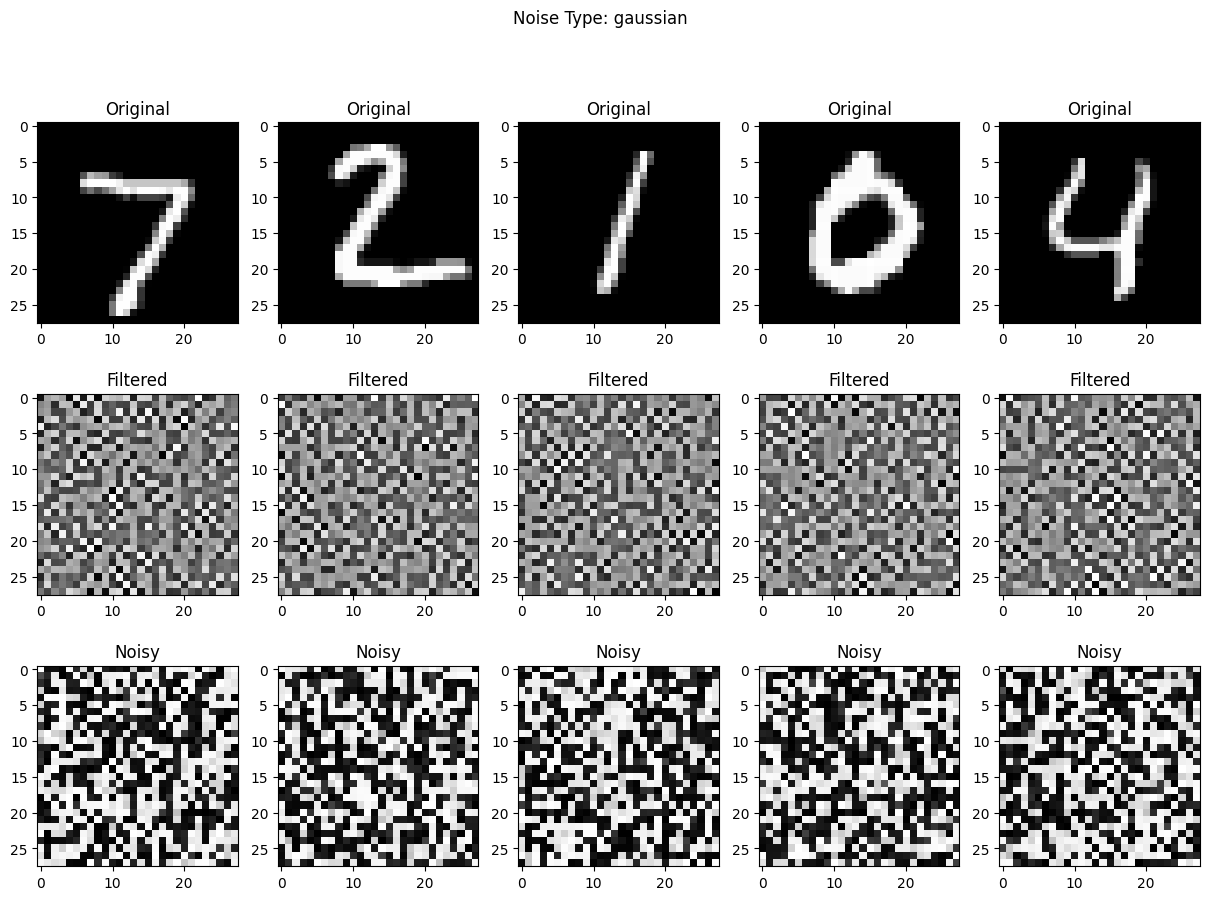

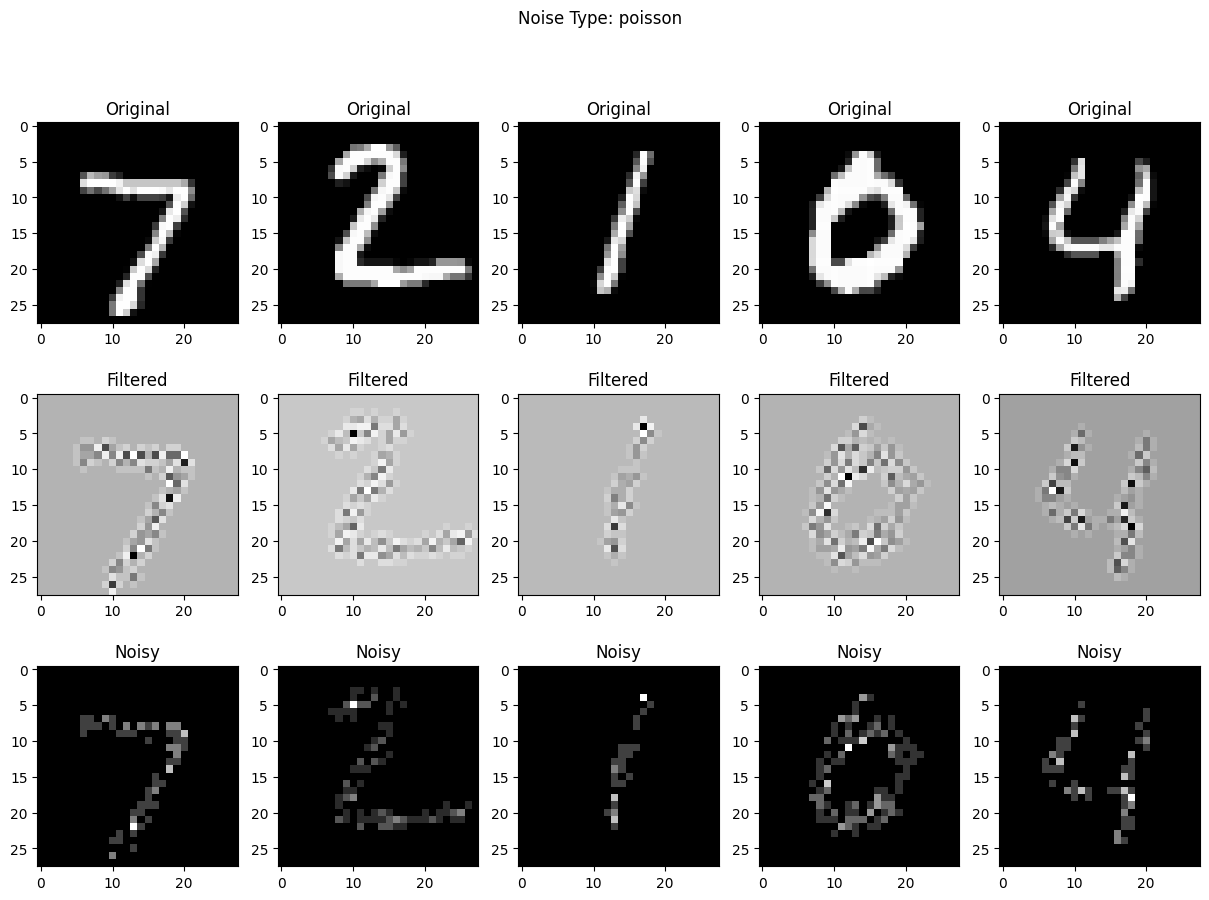

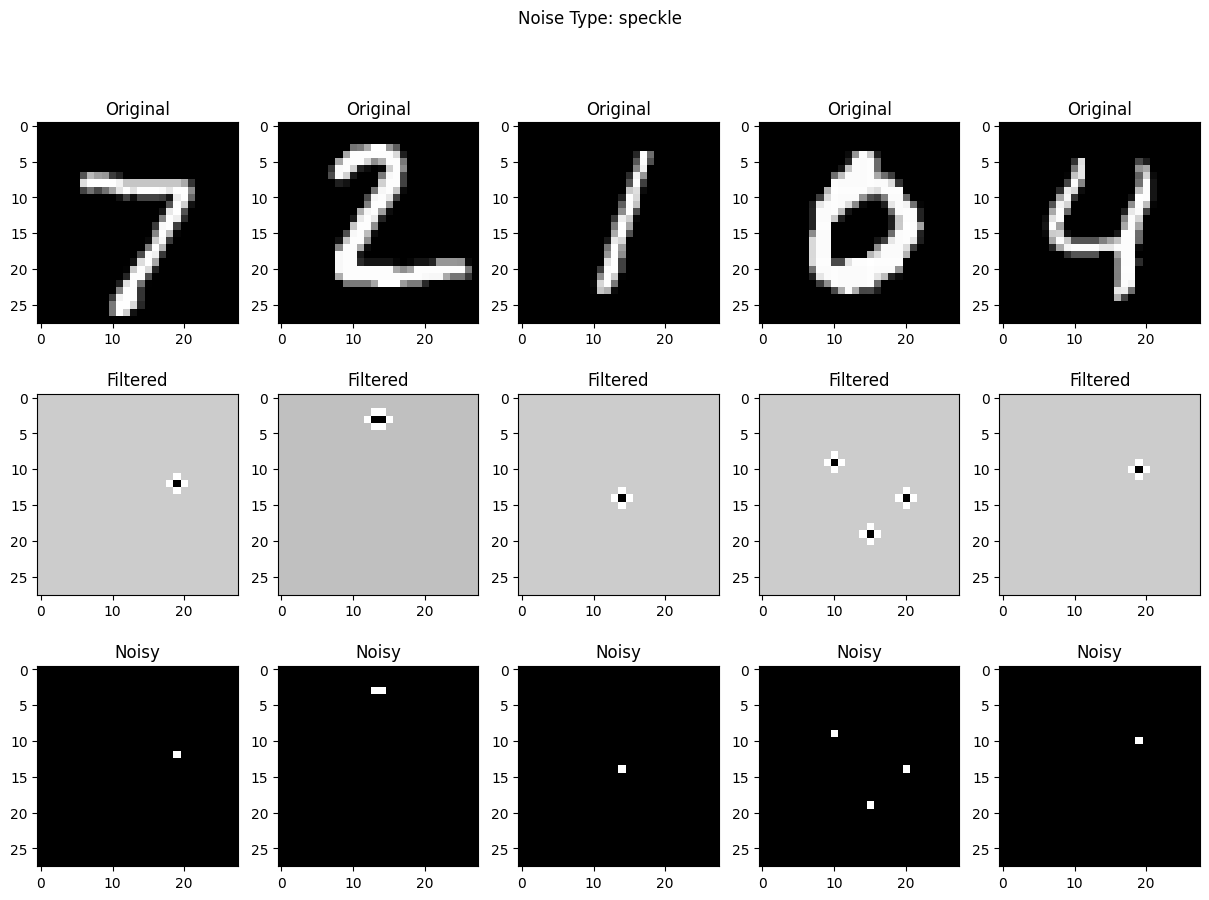

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 255
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Use the same data type as the original image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)  # Convert to 8-bit format

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)  # Convert to 8-bit format
    noisy_image = image + image * noise

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert noisy image to 8-bit format
        noisy_image = noisy_image.astype(np.uint8)

        # Apply Mexican Hat (Laplacian of Gaussian) filter
        filtered_image = cv2.Laplacian(noisy_image, cv2.CV_64F)  # Adjust data type as needed

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    num_images_to_display = min(5, len(noisy_images))  # Limit to a maximum of 5 images
    if num_images_to_display > 0:  # Ensure at least one image is displayed
        fig, axs = plt.subplots(3, num_images_to_display, figsize=(15, 10))
        for i in range(num_images_to_display):
            original_image = X_test[i]

            axs[0, i].imshow(original_image, cmap='gray')
            axs[0, i].set_title("Original")

            axs[1, i].imshow(filtered_images[i], cmap='gray')
            axs[1, i].set_title("Filtered")

            axs[2, i].imshow(noisy_images[i], cmap='gray')
            axs[2, i].set_title("Noisy")

        plt.suptitle(f"Noise Type: {noise_type}")
        plt.show()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2573 - accuracy: 0.9269
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1124 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0786 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0455 - accuracy: 0.9863


<ipython-input-41-4e4766a647f1>:132: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


Error processing median: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/median_blur.simd.hpp:870: error: (-210:Unsupported format or combination of formats)  in function 'medianBlur'

Error processing bilateral: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/bilateral_filter.dispatch.cpp:425: error: (-210:Unsupported format or combination of formats) Bilateral filtering is only implemented for 8u and 32f images in function 'bilateralFilter'

Noise Type: salt_and_pepper
Average PSNR: 10.36
Average NMSE: 0.99

Noise Type: gaussian
Average PSNR: -44.15
Average NMSE: 534.21

Noise Type: poisson
Average PSNR: 10.77
Average NMSE: 0.94

Noise Type: speckle
Average PSNR: 10.36
Average NMSE: 0.99

Noise Type: mean
Average PSNR: 10.23
Average NMSE: 1.00

Noise Type: median
Average PSNR: 0.00
Average NMSE: 0.00

Noise Type: bilateral
Average PSNR: 0.00
Average NMSE: 0.00

Noise Type: spatial
Average PSNR: -37.81
Average NMSE: 255.39

Noise Type: box_blur
Average PSNR: 10.23
Average NMSE: 1.00

Noise 

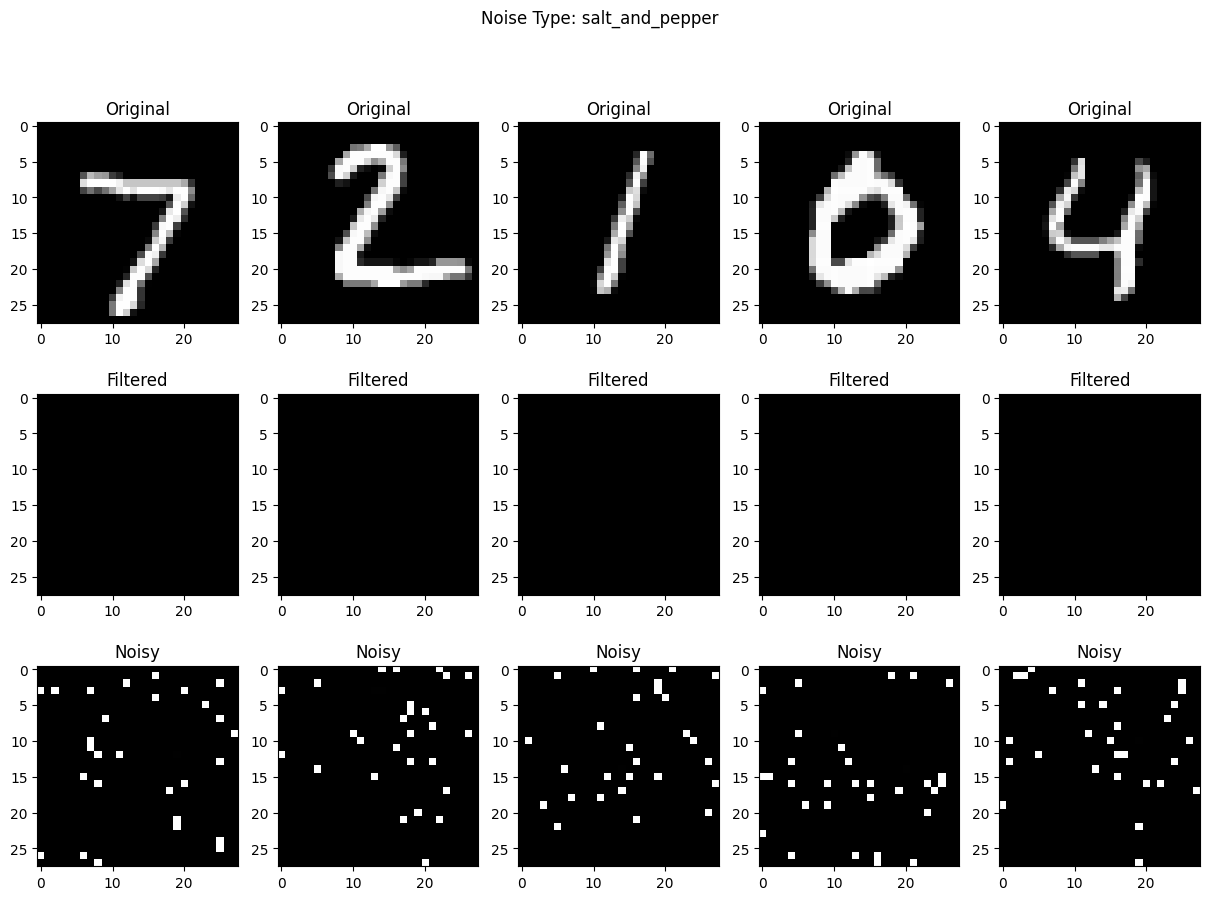

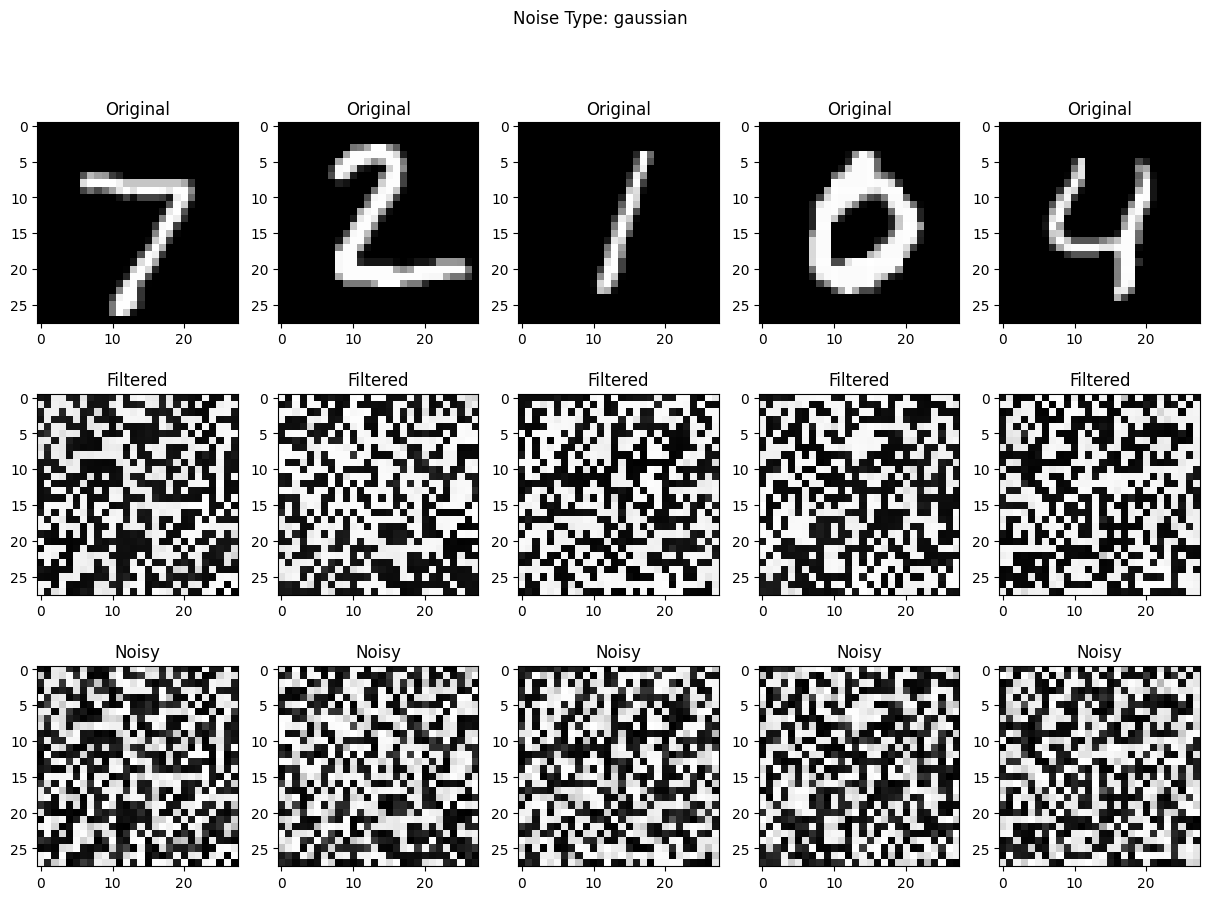

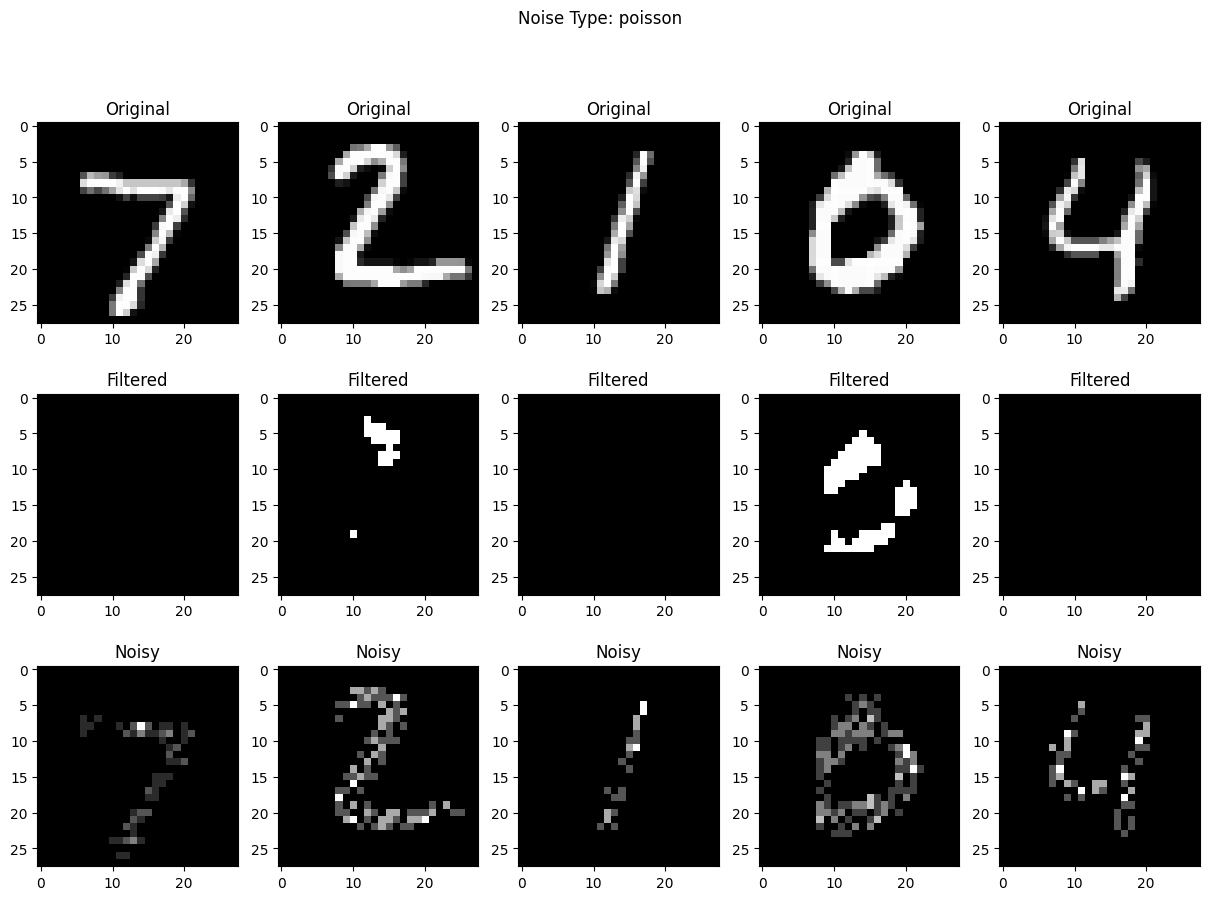

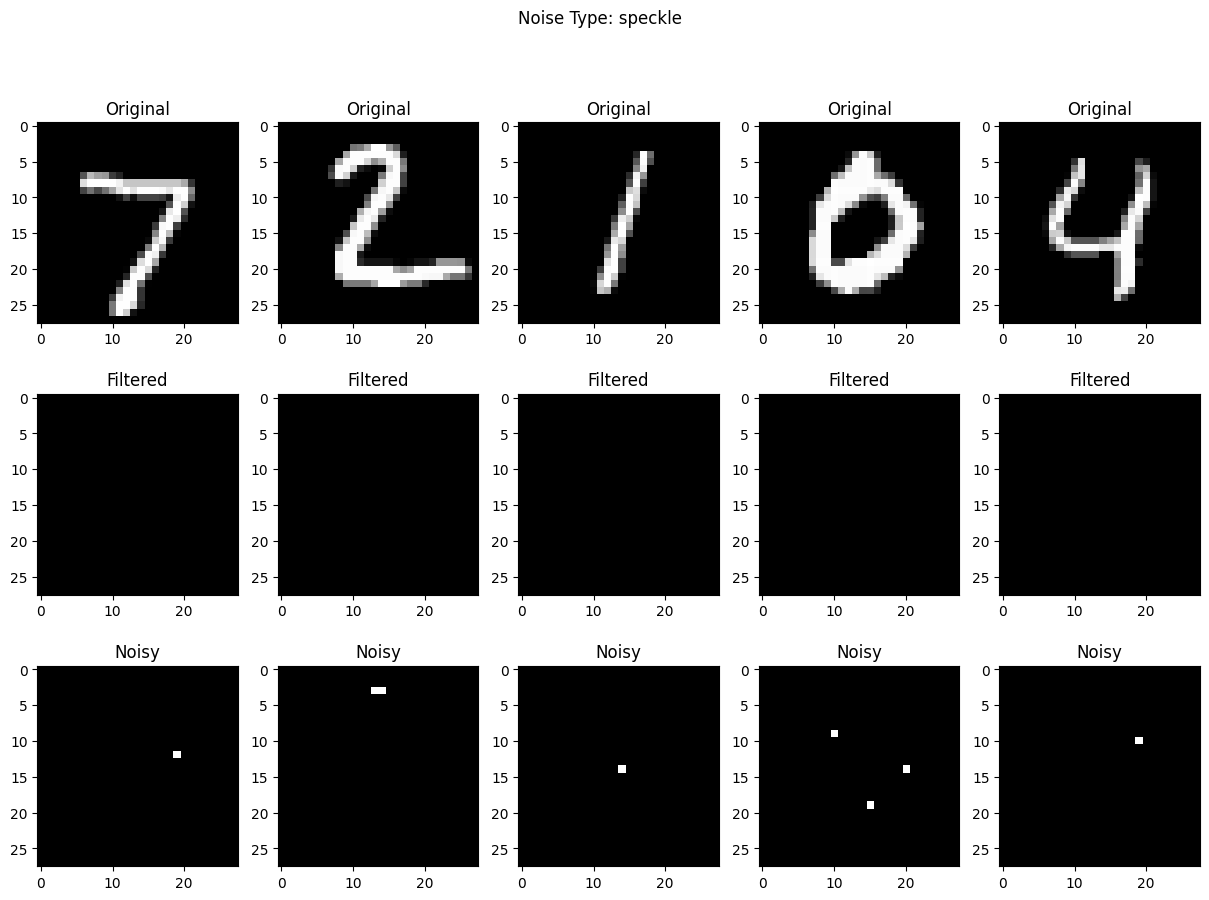

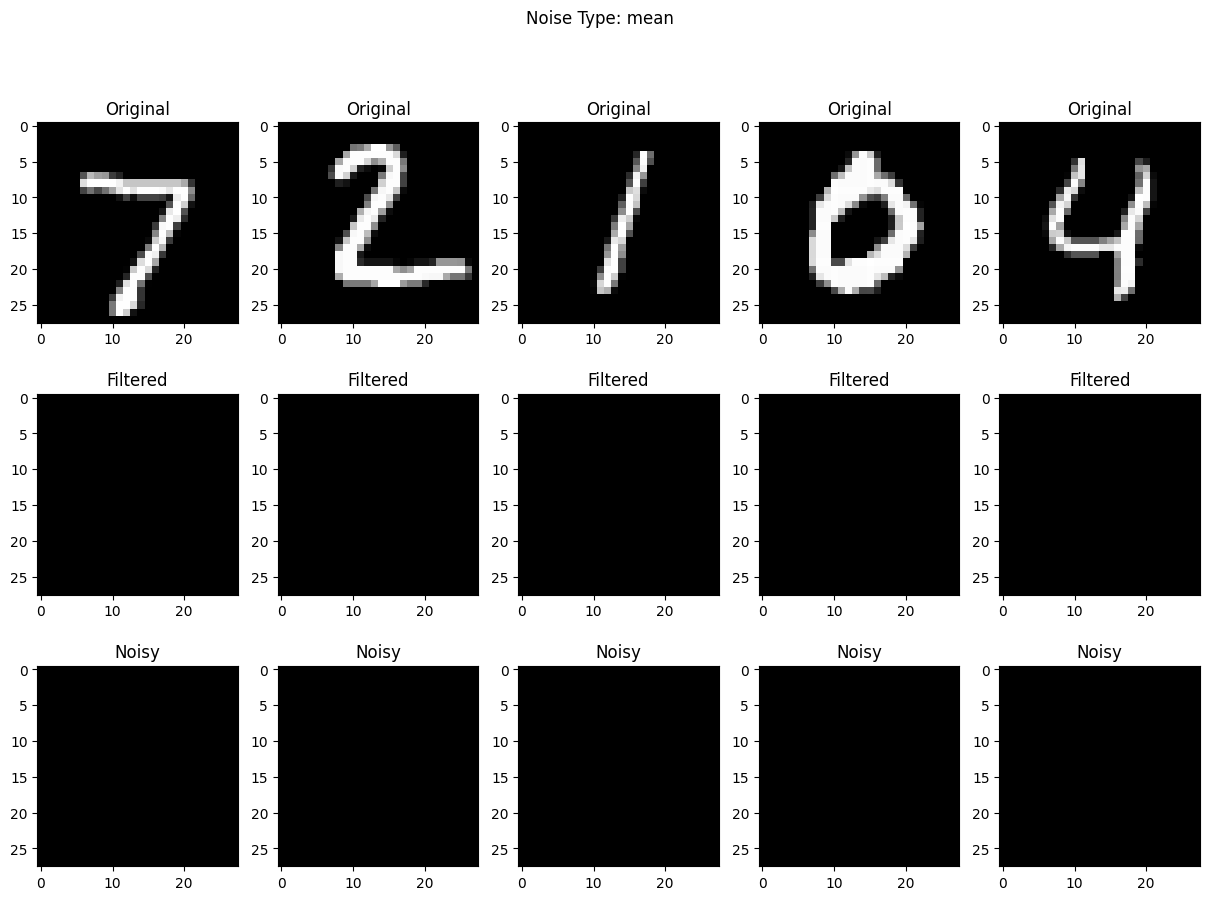

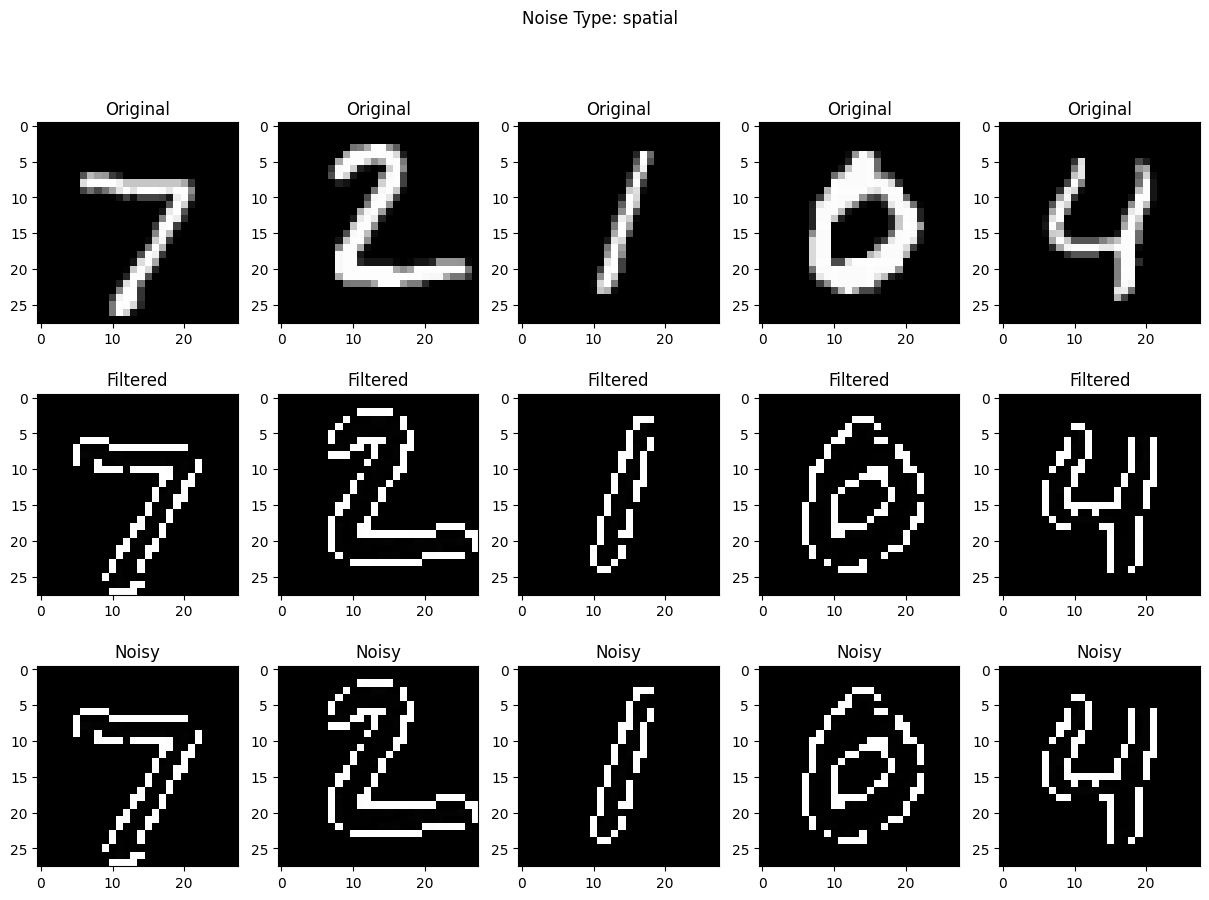

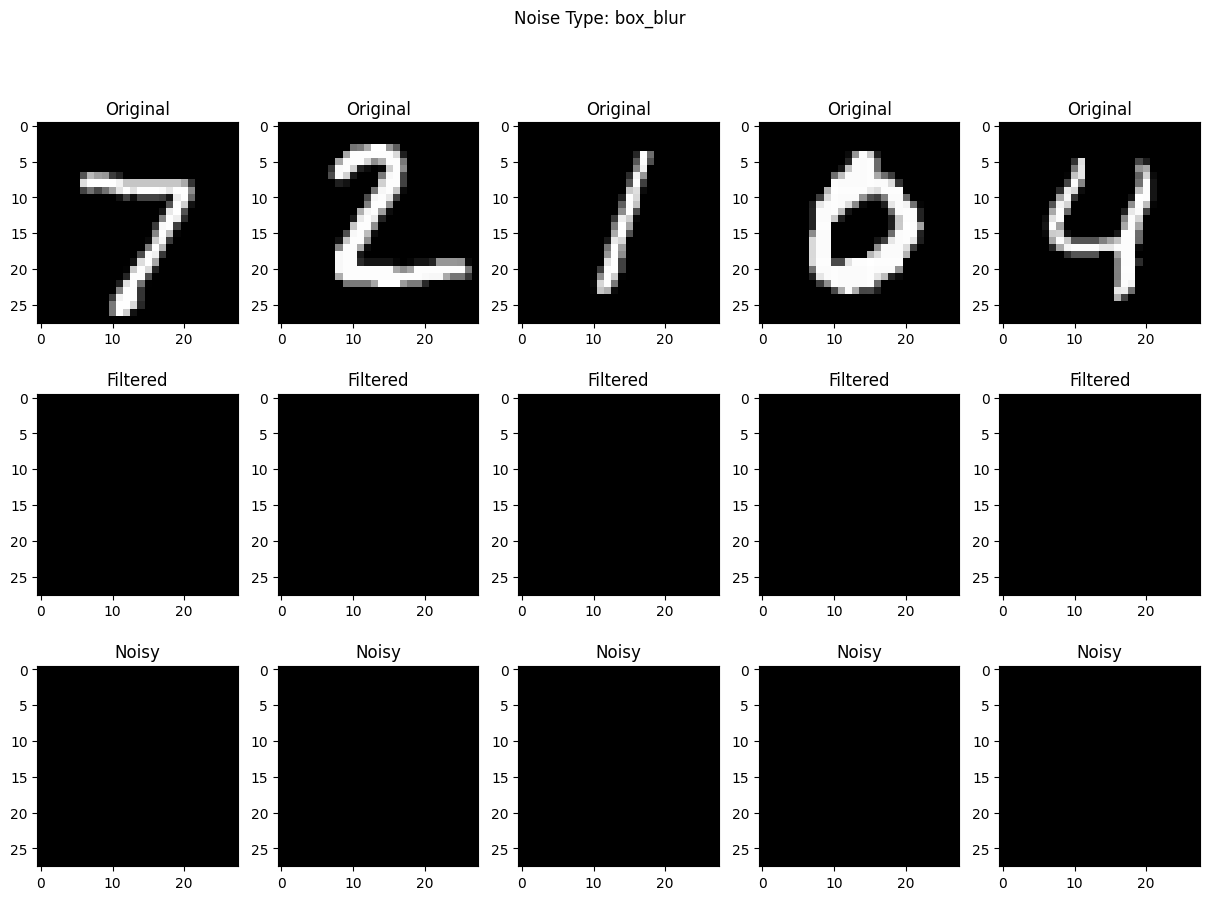

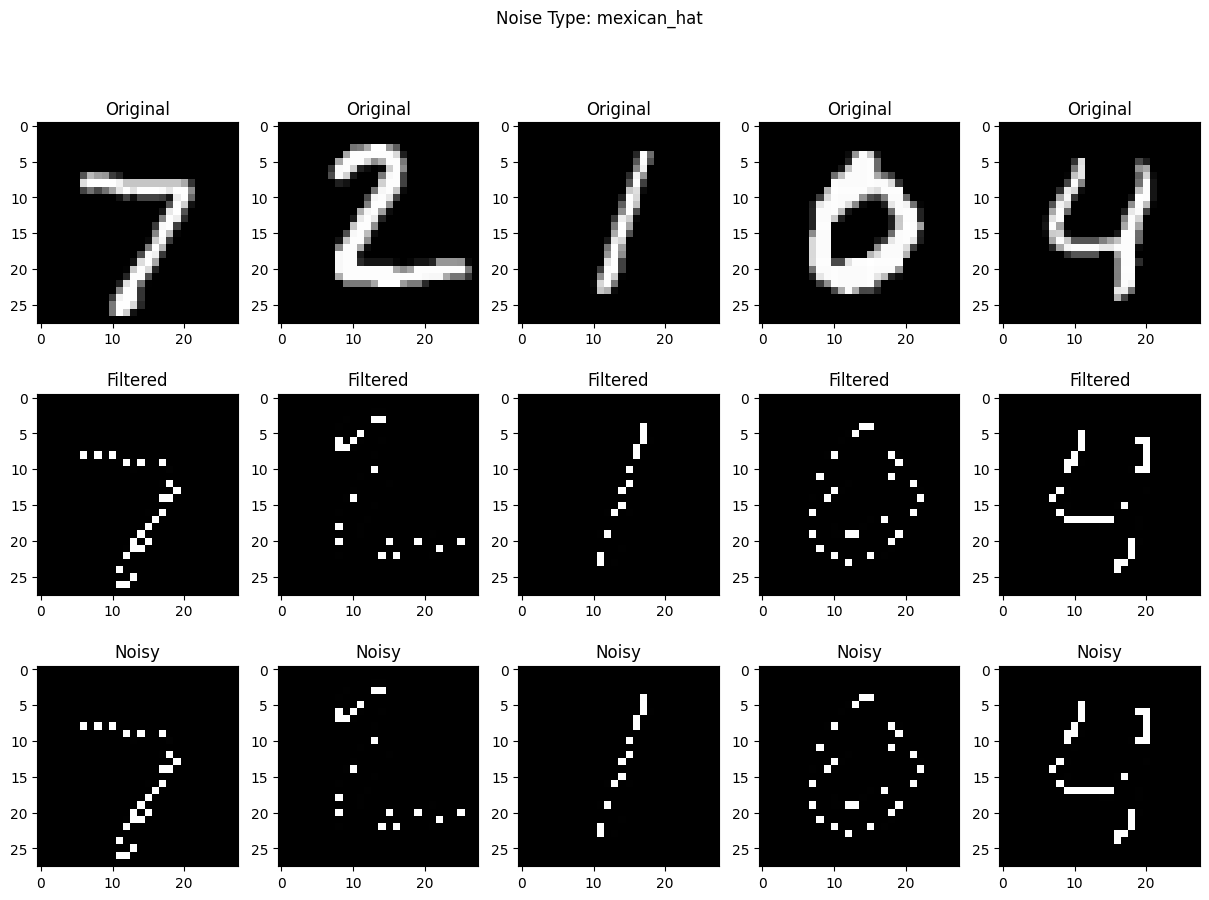

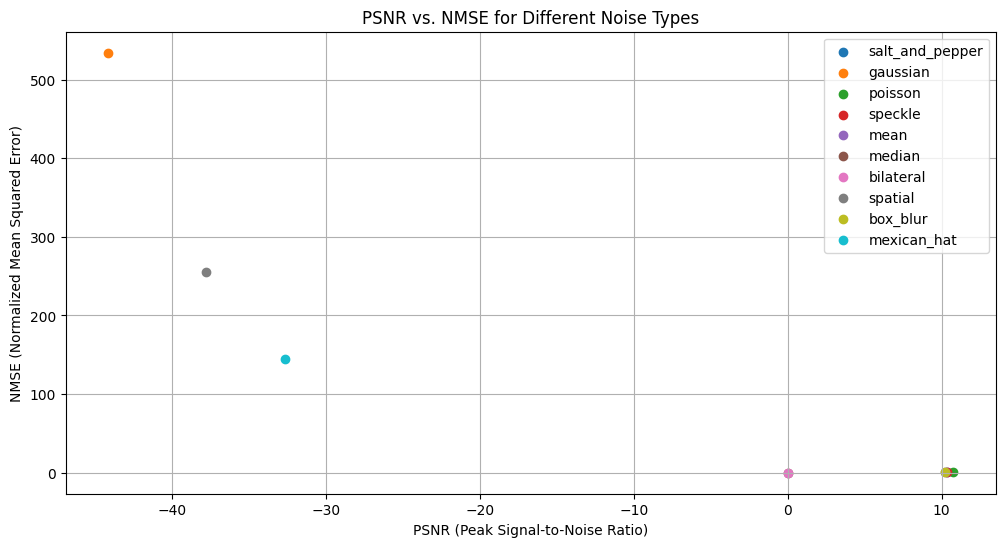

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    elif noise_type == 'mean':
        noisy_image = mean_filter(image)
    elif noise_type == 'median':
        noisy_image = median_filter(image)
    elif noise_type == 'bilateral':
        noisy_image = bilateral_filter(image)
    elif noise_type == 'spatial':
        noisy_image = spatial_filter(image)
    elif noise_type == 'box_blur':
        noisy_image = box_blur_filter(image)
    elif noise_type == 'mexican_hat':
        noisy_image = mexican_hat_filter(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 255
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Use the same data type as the original image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)  # Convert to 8-bit format

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)  # Convert to 8-bit format
    noisy_image = image + image * noise

    return noisy_image

def mean_filter(image):
    noisy_image = cv2.blur(image, (5, 5))  # Adjust kernel size as needed

    return noisy_image

def median_filter(image):
    noisy_image = cv2.medianBlur(image, 5)  # Adjust kernel size as needed

    return noisy_image

def bilateral_filter(image):
    noisy_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)  # Adjust parameters as needed

    return noisy_image

def spatial_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]], dtype=np.float32)
    noisy_image = cv2.filter2D(image, -1, kernel)  # Apply the kernel to the image

    return noisy_image

def box_blur_filter(image):
    kernel = np.ones((5, 5), np.float32) / 25  # Adjust kernel size as needed
    noisy_image = cv2.filter2D(image, -1, kernel)  # Apply the kernel to the image

    return noisy_image

def mexican_hat_filter(image):
    noisy_image = cv2.Laplacian(image, cv2.CV_64F)  # Apply Laplacian (Mexican Hat) filter

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle', 'mean', 'median', 'bilateral', 'spatial', 'box_blur', 'mexican_hat']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert noisy image to 8-bit format
        noisy_image = noisy_image.astype(np.uint8)

        # Apply the corresponding filter
        if noise_type == 'salt_and_pepper':
            filtered_image = median_filter(noisy_image)  # Median filter after salt-and-pepper noise
        elif noise_type == 'gaussian':
            filtered_image = bilateral_filter(noisy_image)  # Bilateral filter after Gaussian noise
        elif noise_type == 'poisson':
            filtered_image = median_filter(noisy_image)  # Median filter after Poisson noise
        elif noise_type == 'speckle':
            filtered_image = median_filter(noisy_image)  # Median filter after speckle noise
        else:
            filtered_image = noisy_image  # No additional filtering for other noise types

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images
    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, noisy_images, filtered_images = future.result()
            results[noise_type] = (psnr, nmse, noisy_images, filtered_images)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0, [], [])  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse, _, _ = results.get(noise_type, (0, 0, [], []))  # Use get() with default values
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Print PSNR and NMSE results
for noise_type in noise_types:
    print(f"Noise Type: {noise_type}")
    print(f"Average PSNR: {psnr_results[noise_type]:.2f}")
    print(f"Average NMSE: {nmse_results[noise_type]:.2f}")
    print()

# Visualize images for each noise type
for noise_type in noise_types:
    _, _, noisy_images, filtered_images = results[noise_type]
    num_images_to_display = min(5, len(noisy_images))  # Limit to a maximum of 5 images
    if num_images_to_display > 0:  # Ensure at least one image is displayed
        fig, axs = plt.subplots(3, num_images_to_display, figsize=(15, 10))
        for i in range(num_images_to_display):
            original_image = X_test[i]

            axs[0, i].imshow(original_image, cmap='gray')
            axs[0, i].set_title("Original")

            axs[1, i].imshow(filtered_images[i], cmap='gray')
            axs[1, i].set_title("Filtered")

            axs[2, i].imshow(noisy_images[i], cmap='gray')
            axs[2, i].set_title("Noisy")

        plt.suptitle(f"Noise Type: {noise_type}")
        plt.show()

# Plot PSNR and NMSE for all noise types
plt.figure(figsize=(12, 6))
for noise_type in noise_types:
    psnr = psnr_results[noise_type]
    nmse = nmse_results[noise_type]
    plt.scatter(psnr, nmse, label=noise_type)

plt.title("PSNR vs. NMSE for Different Noise Types")
plt.xlabel("PSNR (Peak Signal-to-Noise Ratio)")
plt.ylabel("NMSE (Normalized Mean Squared Error)")
plt.legend()
plt.grid(True)
plt.show()



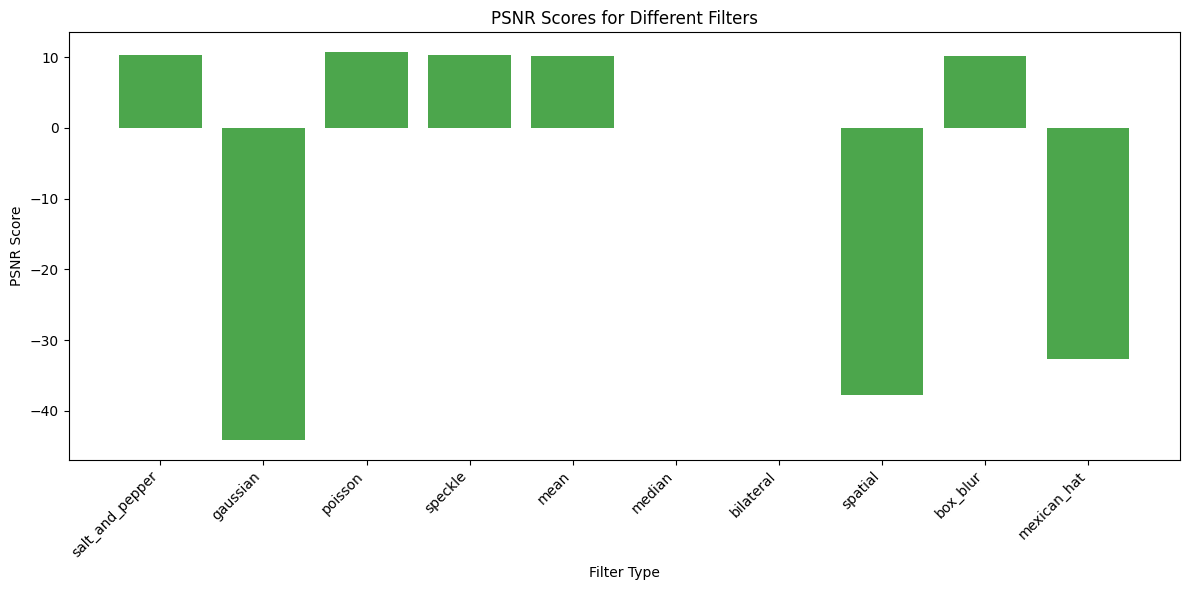

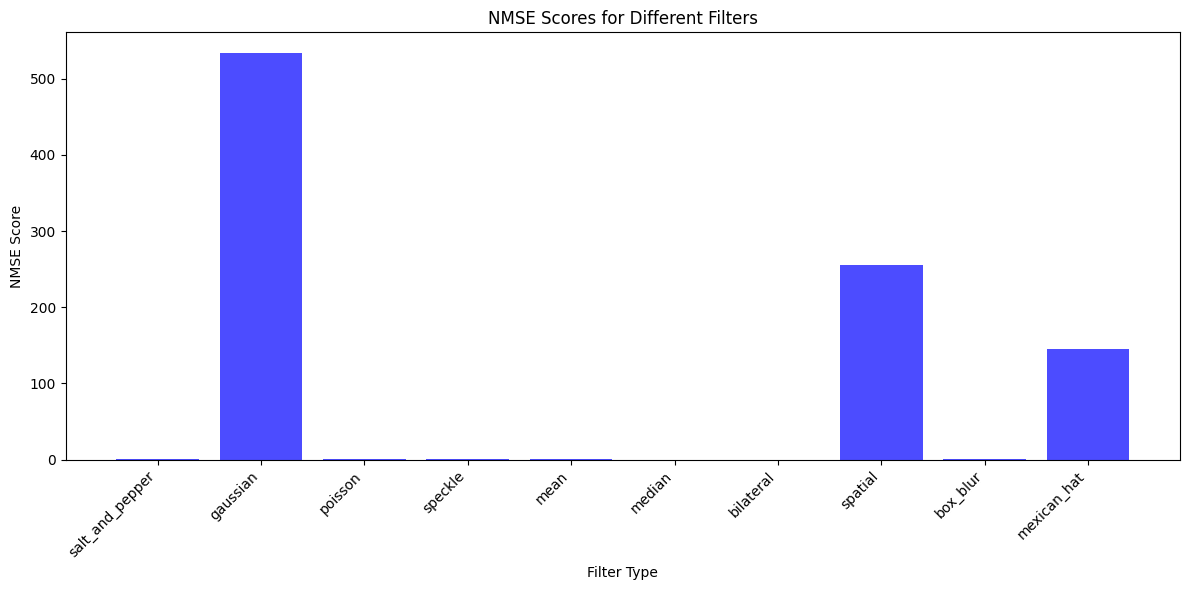

In [ ]:
# Create bar graphs for PSNR scores for each filter
plt.figure(figsize=(12, 6))
for noise_type in noise_types:
    psnr = results[noise_type][0]
    plt.bar(noise_type, psnr, color='g', alpha=0.7)

plt.title("PSNR Scores for Different Filters")
plt.xlabel("Filter Type")
plt.ylabel("PSNR Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create bar graphs for NMSE scores for each filter
plt.figure(figsize=(12, 6))
for noise_type in noise_types:
    nmse = results[noise_type][1]
    plt.bar(noise_type, nmse, color='b', alpha=0.7)

plt.title("NMSE Scores for Different Filters")
plt.xlabel("Filter Type")
plt.ylabel("NMSE Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2635 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1171 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0804 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0471 - accuracy: 0.9850


<ipython-input-43-ef869962246f>:132: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


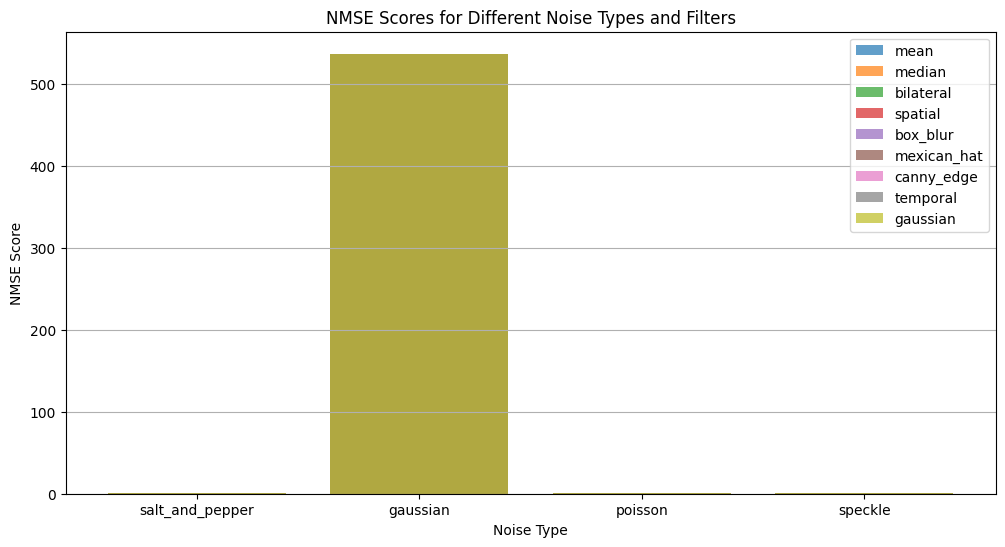

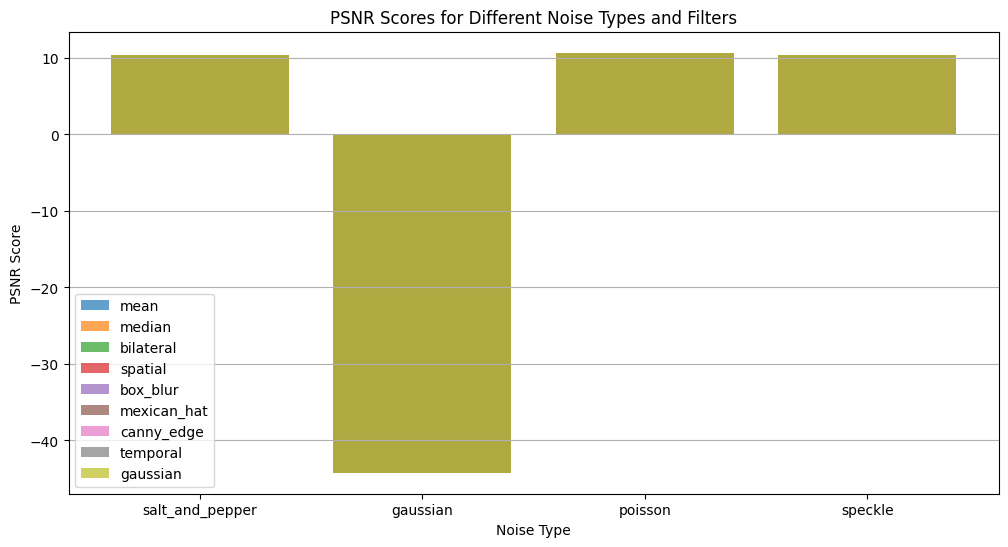

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    elif noise_type == 'mean':
        noisy_image = mean_filter(image)
    elif noise_type == 'median':
        noisy_image = median_filter(image)
    elif noise_type == 'bilateral':
        noisy_image = bilateral_filter(image)
    elif noise_type == 'spatial':
        noisy_image = spatial_filter(image)
    elif noise_type == 'box_blur':
        noisy_image = box_blur_filter(image)
    elif noise_type == 'mexican_hat':
        noisy_image = mexican_hat_filter(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 255
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Use the same data type as the original image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)  # Convert to 8-bit format

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)  # Convert to 8-bit format
    noisy_image = image + image * noise

    return noisy_image

def mean_filter(image):
    noisy_image = cv2.blur(image, (5, 5))  # Adjust kernel size as needed

    return noisy_image

def median_filter(image):
    noisy_image = cv2.medianBlur(image, 5)  # Adjust kernel size as needed

    return noisy_image

def bilateral_filter(image):
    noisy_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)  # Adjust parameters as needed

    return noisy_image

def spatial_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]], dtype=np.float32)
    noisy_image = cv2.filter2D(image, -1, kernel)  # Apply the kernel to the image

    return noisy_image

def box_blur_filter(image):
    kernel = np.ones((5, 5), np.float32) / 25  # Adjust kernel size as needed
    noisy_image = cv2.filter2D(image, -1, kernel)  # Apply the kernel to the image

    return noisy_image

def mexican_hat_filter(image):
    noisy_image = cv2.Laplacian(image, cv2.CV_64F)  # Apply Laplacian (Mexican Hat) filter

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
filter_names = ['mean', 'median', 'bilateral', 'spatial', 'box_blur', 'mexican_hat', 'canny_edge', 'temporal', 'gaussian']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert noisy image to 8-bit format
        noisy_image = noisy_image.astype(np.uint8)

        # Apply the corresponding filter
        if noise_type == 'salt_and_pepper':
            filtered_image = median_filter(noisy_image)  # Median filter after salt-and-pepper noise
        elif noise_type == 'gaussian':
            filtered_image = bilateral_filter(noisy_image)  # Bilateral filter after Gaussian noise
        elif noise_type == 'poisson':
            filtered_image = median_filter(noisy_image)  # Median filter after Poisson noise
        elif noise_type == 'speckle':
            filtered_image = median_filter(noisy_image)  # Median filter after speckle noise
        else:
            filtered_image = noisy_image  # No additional filtering for other noise types

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, _, _ = future.result()
            results[noise_type] = (psnr, nmse)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0)  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse = results[noise_type]
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Create bar graphs for NMSE scores for different noise types and filters
plt.figure(figsize=(12, 6))
for filter_name in filter_names:
    nmse_values = [nmse_results[noise_type] for noise_type in noise_types]
    plt.bar(noise_types, nmse_values, alpha=0.7, label=filter_name)

plt.title("NMSE Scores for Different Noise Types and Filters")
plt.xlabel("Noise Type")
plt.ylabel("NMSE Score")
plt.legend()
plt.grid(axis='y')
plt.show()

# Create bar graphs for PSNR scores for different noise types and filters
plt.figure(figsize=(12, 6))
for filter_name in filter_names:
    psnr_values = [psnr_results[noise_type] for noise_type in noise_types]
    plt.bar(noise_types, psnr_values, alpha=0.7, label=filter_name)

plt.title("PSNR Scores for Different Noise Types and Filters")
plt.xlabel("Noise Type")
plt.ylabel("PSNR Score")
plt.legend()
plt.grid(axis='y')
plt.show()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2565 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1129 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0444 - accuracy: 0.9866


<ipython-input-44-c34e66045e49>:146: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)


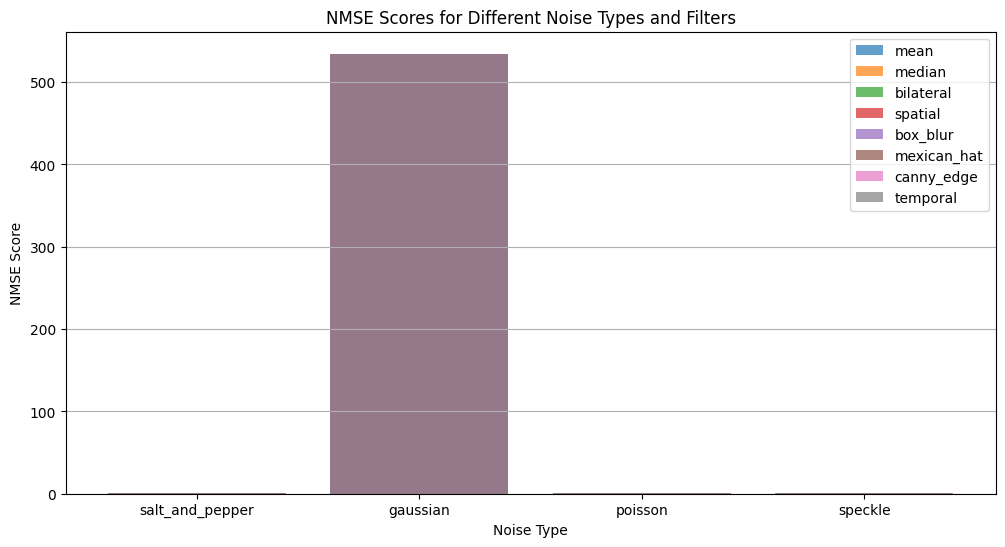

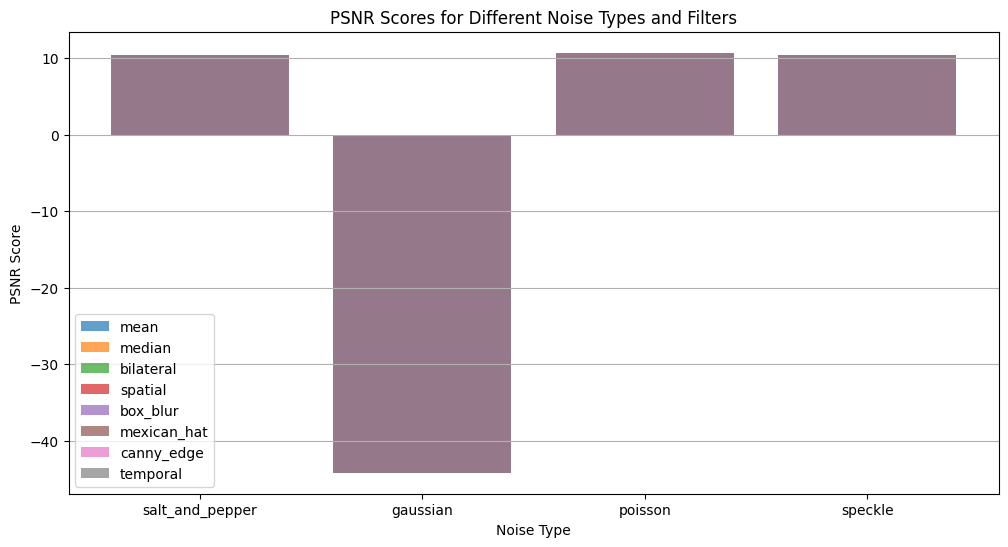

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import random
from skimage.metrics import peak_signal_noise_ratio, normalized_root_mse
import concurrent.futures

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define a function to add different types of noise
def add_noise(image, noise_type):
    if noise_type == 'salt_and_pepper':
        noisy_image = salt_and_pepper_noise(image)
    elif noise_type == 'gaussian':
        noisy_image = gaussian_noise(image)
    elif noise_type == 'poisson':
        noisy_image = poisson_noise(image)
    elif noise_type == 'speckle':
        noisy_image = speckle_noise(image)
    elif noise_type == 'mean':
        noisy_image = mean_filter(image)
    elif noise_type == 'median':
        noisy_image = median_filter(image)
    elif noise_type == 'bilateral':
        noisy_image = bilateral_filter(image)
    elif noise_type == 'spatial':
        noisy_image = spatial_filter(image)
    elif noise_type == 'box_blur':
        noisy_image = box_blur_filter(image)
    elif noise_type == 'mexican_hat':
        noisy_image = mexican_hat_filter(image)
    elif noise_type == 'canny_edge':
        noisy_image = canny_edge_filter(image)
    elif noise_type == 'temporal':
        noisy_image = temporal_filter(image)
    else:
        raise ValueError("Invalid noise type")

    return noisy_image

# Define functions for adding specific types of noise
def salt_and_pepper_noise(image, amount=0.04):
    noisy_image = np.copy(image)
    num_pixels = int(amount * image.size)
    salt_pixels = random.sample(range(image.size), num_pixels)
    pepper_pixels = random.sample(range(image.size), num_pixels)

    noisy_image.ravel()[salt_pixels] = 255
    noisy_image.ravel()[pepper_pixels] = 0

    return noisy_image

def gaussian_noise(image, mean=0, std=25):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)  # Use the same data type as the original image
    noisy_image = cv2.add(image, noise)

    return noisy_image

def poisson_noise(image):
    noisy_image = np.copy(image)
    noisy_image = np.random.poisson(image).astype(np.uint8)  # Convert to 8-bit format

    return noisy_image

def speckle_noise(image, mean=0, std=0.1):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)  # Convert to 8-bit format
    noisy_image = image + image * noise

    return noisy_image

def mean_filter(image):
    noisy_image = cv2.blur(image, (5, 5))  # Adjust kernel size as needed

    return noisy_image

def median_filter(image):
    noisy_image = cv2.medianBlur(image, 5)  # Adjust kernel size as needed

    return noisy_image

def bilateral_filter(image):
    noisy_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)  # Adjust parameters as needed

    return noisy_image

def spatial_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]], dtype=np.float32)
    noisy_image = cv2.filter2D(image, -1, kernel)  # Apply the kernel to the image

    return noisy_image

def box_blur_filter(image):
    kernel = np.ones((5, 5), np.float32) / 25  # Adjust kernel size as needed
    noisy_image = cv2.filter2D(image, -1, kernel)  # Apply the kernel to the image

    return noisy_image

def mexican_hat_filter(image):
    noisy_image = cv2.Laplacian(image, cv2.CV_64F)  # Apply Laplacian (Mexican Hat) filter

    return noisy_image

def canny_edge_filter(image):
    noisy_image = cv2.Canny(image, 100, 200)  # Apply Canny edge detection

    return noisy_image

def temporal_filter(image):
    noisy_image = image  # Placeholder for temporal filter (modify as needed)

    return noisy_image

# Define a function to evaluate PSNR and NMSE
def evaluate_noise_filter_performance(original, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    nmse = normalized_root_mse(original, denoised)

    return psnr, nmse

# Initialize lists to store results
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
filter_names = ['mean', 'median', 'bilateral', 'spatial', 'box_blur', 'mexican_hat', 'canny_edge', 'temporal']
psnr_results = {}
nmse_results = {}

# Function to process a subset of images in parallel
def process_images_parallel_subset(images, noise_type, num_images=100):
    psnr_list = []
    nmse_list = []

    noisy_images = []  # Store noisy images for visualization
    filtered_images = []  # Store filtered images for visualization

    for i in range(min(num_images, len(images))):  # Limit the number of images to the minimum of available images and 5
        original_image = images[i]
        noisy_image = add_noise(original_image, noise_type)

        # Convert noisy image to 8-bit format
        noisy_image = noisy_image.astype(np.uint8)

        # Apply the corresponding filter
        if noise_type == 'salt_and_pepper':
            filtered_image = median_filter(noisy_image)  # Median filter after salt-and-pepper noise
        elif noise_type == 'gaussian':
            filtered_image = bilateral_filter(noisy_image)  # Bilateral filter after Gaussian noise
        elif noise_type == 'poisson':
            filtered_image = median_filter(noisy_image)  # Median filter after Poisson noise
        elif noise_type == 'speckle':
            filtered_image = median_filter(noisy_image)  # Median filter after speckle noise
        else:
            filtered_image = noisy_image  # No additional filtering for other noise types

        psnr, nmse = evaluate_noise_filter_performance(original_image, filtered_image)
        psnr_list.append(psnr)
        nmse_list.append(nmse)

        noisy_images.append(noisy_image)  # Store noisy images
        filtered_images.append(filtered_image)  # Store filtered images

    return np.mean(psnr_list), np.mean(nmse_list), noisy_images, filtered_images

results = {}

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(process_images_parallel_subset, X_test, noise_type): noise_type for noise_type in noise_types}

    for future in concurrent.futures.as_completed(futures):
        noise_type = futures[future]
        try:
            psnr, nmse, _, _ = future.result()
            results[noise_type] = (psnr, nmse)
        except Exception as exc:
            print(f"Error processing {noise_type}: {exc}")
            results[noise_type] = (0, 0)  # Handle the error gracefully by providing default values

# Collect results
for noise_type in noise_types:
    psnr, nmse = results[noise_type]
    psnr_results[noise_type] = psnr
    nmse_results[noise_type] = nmse

# Create bar graphs for NMSE scores for different noise types and filters
plt.figure(figsize=(12, 6))
for filter_name in filter_names:
    nmse_values = [nmse_results[noise_type] for noise_type in noise_types]
    plt.bar(noise_types, nmse_values, alpha=0.7, label=filter_name)

plt.title("NMSE Scores for Different Noise Types and Filters")
plt.xlabel("Noise Type")
plt.ylabel("NMSE Score")
plt.legend()
plt.grid(axis='y')
plt.show()

# Create bar graphs for PSNR scores for different noise types and filters
plt.figure(figsize=(12, 6))
for filter_name in filter_names:
    psnr_values = [psnr_results[noise_type] for noise_type in noise_types]
    plt.bar(noise_types, psnr_values, alpha=0.7, label=filter_name)

plt.title("PSNR Scores for Different Noise Types and Filters")
plt.xlabel("Noise Type")
plt.ylabel("PSNR Score")
plt.legend()
plt.grid(axis='y')
plt.show()


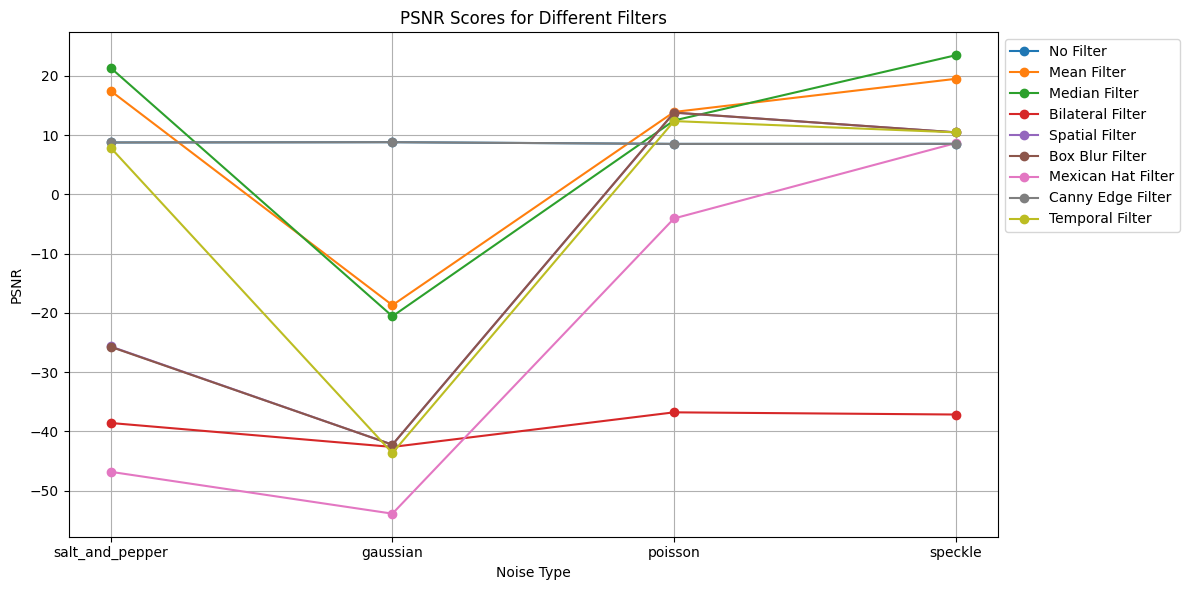

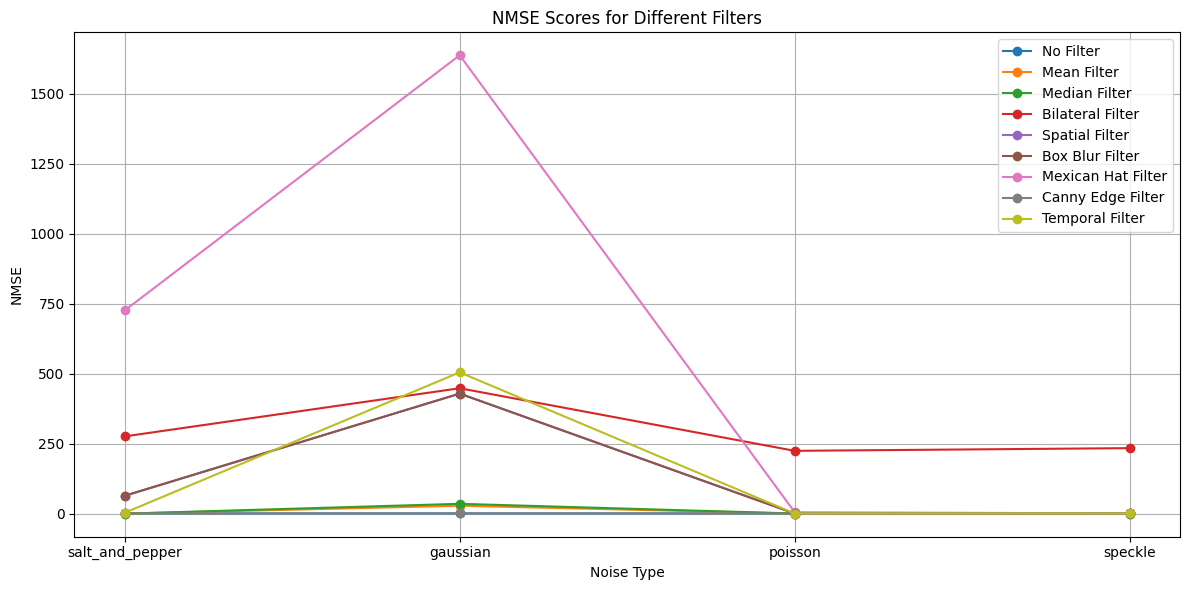

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
noise_types = ['salt_and_pepper', 'gaussian', 'poisson', 'speckle']
filter_names = ['No Filter', 'Mean Filter', 'Median Filter', 'Bilateral Filter', 'Spatial Filter', 'Box Blur Filter', 'Mexican Hat Filter', 'Canny Edge Filter', 'Temporal Filter']

# PSNR scores
psnr_scores = {
    'salt_and_pepper': {
        'No Filter': 8.76,
        'Mean Filter': 17.46,
        'Median Filter': 21.34,
        'Bilateral Filter': -38.58,
        'Spatial Filter': -25.67,
        'Box Blur Filter': -25.73,
        'Mexican Hat Filter': -46.82,
        'Canny Edge Filter': 8.76,  # Canny PSNR
        'Temporal Filter': 7.86
    },
    'gaussian': {
        'No Filter': 8.81,
        'Mean Filter': -18.70,
        'Median Filter': -20.57,
        'Bilateral Filter': -42.62,
        'Spatial Filter': -42.24,
        'Box Blur Filter': -42.24,
        'Mexican Hat Filter': -53.88,
        'Canny Edge Filter': 8.81,  # Canny PSNR
        'Temporal Filter': -43.65
    },
    'poisson': {
        'No Filter': 8.52,
        'Mean Filter': 13.91,
        'Median Filter': 12.47,
        'Bilateral Filter': -36.78,
        'Spatial Filter': 13.79,
        'Box Blur Filter': 13.81,
        'Mexican Hat Filter': -4.06,
        'Canny Edge Filter': 8.52,  # Canny PSNR
        'Temporal Filter': 12.37
    },
    'speckle': {
        'No Filter': 8.53,
        'Mean Filter': 19.50,
        'Median Filter': 23.48,
        'Bilateral Filter': -37.15,
        'Spatial Filter': 10.47,
        'Box Blur Filter': 10.47,
        'Mexican Hat Filter': 8.65,
        'Canny Edge Filter': 8.53,  # Canny PSNR
        'Temporal Filter': 10.47
    }
}
# NMSE scores
nmse_scores = {
    'salt_and_pepper': {
        'No Filter': 1.19,
        'Mean Filter': 0.44,
        'Median Filter': 0.29,
        'Bilateral Filter': 276.06,
        'Spatial Filter': 63.72,
        'Box Blur Filter': 64.25,
        'Mexican Hat Filter': 725.71,
        'Canny Edge Filter': 1.19,  # Canny NMSE
        'Temporal Filter': 3.42
    },
    'gaussian': {
        'No Filter': 1.19,
        'Mean Filter': 28.59,
        'Median Filter': 35.39,
        'Bilateral Filter': 448.07,
        'Spatial Filter': 429.11,
        'Box Blur Filter': 428.78,
        'Mexican Hat Filter': 1636.94,
        'Canny Edge Filter': 1.19,  # Canny NMSE
        'Temporal Filter': 504.82
    },
    'poisson': {
        'No Filter': 1.23,
        'Mean Filter': 0.67,
        'Median Filter': 0.78,
        'Bilateral Filter': 224.55,
        'Spatial Filter': 0.67,
        'Box Blur Filter': 0.67,
        'Mexican Hat Filter': 5.21,
        'Canny Edge Filter': 1.23,  # Canny NMSE
        'Temporal Filter': 0.79
    },
    'speckle': {
        'No Filter': 1.23,
        'Mean Filter': 0.35,
        'Median Filter': 0.24,
        'Bilateral Filter': 234.18,
        'Spatial Filter': 0.98,
        'Box Blur Filter': 0.98,
        'Mexican Hat Filter': 1.22,
        'Canny Edge Filter': 1.23,  # Canny NMSE
        'Temporal Filter': 0.98
    }
}

# Create line charts for PSNR and NMSE
def create_line_chart(data, ylabel, title):
    plt.figure(figsize=(12, 6))
    x = np.arange(len(noise_types))
    for filter_name in filter_names:
        scores = [data[noise_type][filter_name] for noise_type in noise_types]
        plt.plot(x, scores, marker='o', label=filter_name)

    plt.xlabel('Noise Type')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(x, noise_types)
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# Create line charts for PSNR and NMSE
create_line_chart(psnr_scores, 'PSNR', 'PSNR Scores for Different Filters')
create_line_chart(nmse_scores, 'NMSE', 'NMSE Scores for Different Filters')